In [1]:
import numpy as np
import pandas as pd
import torch
from pyabc import Distribution, RV
from sbi.utils import BoxUniform

/etc/python/sitecustomize.py:236: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  mod = _original_import(name, globals, locals, fromlist, level)


In [2]:
import pickle
import time
import matplotlib.pyplot as plt

In [3]:
from src.utils import set_seed
from src.inference import SBIEngine
from models.epidemic_models import simulate_seir

In [4]:
# 1. Global Setup
set_seed(0) # Fix seed for reproducibility
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

[#] Seed has been fixed to: 0
Using device: cpu


In [5]:
# 2. Define Priors
low_linear = np.array([0.01, 0.01, 0.01])
high_linear = np.array([1.5, 0.5, 0.5])

intervals = high_linear - low_linear

pyabc_prior = Distribution(
    beta=RV("uniform", low_linear[0], intervals[0]),
    kappa=RV("uniform", low_linear[1], intervals[1]),
    gamma=RV("uniform", low_linear[2], intervals[2])
)

In [6]:
# 3. Define Simulator Wrappers
def simulator(params):
    p = [params['beta'], params['kappa'], params['gamma']]
    output = simulate_seir(p, [99990, 0, 10, 0], duration=100)
    return output

In [7]:
with open('./data/model1.pkl', 'rb') as f:
    true_dataset = pickle.load(f)

In [8]:
engine = SBIEngine()

In [9]:
results_1k = []

for i in range(10):
    start_time = time.time()
    abc_samples_1k = engine.run_abc(
        obs_data=true_dataset[i]['poisson'],
        prior=pyabc_prior,
        simulator_func=simulator,
        num_simulations=1000, 
        population_size=100,
        num_samples=10000
    )
    results_1k.append(abc_samples_1k)
    end_time = time.time()
    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:15>
ABC INFO: Calibration sample t = -1.


[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.39339837e+04.
ABC INFO: Accepted: 100 / 427 = 2.3419e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 5.35257796e+03.
ABC INFO: Accepted: 100 / 532 = 1.8797e-01, ESS: 5.6063e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.419895, end_time=2026-02-05 12:30:20>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:20>
ABC INFO: Calibration sample t = -1.


[0] Done in 4.48 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.30404528e+04.
ABC INFO: Accepted: 100 / 496 = 2.0161e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.96393859e+03.
ABC INFO: Accepted: 100 / 564 = 1.7730e-01, ESS: 9.0105e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.536566, end_time=2026-02-05 12:30:24>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:24>
ABC INFO: Calibration sample t = -1.


[1] Done in 4.57 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.47980952e+04.
ABC INFO: Accepted: 100 / 449 = 2.2272e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.63623916e+03.
ABC INFO: Accepted: 100 / 494 = 2.0243e-01, ESS: 8.3866e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.489776, end_time=2026-02-05 12:30:29>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:29>
ABC INFO: Calibration sample t = -1.


[2] Done in 4.52 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.24661964e+04.
ABC INFO: Accepted: 100 / 563 = 1.7762e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.40277441e+03.
ABC INFO: Accepted: 100 / 532 = 1.8797e-01, ESS: 7.4080e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.337672, end_time=2026-02-05 12:30:33>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:33>
ABC INFO: Calibration sample t = -1.


[3] Done in 4.37 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 9.13782010e+03.
ABC INFO: Accepted: 100 / 884 = 1.1312e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.68763879e+03.
ABC INFO: Accepted: 100 / 756 = 1.3228e-01, ESS: 8.7304e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.320078, end_time=2026-02-05 12:30:38>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:38>
ABC INFO: Calibration sample t = -1.


[4] Done in 4.35 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.23975153e+04.
ABC INFO: Accepted: 100 / 454 = 2.2026e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.85226419e+03.
ABC INFO: Accepted: 100 / 505 = 1.9802e-01, ESS: 8.6905e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.215094, end_time=2026-02-05 12:30:42>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:42>
ABC INFO: Calibration sample t = -1.


[5] Done in 4.24 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.25382565e+04.
ABC INFO: Accepted: 100 / 434 = 2.3041e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 5.19963023e+03.
ABC INFO: Accepted: 100 / 451 = 2.2173e-01, ESS: 7.7218e+01.
ABC INFO: t: 2, eps: 1.97691726e+03.
ABC INFO: Accepted: 100 / 1149 = 8.7032e-02, ESS: 7.6522e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:05.777257, end_time=2026-02-05 12:30:48>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:48>
ABC INFO: Calibration sample t = -1.


[6] Done in 5.81 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.47959405e+04.
ABC INFO: Accepted: 100 / 497 = 2.0121e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.87447524e+03.
ABC INFO: Accepted: 100 / 583 = 1.7153e-01, ESS: 8.2441e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.336363, end_time=2026-02-05 12:30:52>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:52>
ABC INFO: Calibration sample t = -1.


[7] Done in 4.37 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.97265334e+04.
ABC INFO: Accepted: 100 / 413 = 2.4213e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.39338730e+03.
ABC INFO: Accepted: 100 / 518 = 1.9305e-01, ESS: 6.4363e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.698506, end_time=2026-02-05 12:30:57>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:30:57>
ABC INFO: Calibration sample t = -1.


[8] Done in 4.73 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.28290886e+04.
ABC INFO: Accepted: 100 / 538 = 1.8587e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.81388560e+03.
ABC INFO: Accepted: 100 / 524 = 1.9084e-01, ESS: 7.1736e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.281409, end_time=2026-02-05 12:31:01>


[9] Done in 4.31 seconds


In [10]:
with open("./results/Model1/ABC/M1_1k_posterior_samples.pkl", "wb") as f:
    pickle.dump(results_1k, f)

In [11]:
param_names = ["beta", "kappa","gamma"]

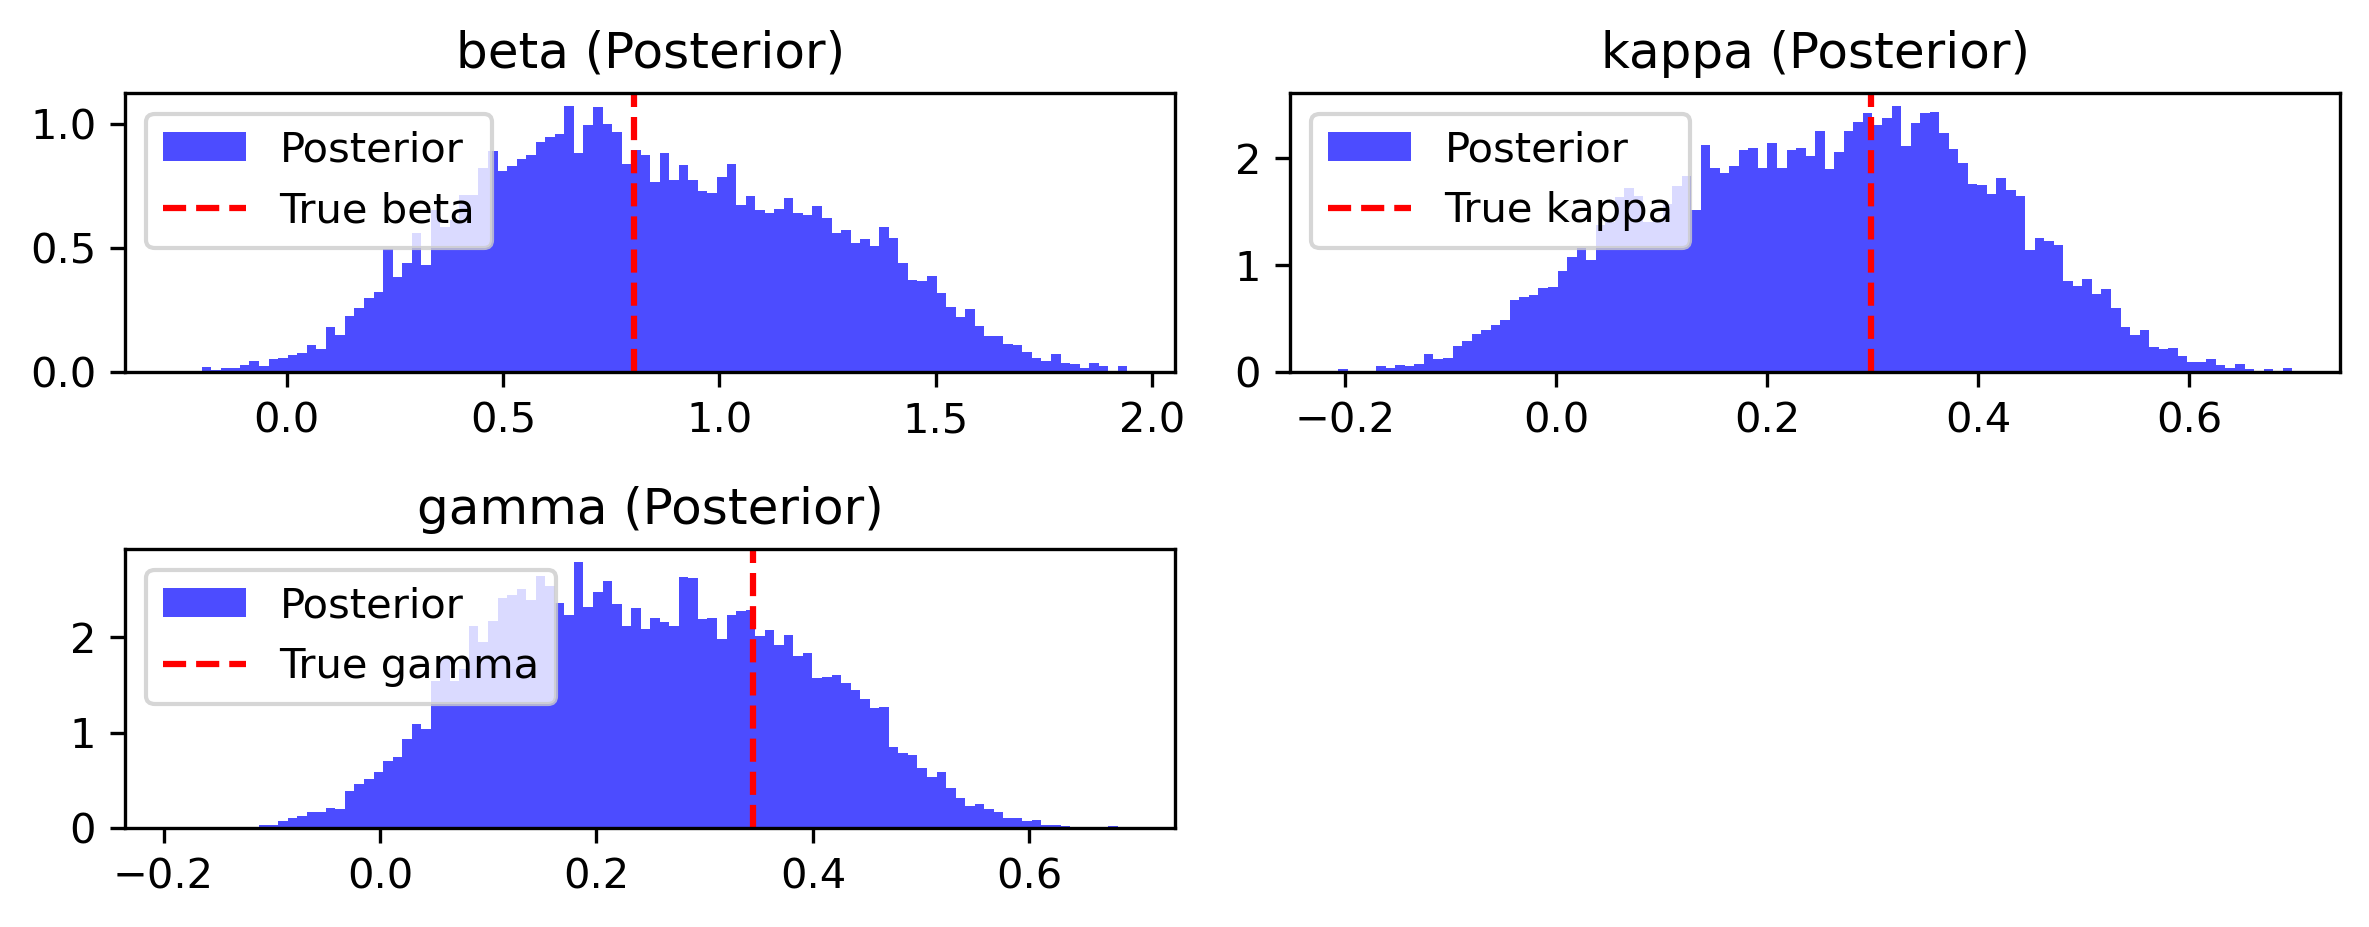

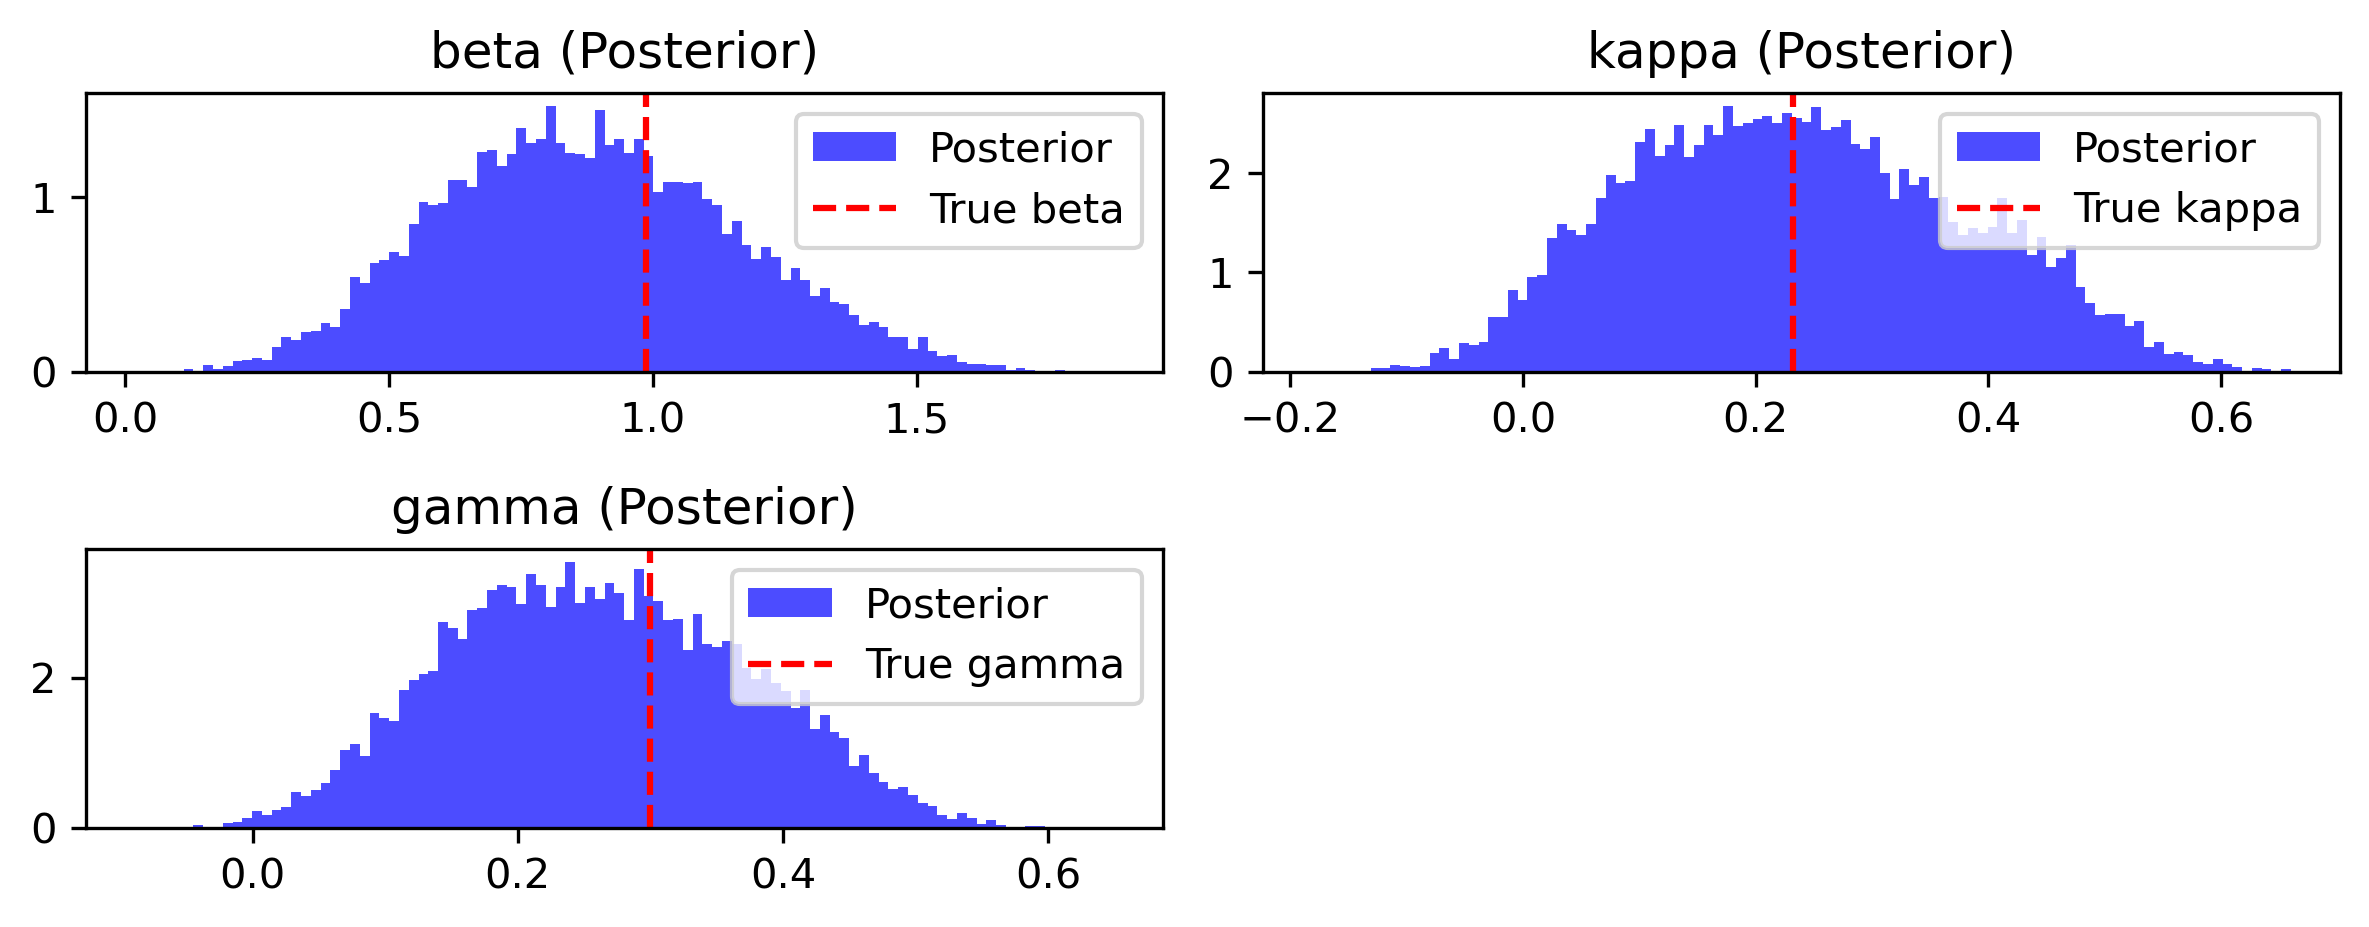

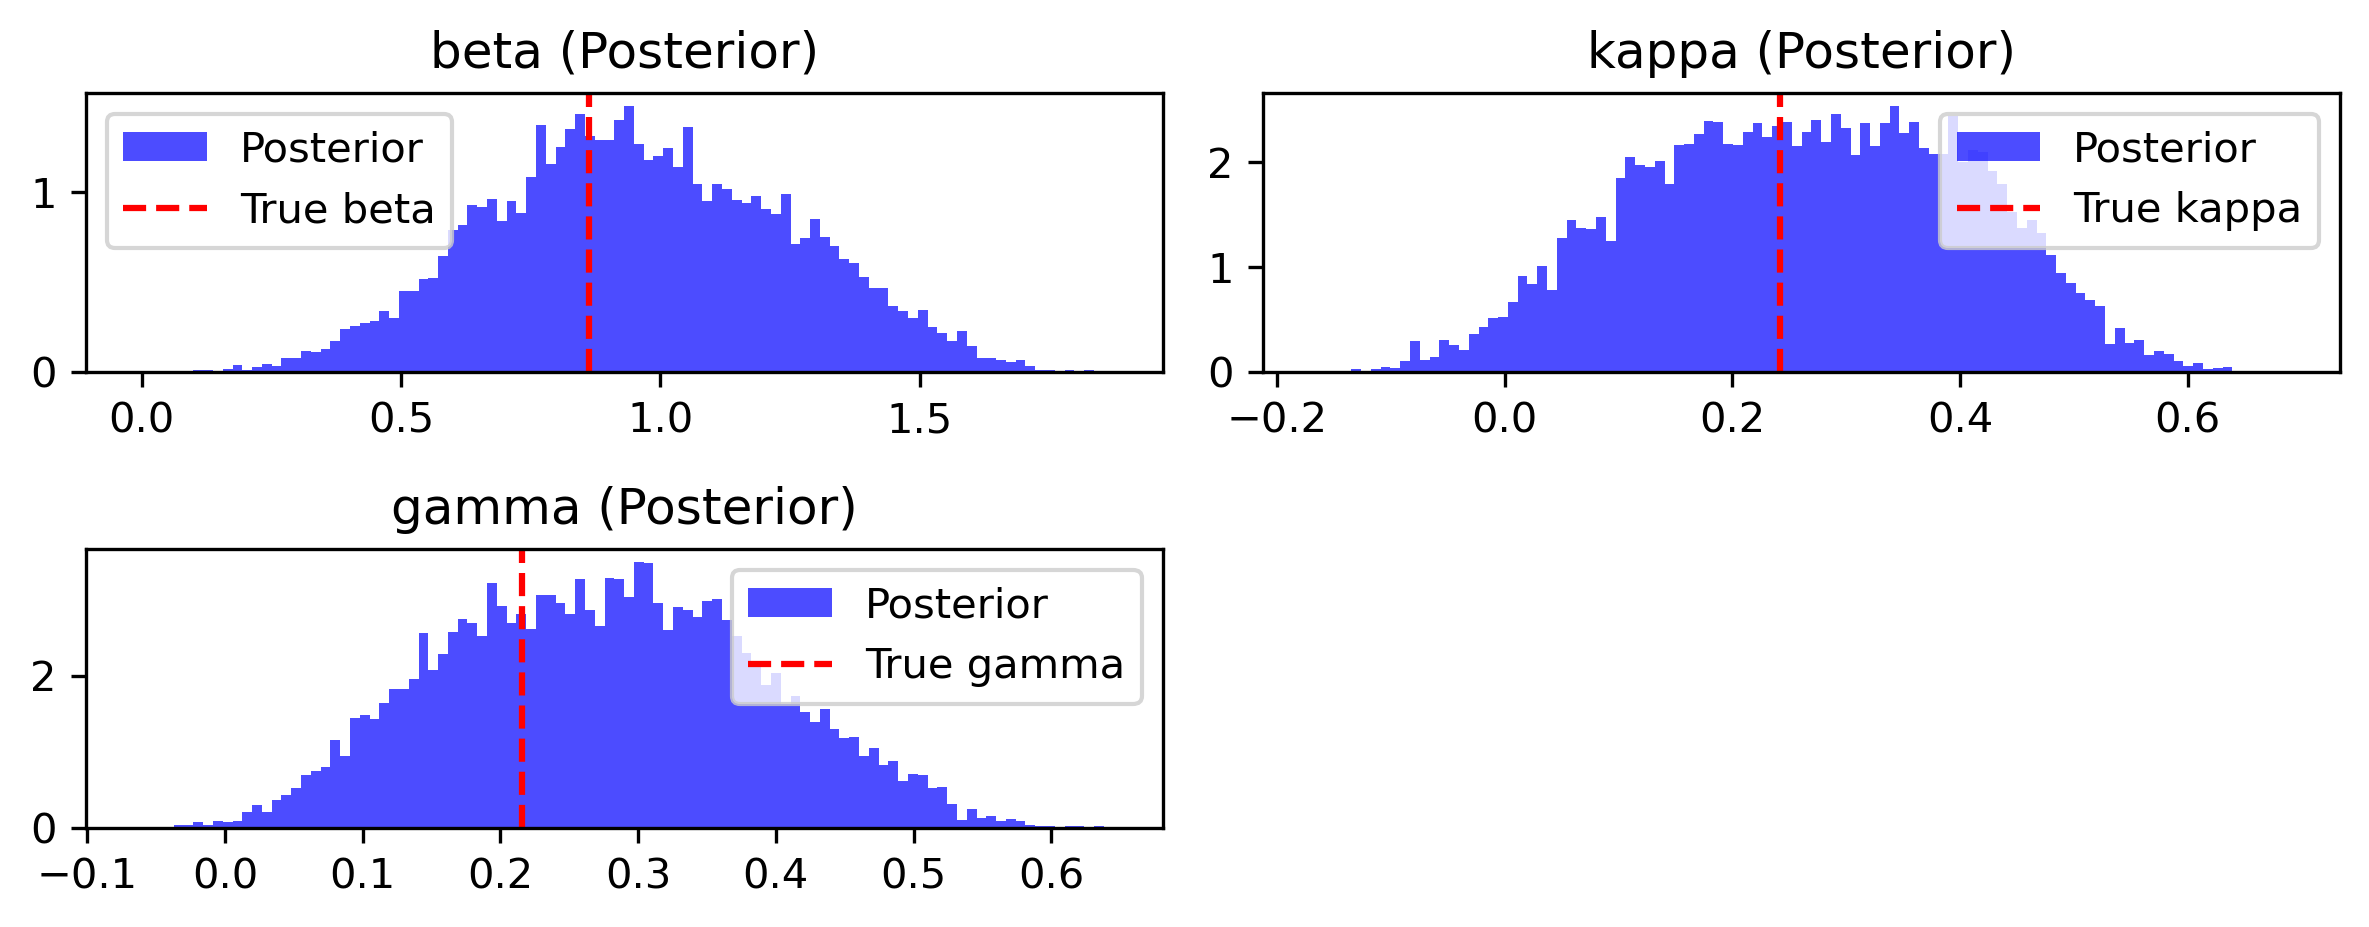

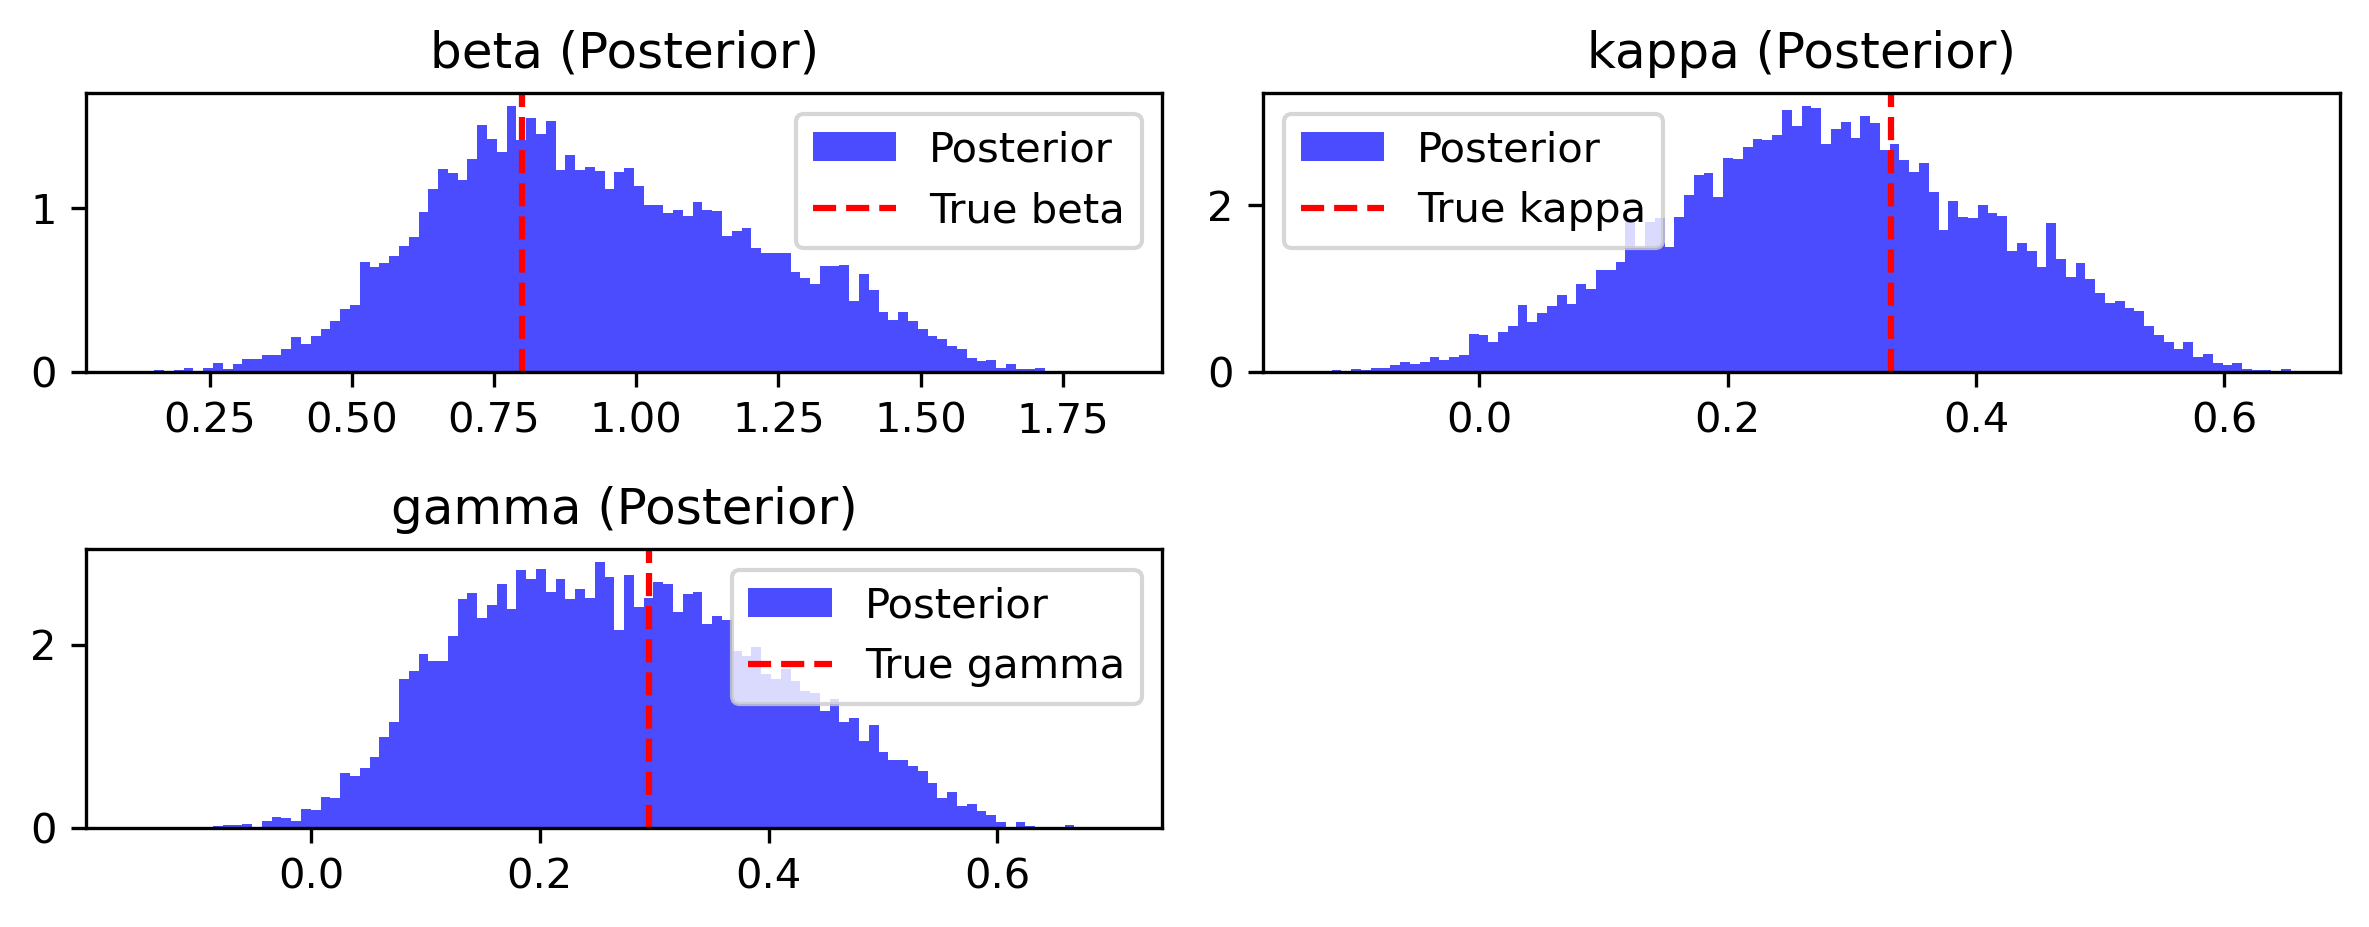

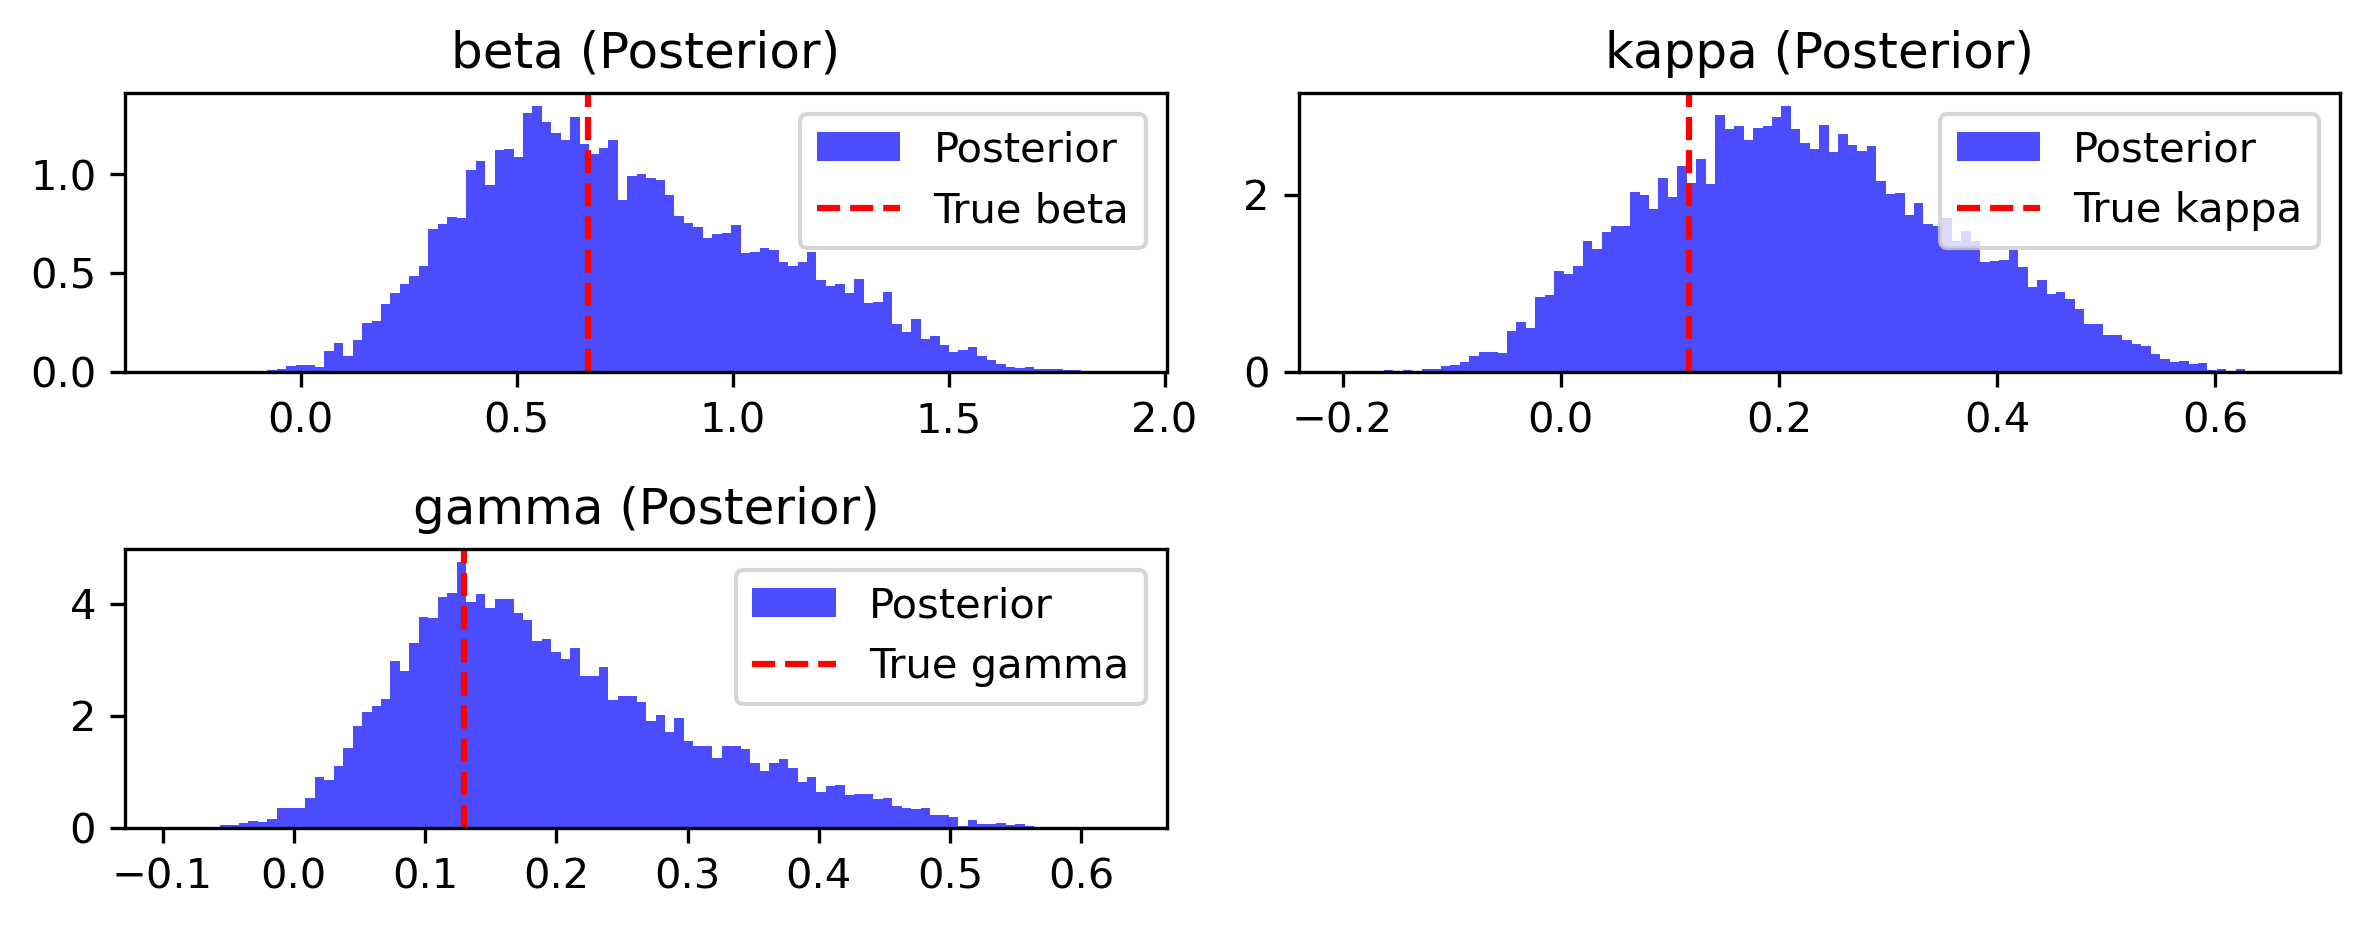

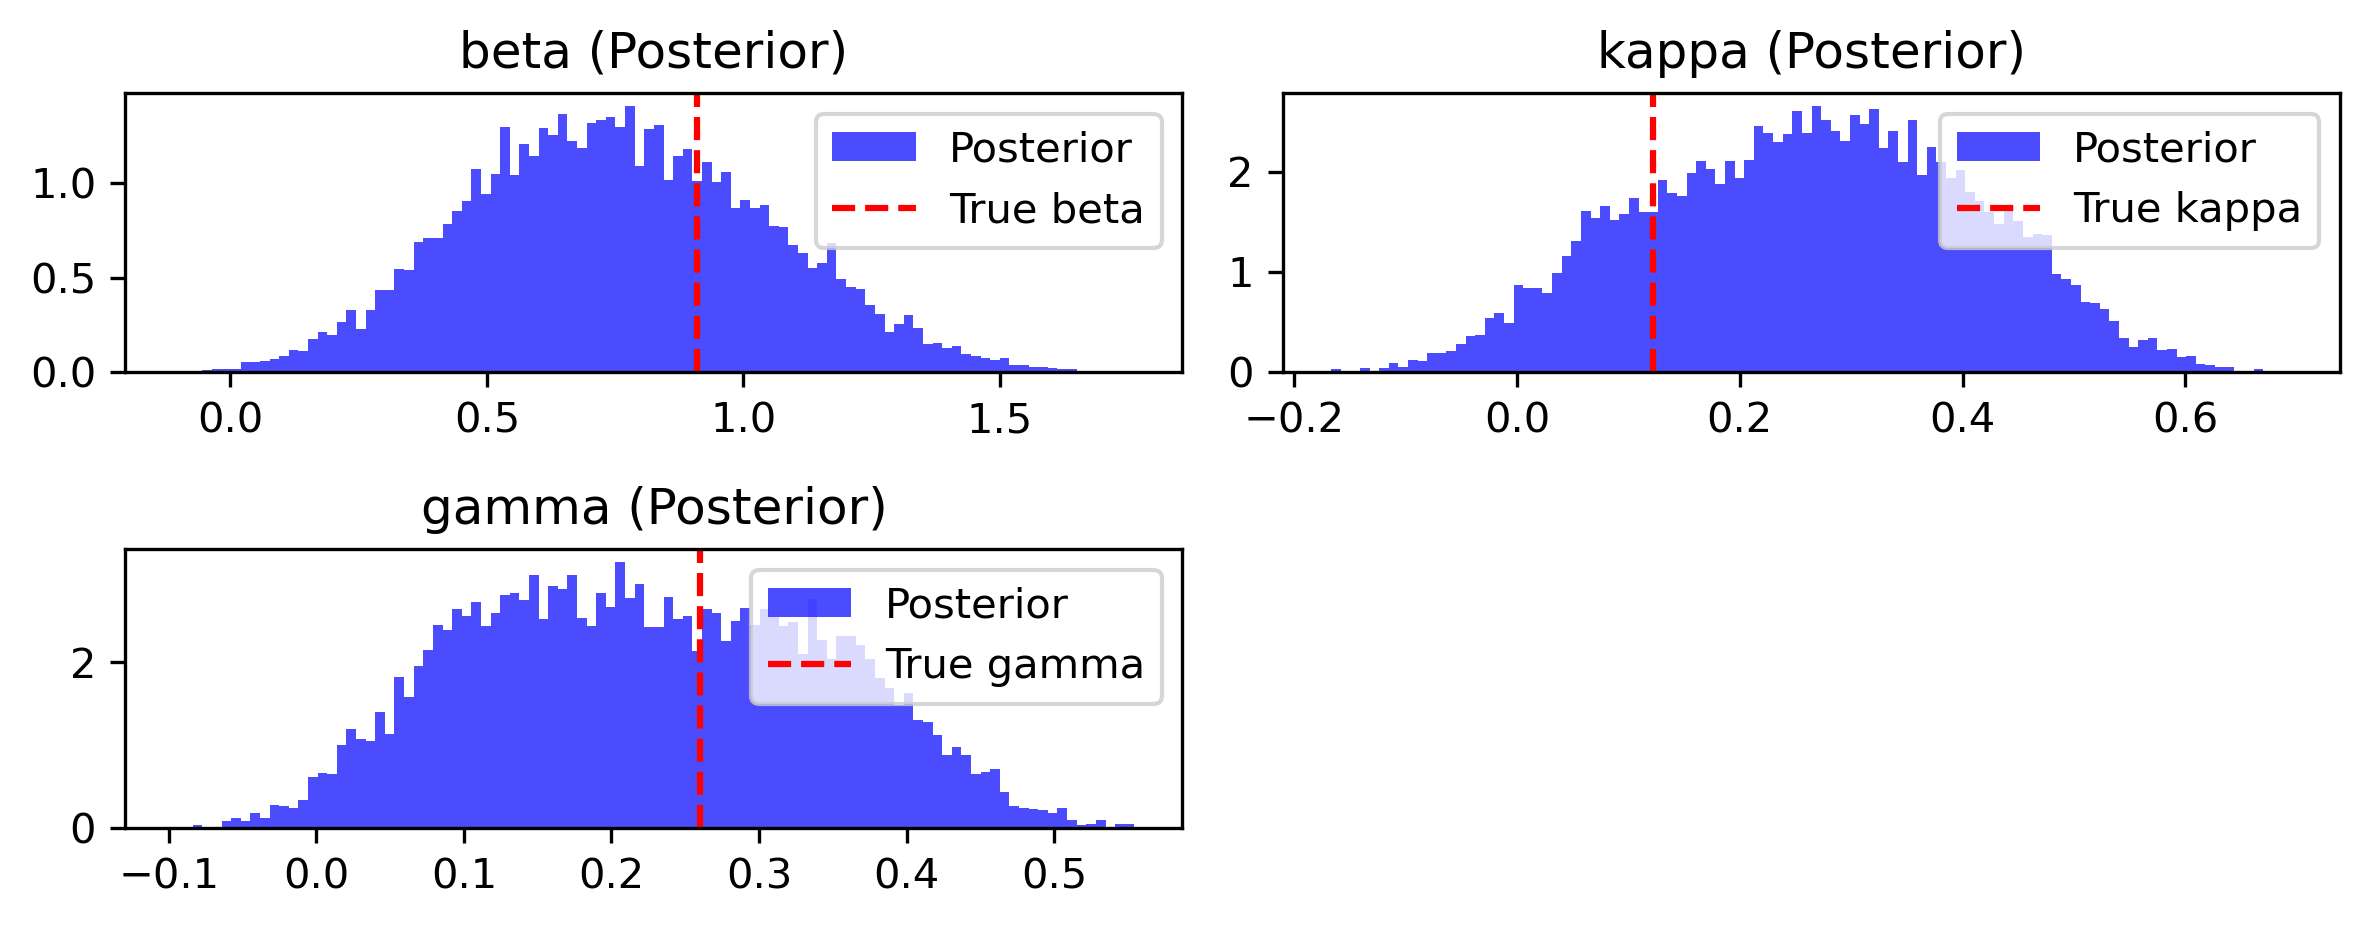

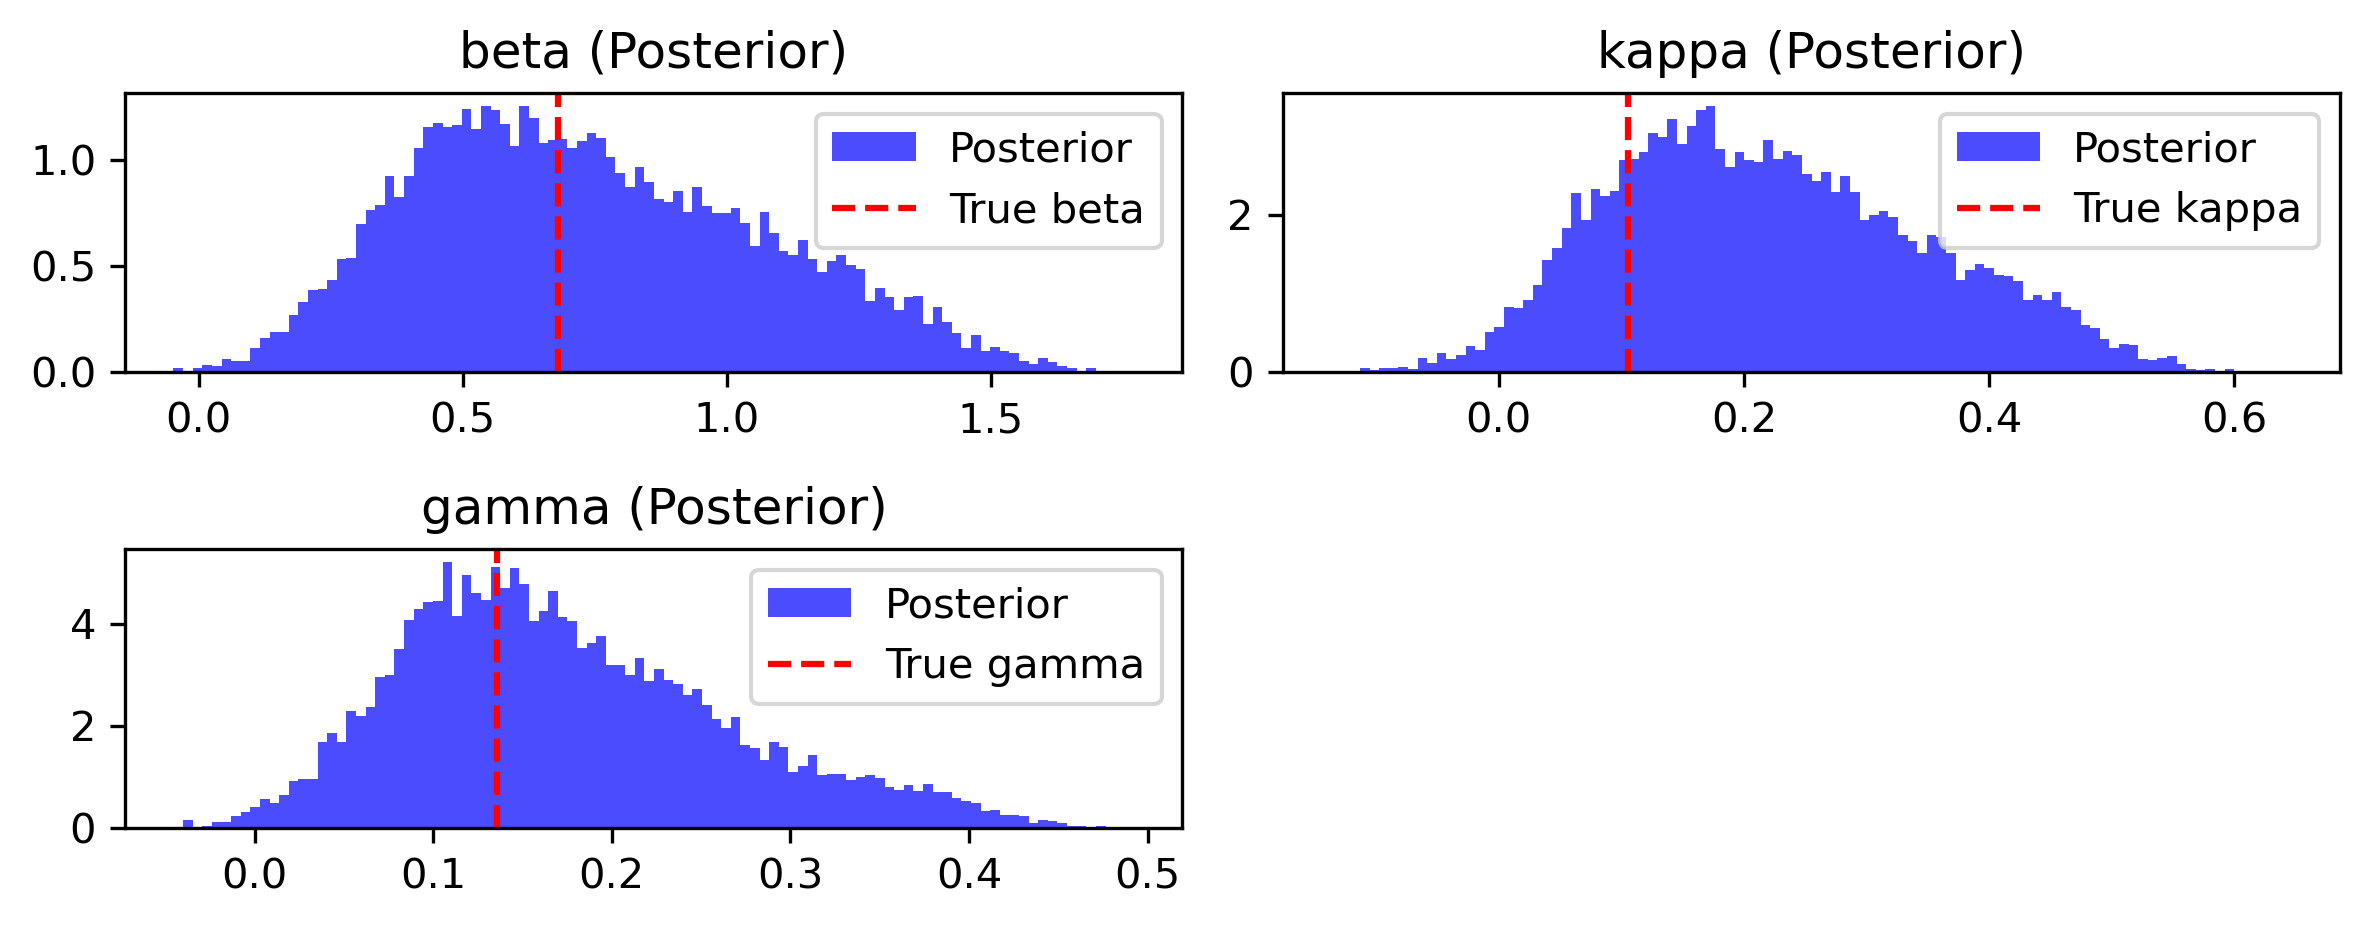

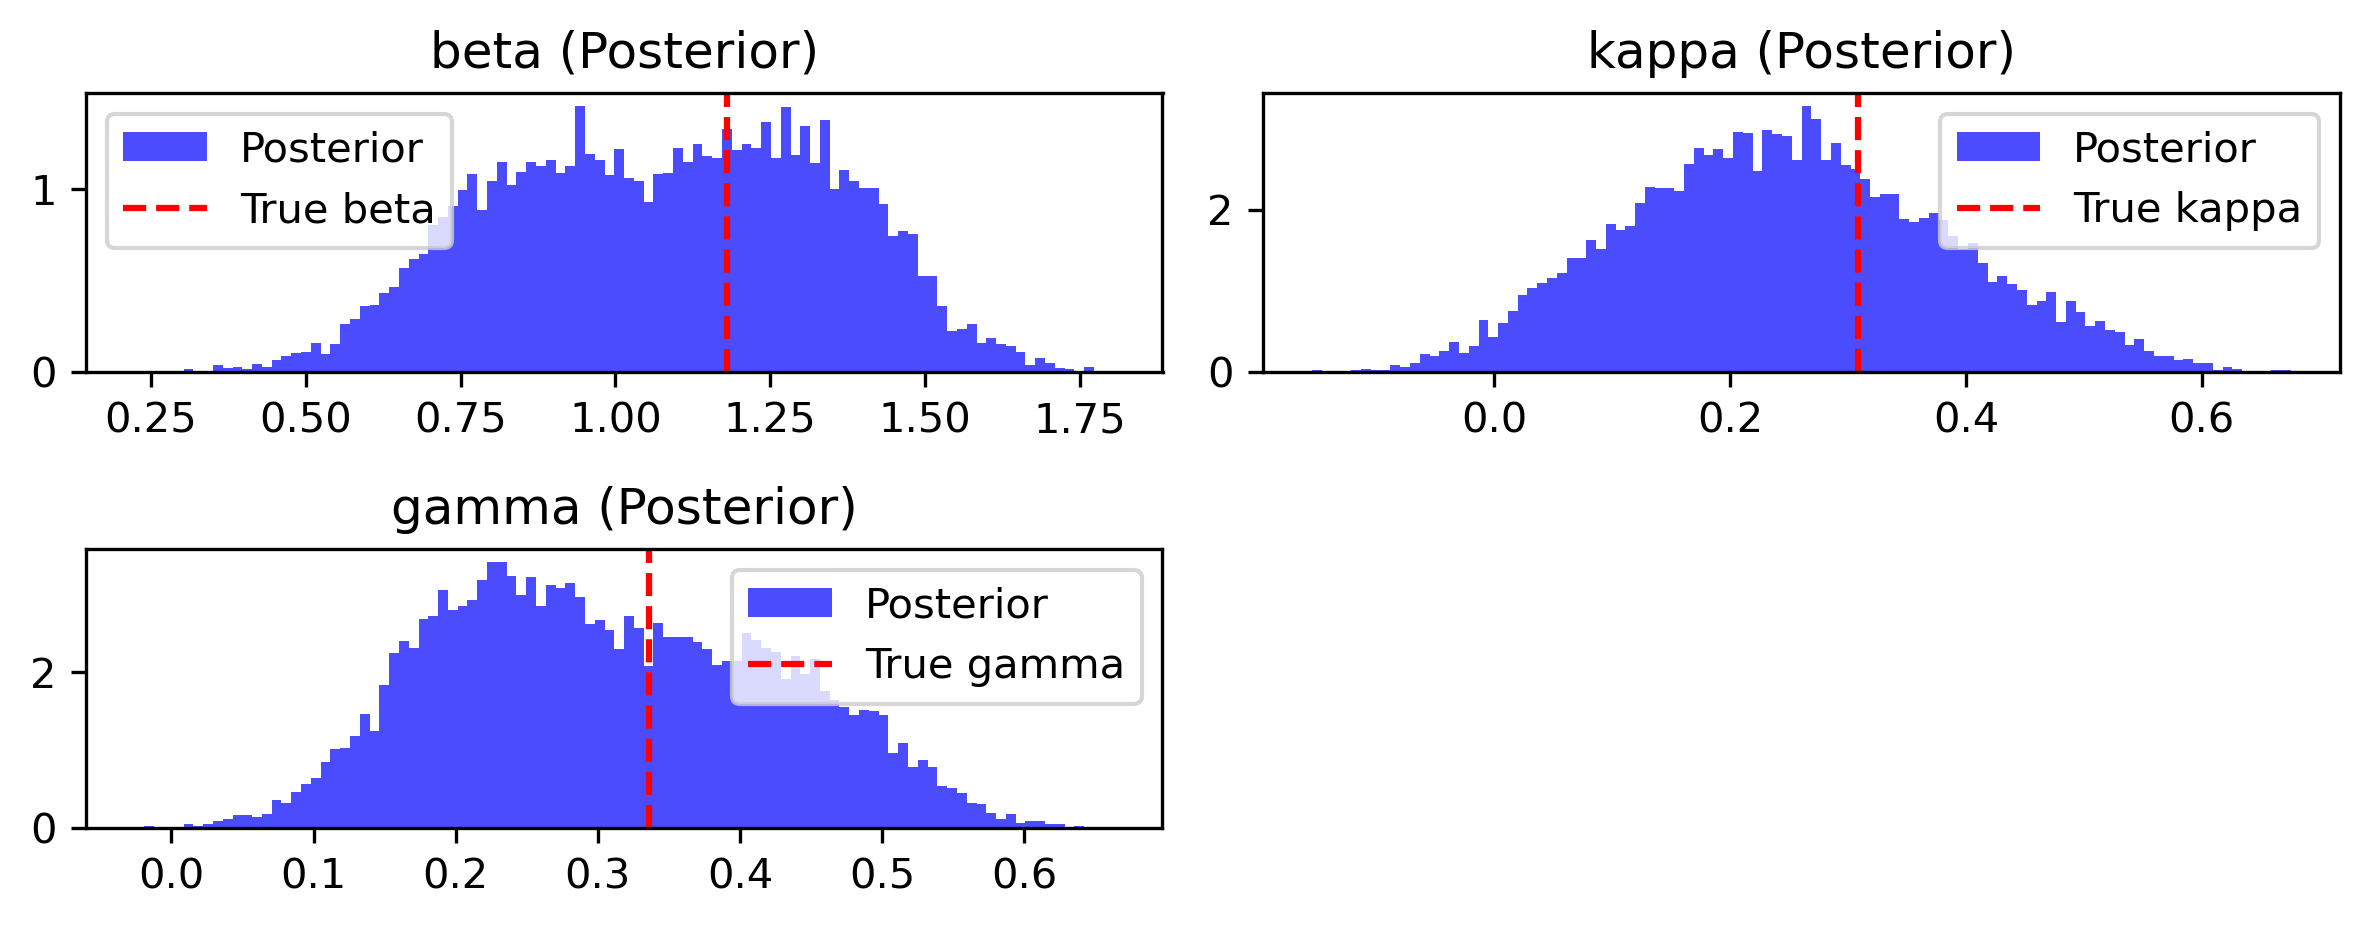

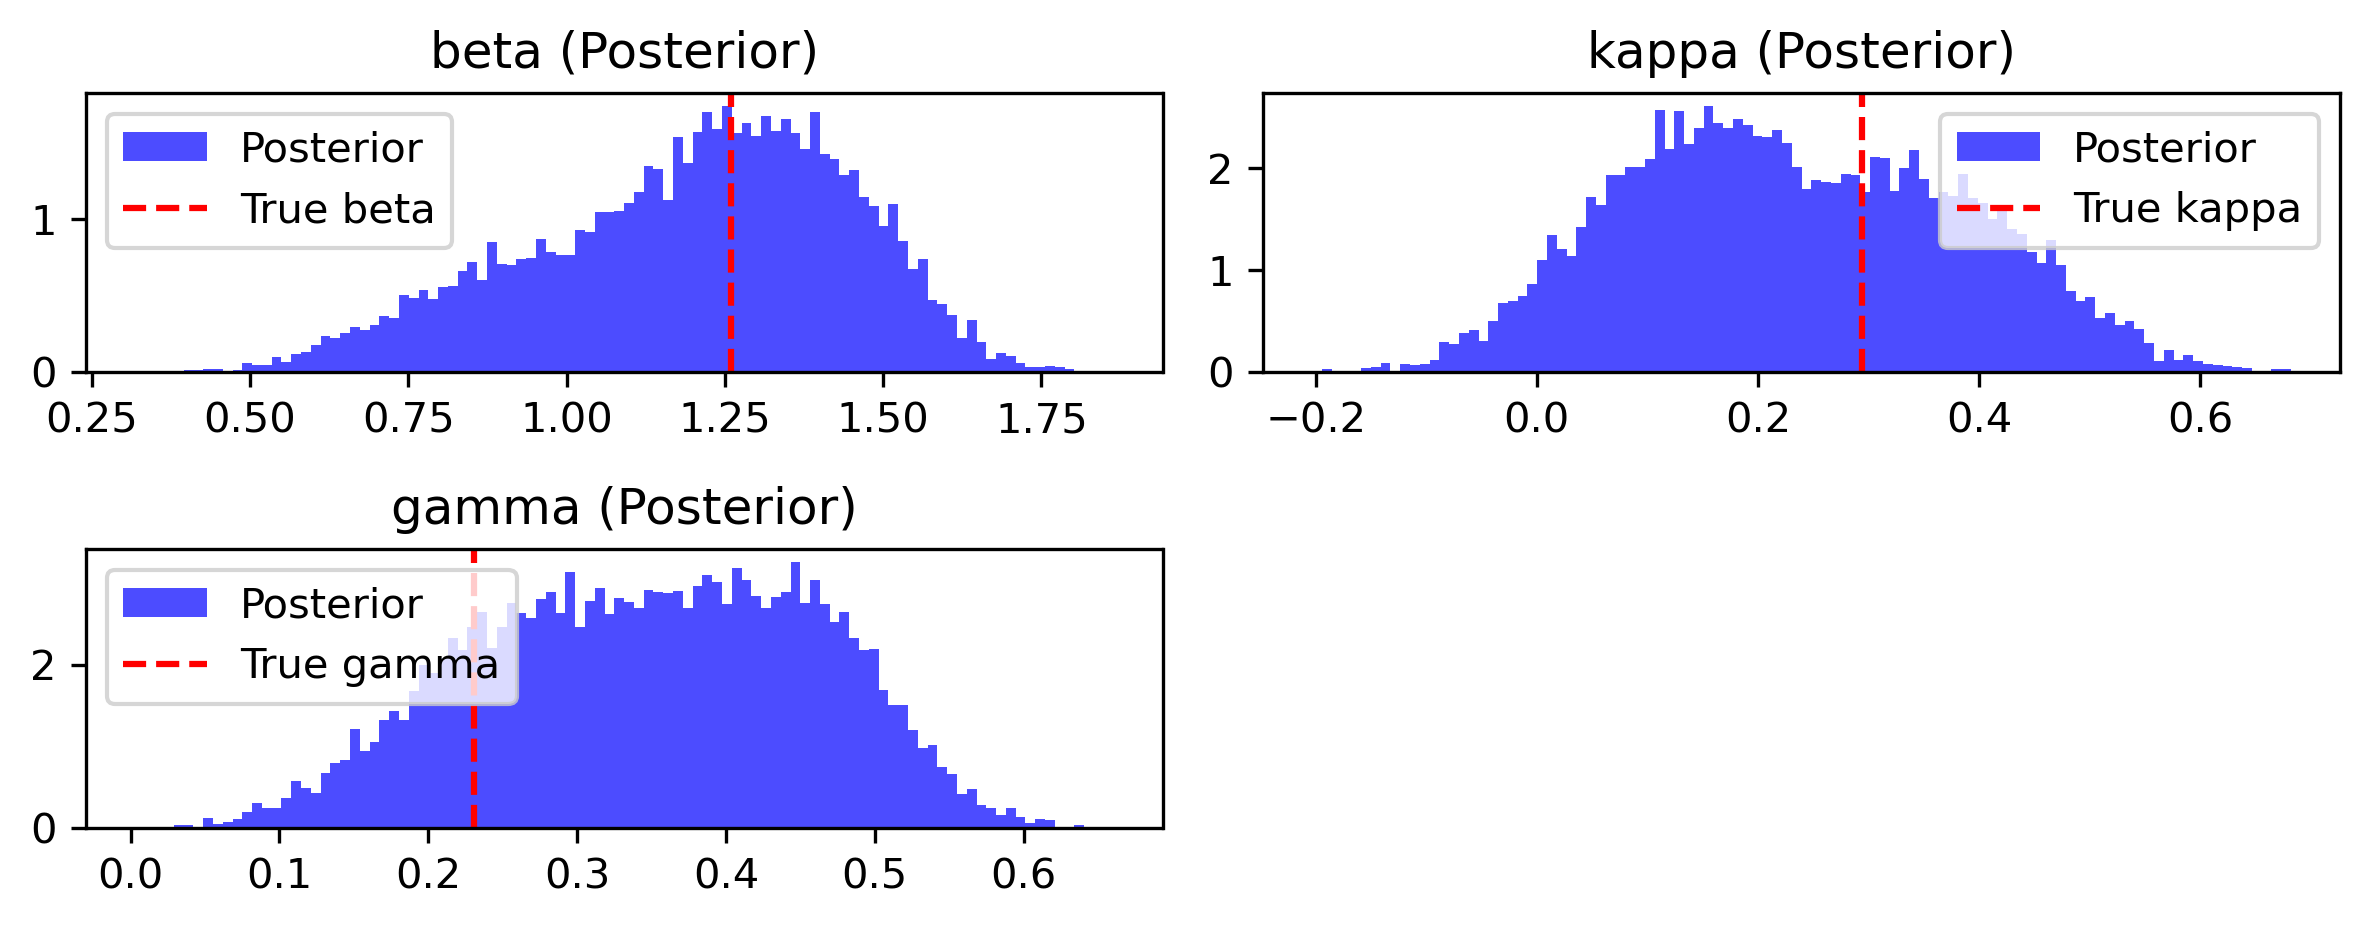

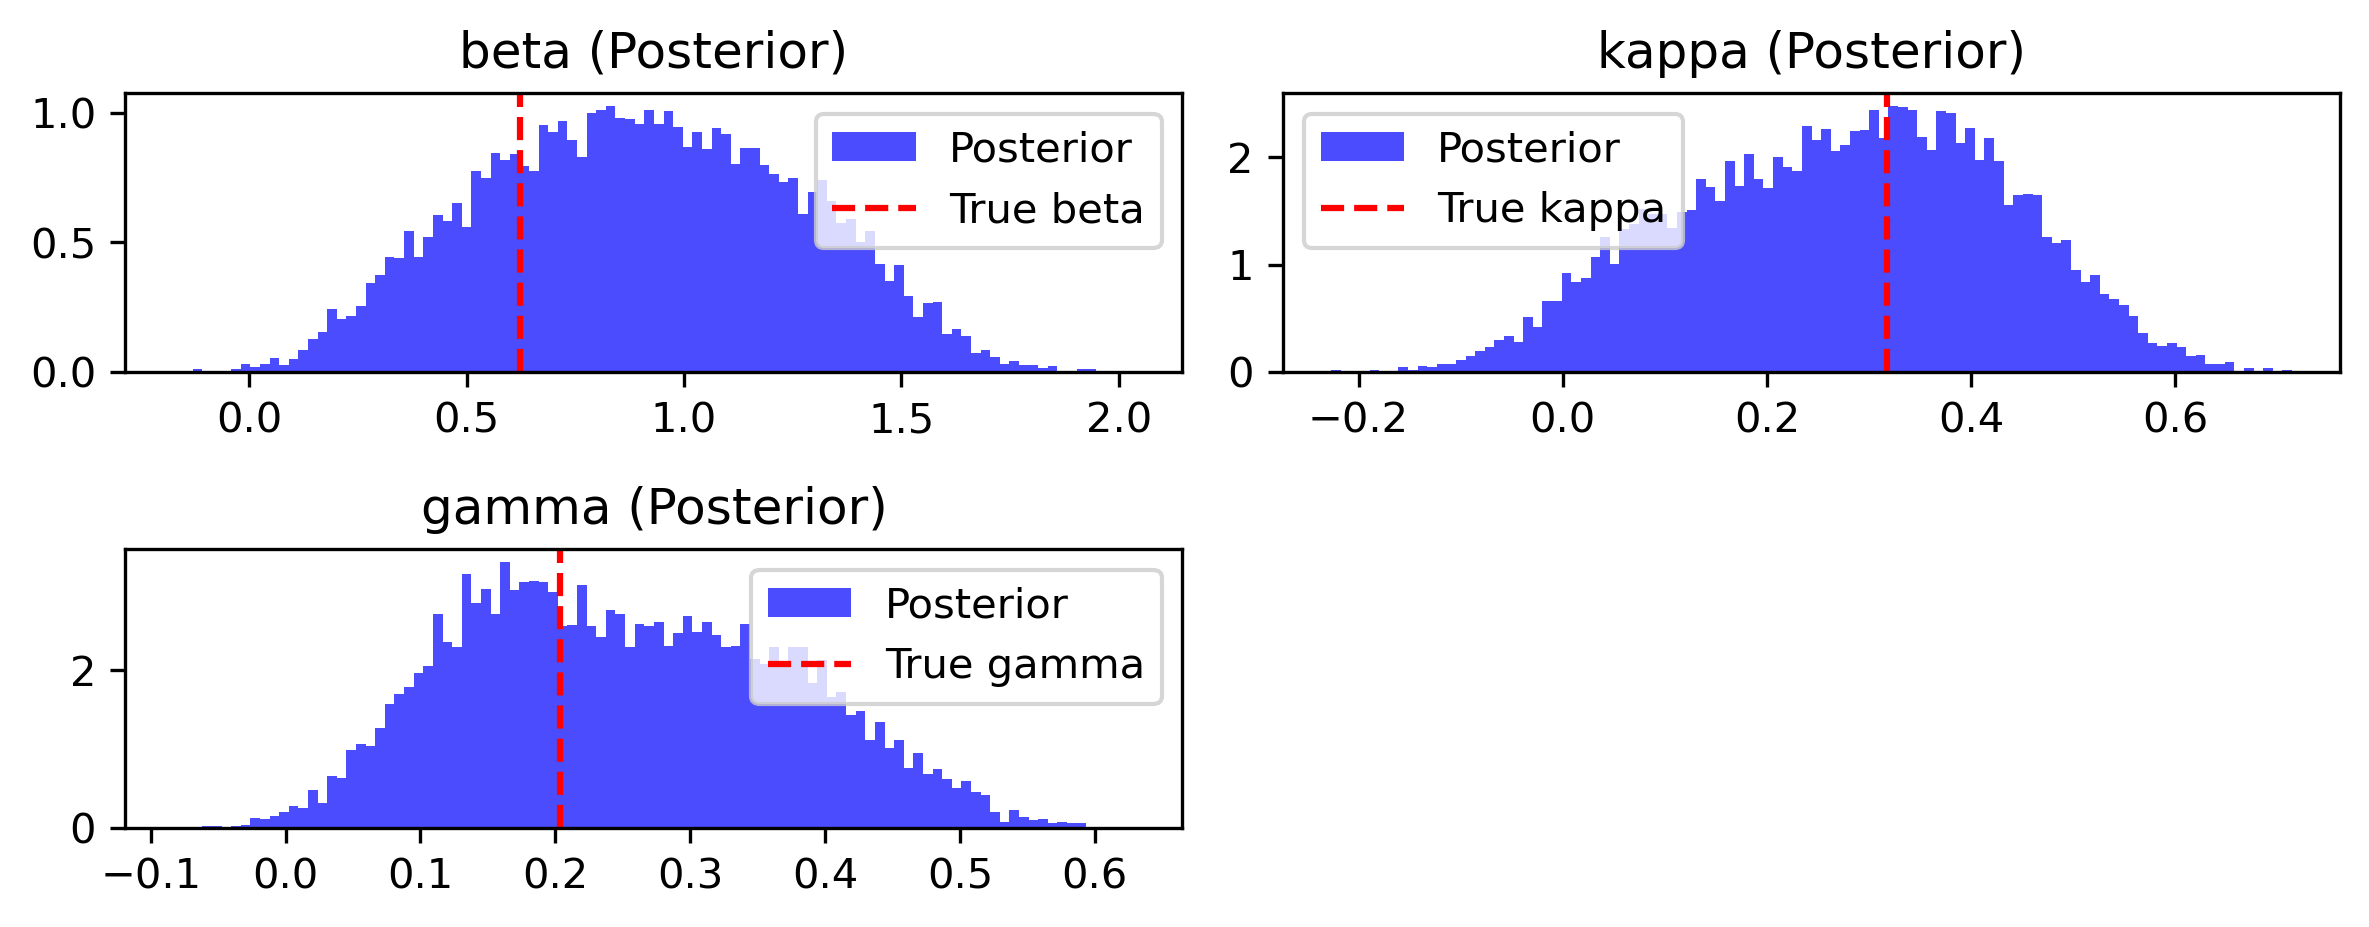

In [12]:
for k in range(10):
    samples = results_1k[k]
    true_values = true_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [13]:
results_10k = []

for i in range(10):
    start_time = time.time()
    abc_samples_10k = engine.run_abc(
        obs_data=true_dataset[i]['poisson'],
        prior=pyabc_prior,
        simulator_func=simulator,
        num_simulations=10000, 
        population_size=100,
        num_samples=10000
    )
    end_time = time.time()
    results_10k.append(abc_samples_10k)
    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:31:07>
ABC INFO: Calibration sample t = -1.


[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.37581435e+04.
ABC INFO: Accepted: 100 / 378 = 2.6455e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.88046220e+03.
ABC INFO: Accepted: 100 / 512 = 1.9531e-01, ESS: 8.6630e+01.
ABC INFO: t: 2, eps: 1.91703633e+03.
ABC INFO: Accepted: 100 / 861 = 1.1614e-01, ESS: 5.6487e+01.
ABC INFO: t: 3, eps: 8.75956652e+02.
ABC INFO: Accepted: 100 / 2004 = 4.9900e-02, ESS: 8.2595e+01.
ABC INFO: t: 4, eps: 5.61590104e+02.
ABC INFO: Accepted: 100 / 1930 = 5.1813e-02, ESS: 7.8496e+01.
ABC INFO: t: 5, eps: 4.31433799e+02.
ABC INFO: Accepted: 100 / 3018 = 3.3135e-02, ESS: 6.5914e+01.
ABC INFO: t: 6, eps: 3.74990933e+02.
ABC INFO: Accepted: 100 / 5570 = 1.7953e-02, ESS: 5.7737e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:14.263882, end_time=2026-02-05 12:31:21>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:31:21>
ABC INFO: Calibration sample t = -1.


[0] Done in 14.29 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.66380668e+04.
ABC INFO: Accepted: 100 / 373 = 2.6810e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.16211988e+03.
ABC INFO: Accepted: 100 / 562 = 1.7794e-01, ESS: 6.7657e+01.
ABC INFO: t: 2, eps: 1.34475893e+03.
ABC INFO: Accepted: 100 / 835 = 1.1976e-01, ESS: 6.2907e+01.
ABC INFO: t: 3, eps: 8.47024872e+02.
ABC INFO: Accepted: 100 / 1445 = 6.9204e-02, ESS: 7.0996e+01.
ABC INFO: t: 4, eps: 6.14056316e+02.
ABC INFO: Accepted: 100 / 2766 = 3.6153e-02, ESS: 8.8227e+01.
ABC INFO: t: 5, eps: 5.19165019e+02.
ABC INFO: Accepted: 100 / 937 = 1.0672e-01, ESS: 6.6757e+01.
ABC INFO: t: 6, eps: 4.46013768e+02.
ABC INFO: Accepted: 100 / 2012 = 4.9702e-02, ESS: 8.8901e+01.
ABC INFO: t: 7, eps: 4.01566730e+02.
ABC INFO: Accepted: 100 / 3628 = 2.7563e-02, ESS: 6.3167e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:15.852110, end_time=2026-02-05 12:31:37>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Sta

[1] Done in 15.88 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.21106475e+04.
ABC INFO: Accepted: 100 / 655 = 1.5267e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.29548170e+03.
ABC INFO: Accepted: 100 / 480 = 2.0833e-01, ESS: 7.7172e+01.
ABC INFO: t: 2, eps: 1.59866327e+03.
ABC INFO: Accepted: 100 / 953 = 1.0493e-01, ESS: 7.6872e+01.
ABC INFO: t: 3, eps: 8.76795388e+02.
ABC INFO: Accepted: 100 / 1409 = 7.0972e-02, ESS: 8.7251e+01.
ABC INFO: t: 4, eps: 6.16533917e+02.
ABC INFO: Accepted: 100 / 1622 = 6.1652e-02, ESS: 7.2141e+01.
ABC INFO: t: 5, eps: 5.12610479e+02.
ABC INFO: Accepted: 100 / 1154 = 8.6655e-02, ESS: 8.5377e+01.
ABC INFO: t: 6, eps: 4.46813208e+02.
ABC INFO: Accepted: 100 / 1374 = 7.2780e-02, ESS: 3.6525e+01.
ABC INFO: t: 7, eps: 4.10960889e+02.
ABC INFO: Accepted: 100 / 2601 = 3.8447e-02, ESS: 5.5400e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:14.459743, end_time=2026-02-05 12:31:52>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: St

[2] Done in 14.49 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.12349218e+04.
ABC INFO: Accepted: 100 / 588 = 1.7007e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.12669134e+03.
ABC INFO: Accepted: 100 / 509 = 1.9646e-01, ESS: 7.8175e+01.
ABC INFO: t: 2, eps: 1.40789491e+03.
ABC INFO: Accepted: 100 / 858 = 1.1655e-01, ESS: 6.7189e+01.
ABC INFO: t: 3, eps: 8.95810488e+02.
ABC INFO: Accepted: 100 / 1095 = 9.1324e-02, ESS: 2.3786e+01.
ABC INFO: t: 4, eps: 7.05455611e+02.
ABC INFO: Accepted: 100 / 1106 = 9.0416e-02, ESS: 6.5805e+01.
ABC INFO: t: 5, eps: 5.38088874e+02.
ABC INFO: Accepted: 100 / 1504 = 6.6489e-02, ESS: 7.8899e+01.
ABC INFO: t: 6, eps: 4.59221800e+02.
ABC INFO: Accepted: 100 / 2964 = 3.3738e-02, ESS: 7.5349e+01.
ABC INFO: t: 7, eps: 4.22861631e+02.
ABC INFO: Accepted: 100 / 4212 = 2.3742e-02, ESS: 8.0172e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:15.096106, end_time=2026-02-05 12:32:07>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: St

[3] Done in 15.13 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.40298658e+04.
ABC INFO: Accepted: 100 / 427 = 2.3419e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.76468194e+03.
ABC INFO: Accepted: 100 / 686 = 1.4577e-01, ESS: 8.1740e+01.
ABC INFO: t: 2, eps: 1.68015760e+03.
ABC INFO: Accepted: 100 / 1124 = 8.8968e-02, ESS: 7.6957e+01.
ABC INFO: t: 3, eps: 9.31235646e+02.
ABC INFO: Accepted: 100 / 2124 = 4.7081e-02, ESS: 6.4381e+01.
ABC INFO: t: 4, eps: 6.52660773e+02.
ABC INFO: Accepted: 100 / 1741 = 5.7438e-02, ESS: 8.8686e+01.
ABC INFO: t: 5, eps: 5.00533778e+02.
ABC INFO: Accepted: 100 / 736 = 1.3587e-01, ESS: 7.1464e+01.
ABC INFO: t: 6, eps: 4.38641738e+02.
ABC INFO: Accepted: 100 / 754 = 1.3263e-01, ESS: 8.2446e+01.
ABC INFO: t: 7, eps: 4.05380207e+02.
ABC INFO: Accepted: 100 / 1582 = 6.3211e-02, ESS: 2.5534e+01.
ABC INFO: t: 8, eps: 3.77148835e+02.
ABC INFO: Accepted: 100 / 5986 = 1.6706e-02, ESS: 6.0035e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:16.814169, end_time=

[4] Done in 16.84 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.27923318e+04.
ABC INFO: Accepted: 100 / 444 = 2.2523e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.60916777e+03.
ABC INFO: Accepted: 100 / 614 = 1.6287e-01, ESS: 7.7401e+01.
ABC INFO: t: 2, eps: 1.40400499e+03.
ABC INFO: Accepted: 100 / 1690 = 5.9172e-02, ESS: 8.8109e+01.
ABC INFO: t: 3, eps: 8.95034422e+02.
ABC INFO: Accepted: 100 / 1836 = 5.4466e-02, ESS: 8.8518e+01.
ABC INFO: t: 4, eps: 5.85567059e+02.
ABC INFO: Accepted: 100 / 1232 = 8.1169e-02, ESS: 8.7868e+01.
ABC INFO: t: 5, eps: 4.61901328e+02.
ABC INFO: Accepted: 100 / 617 = 1.6207e-01, ESS: 8.1215e+01.
ABC INFO: t: 6, eps: 4.18944151e+02.
ABC INFO: Accepted: 100 / 796 = 1.2563e-01, ESS: 6.0726e+01.
ABC INFO: t: 7, eps: 3.88798104e+02.
ABC INFO: Accepted: 100 / 1067 = 9.3721e-02, ESS: 6.0330e+01.
ABC INFO: t: 8, eps: 3.54771303e+02.
ABC INFO: Accepted: 100 / 3496 = 2.8604e-02, ESS: 6.4652e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:16.698069, end_time=

[5] Done in 16.73 seconds
[*] Running SMC-ABC...


ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:32:41>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.07473911e+04.
ABC INFO: Accepted: 100 / 689 = 1.4514e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.07227437e+03.
ABC INFO: Accepted: 100 / 686 = 1.4577e-01, ESS: 8.8553e+01.
ABC INFO: t: 2, eps: 1.34210651e+03.
ABC INFO: Accepted: 100 / 1900 = 5.2632e-02, ESS: 7.7248e+01.
ABC INFO: t: 3, eps: 8.63110168e+02.
ABC INFO: Accepted: 100 / 3386 = 2.9533e-02, ESS: 9.0258e+01.
ABC INFO: t: 4, eps: 6.01322649e+02.
ABC INFO: Accepted: 100 / 817 = 1.2240e-01, ESS: 8.2195e+01.
ABC INFO: t: 5, eps: 4.91203758e+02.
ABC INFO: Accepted: 100 / 552 = 1.8116e-01, ESS: 7.9714e+01.
ABC INFO: t: 6, eps: 4.18449559e+02.
ABC INFO: Accepted: 100 / 1481 = 6.7522e-02, ESS: 7.0384e+01.
ABC INFO: t: 7, eps: 3.78111174e+02.
ABC INFO: Accepted: 100 / 3490 = 2.8653e-02, ESS: 8.4545e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:15.131311, e

[6] Done in 15.16 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.57424193e+04.
ABC INFO: Accepted: 100 / 449 = 2.2272e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 4.29660863e+03.
ABC INFO: Accepted: 100 / 431 = 2.3202e-01, ESS: 6.6205e+01.
ABC INFO: t: 2, eps: 1.44773307e+03.
ABC INFO: Accepted: 100 / 601 = 1.6639e-01, ESS: 8.4300e+01.
ABC INFO: t: 3, eps: 7.84307866e+02.
ABC INFO: Accepted: 100 / 992 = 1.0081e-01, ESS: 6.9742e+01.
ABC INFO: t: 4, eps: 5.87363244e+02.
ABC INFO: Accepted: 100 / 1632 = 6.1275e-02, ESS: 7.2189e+01.
ABC INFO: t: 5, eps: 4.78061576e+02.
ABC INFO: Accepted: 100 / 890 = 1.1236e-01, ESS: 6.7612e+01.
ABC INFO: t: 6, eps: 4.22959818e+02.
ABC INFO: Accepted: 100 / 2005 = 4.9875e-02, ESS: 7.2379e+01.
ABC INFO: t: 7, eps: 3.87699969e+02.
ABC INFO: Accepted: 100 / 3930 = 2.5445e-02, ESS: 7.0918e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:14.842982, end_time=2026-02-05 12:33:11>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Star

[7] Done in 14.87 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.81246212e+04.
ABC INFO: Accepted: 100 / 482 = 2.0747e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.67453817e+03.
ABC INFO: Accepted: 100 / 591 = 1.6920e-01, ESS: 6.5496e+01.
ABC INFO: t: 2, eps: 1.27471352e+03.
ABC INFO: Accepted: 100 / 577 = 1.7331e-01, ESS: 9.4182e+01.
ABC INFO: t: 3, eps: 7.18163268e+02.
ABC INFO: Accepted: 100 / 721 = 1.3870e-01, ESS: 7.7629e+01.
ABC INFO: t: 4, eps: 5.48137328e+02.
ABC INFO: Accepted: 100 / 825 = 1.2121e-01, ESS: 4.9183e+01.
ABC INFO: t: 5, eps: 4.52985448e+02.
ABC INFO: Accepted: 100 / 817 = 1.2240e-01, ESS: 4.6913e+01.
ABC INFO: t: 6, eps: 3.92183229e+02.
ABC INFO: Accepted: 100 / 2174 = 4.5998e-02, ESS: 6.3346e+01.
ABC INFO: t: 7, eps: 3.48621117e+02.
ABC INFO: Accepted: 100 / 5535 = 1.8067e-02, ESS: 1.5947e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:14.935022, end_time=2026-02-05 12:33:26>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start

[8] Done in 14.96 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.28661789e+04.
ABC INFO: Accepted: 100 / 531 = 1.8832e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.34879111e+03.
ABC INFO: Accepted: 100 / 571 = 1.7513e-01, ESS: 8.4651e+01.
ABC INFO: t: 2, eps: 1.40360617e+03.
ABC INFO: Accepted: 100 / 1241 = 8.0580e-02, ESS: 8.6410e+01.
ABC INFO: t: 3, eps: 8.72138950e+02.
ABC INFO: Accepted: 100 / 1380 = 7.2464e-02, ESS: 8.5420e+01.
ABC INFO: t: 4, eps: 6.01676270e+02.
ABC INFO: Accepted: 100 / 1610 = 6.2112e-02, ESS: 8.7508e+01.
ABC INFO: t: 5, eps: 4.99548403e+02.
ABC INFO: Accepted: 100 / 1130 = 8.8496e-02, ESS: 8.1361e+01.
ABC INFO: t: 6, eps: 4.42487707e+02.
ABC INFO: Accepted: 100 / 2067 = 4.8379e-02, ESS: 9.5613e+00.
ABC INFO: t: 7, eps: 4.14542717e+02.
ABC INFO: Accepted: 100 / 11387 = 8.7819e-03, ESS: 1.3210e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:15.590926, end_time=2026-02-05 12:33:41>


[9] Done in 15.62 seconds


In [14]:
with open("./results/Model1/ABC/M1_10k_posterior_samples.pkl", "wb") as f:
    pickle.dump(results_10k, f)

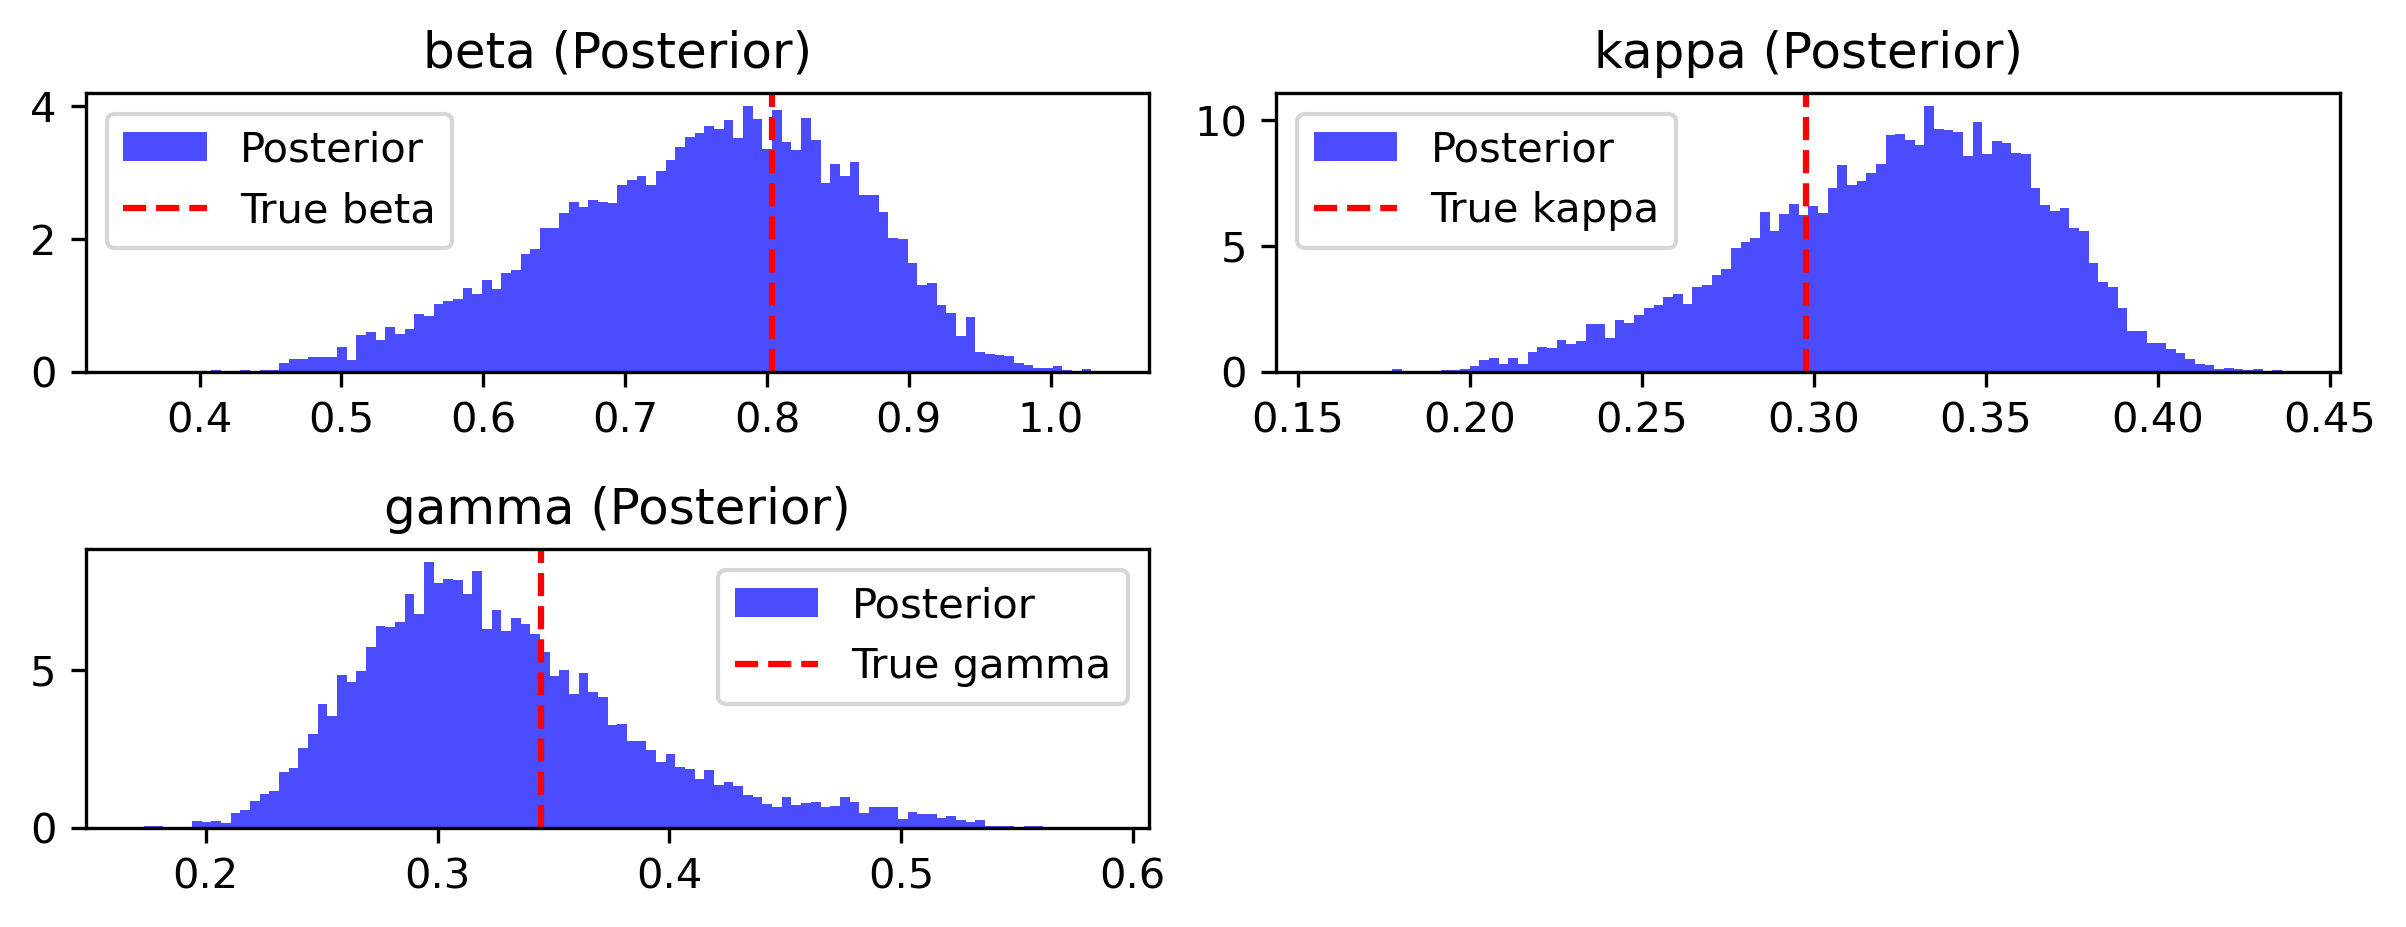

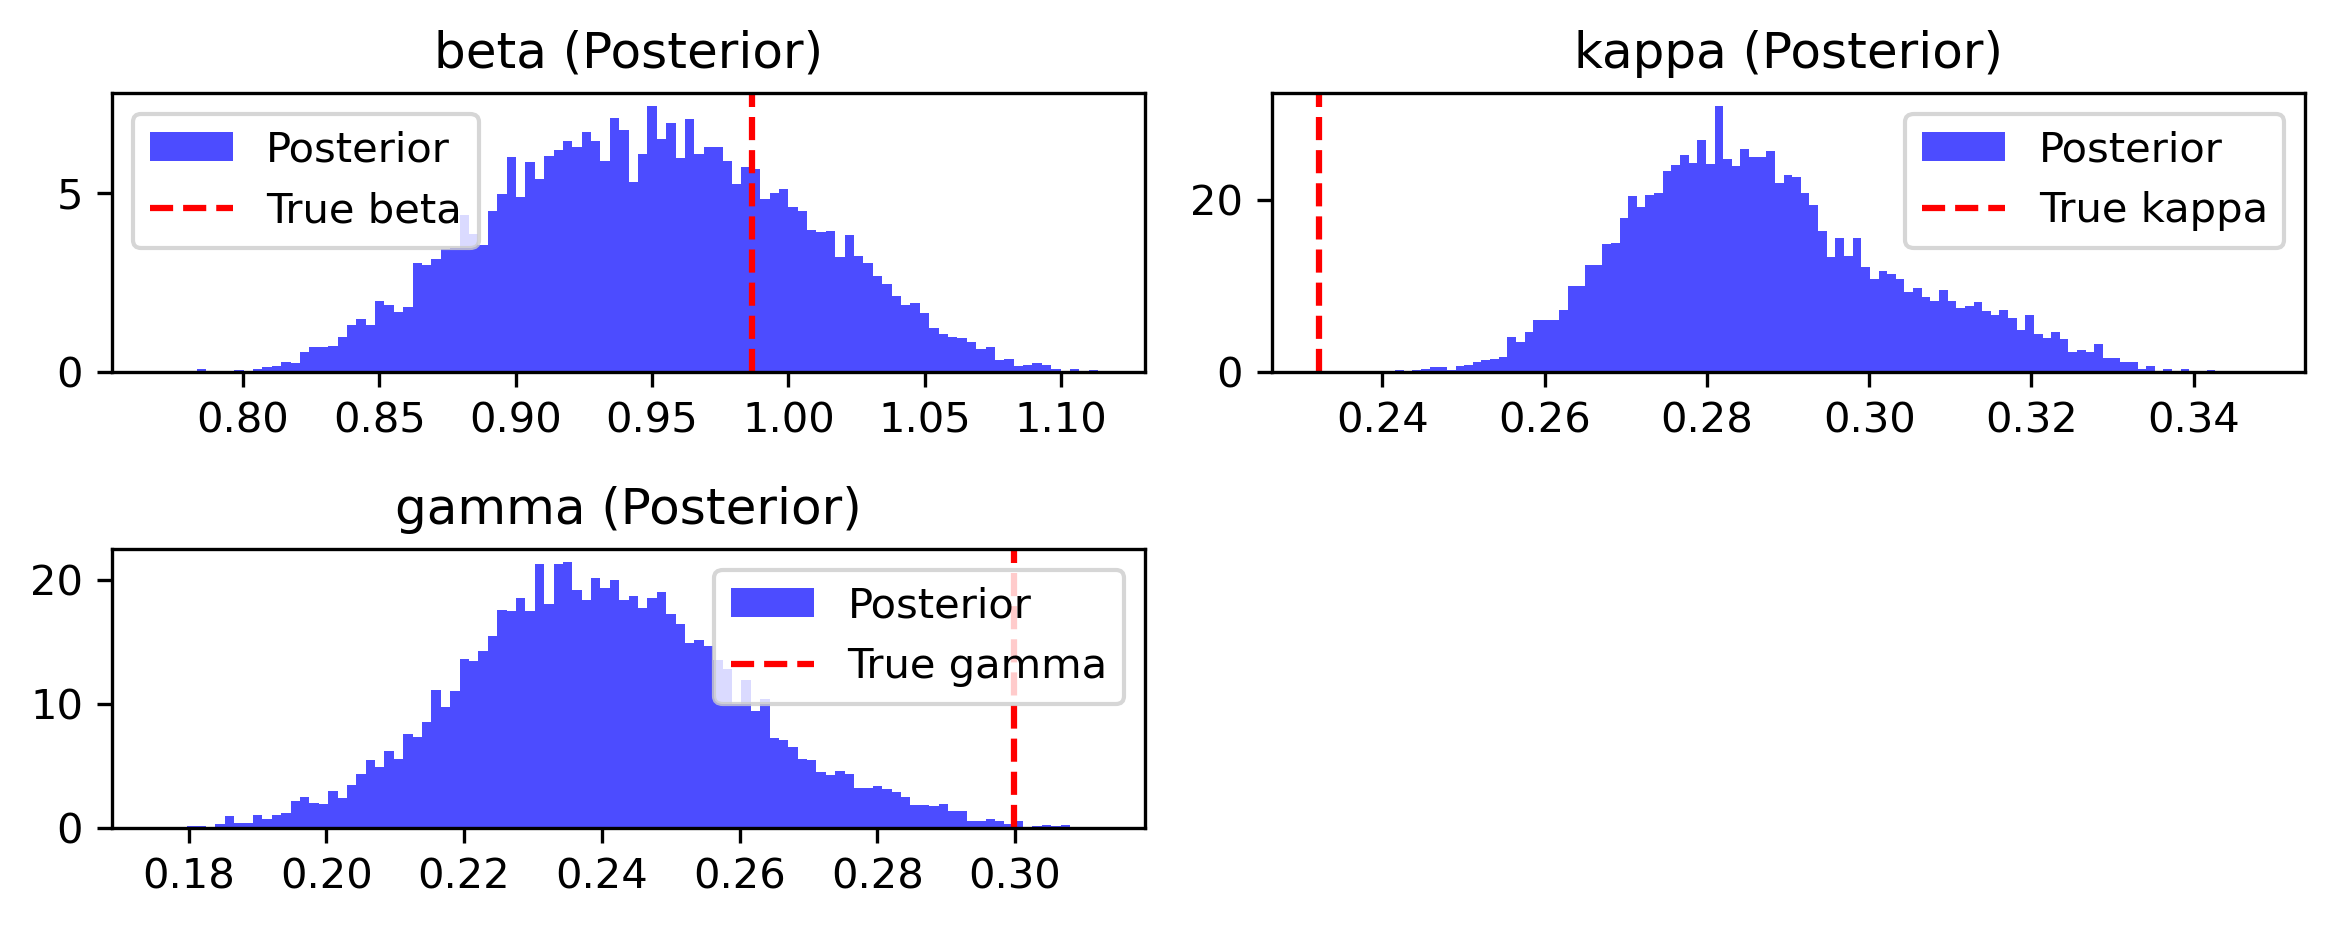

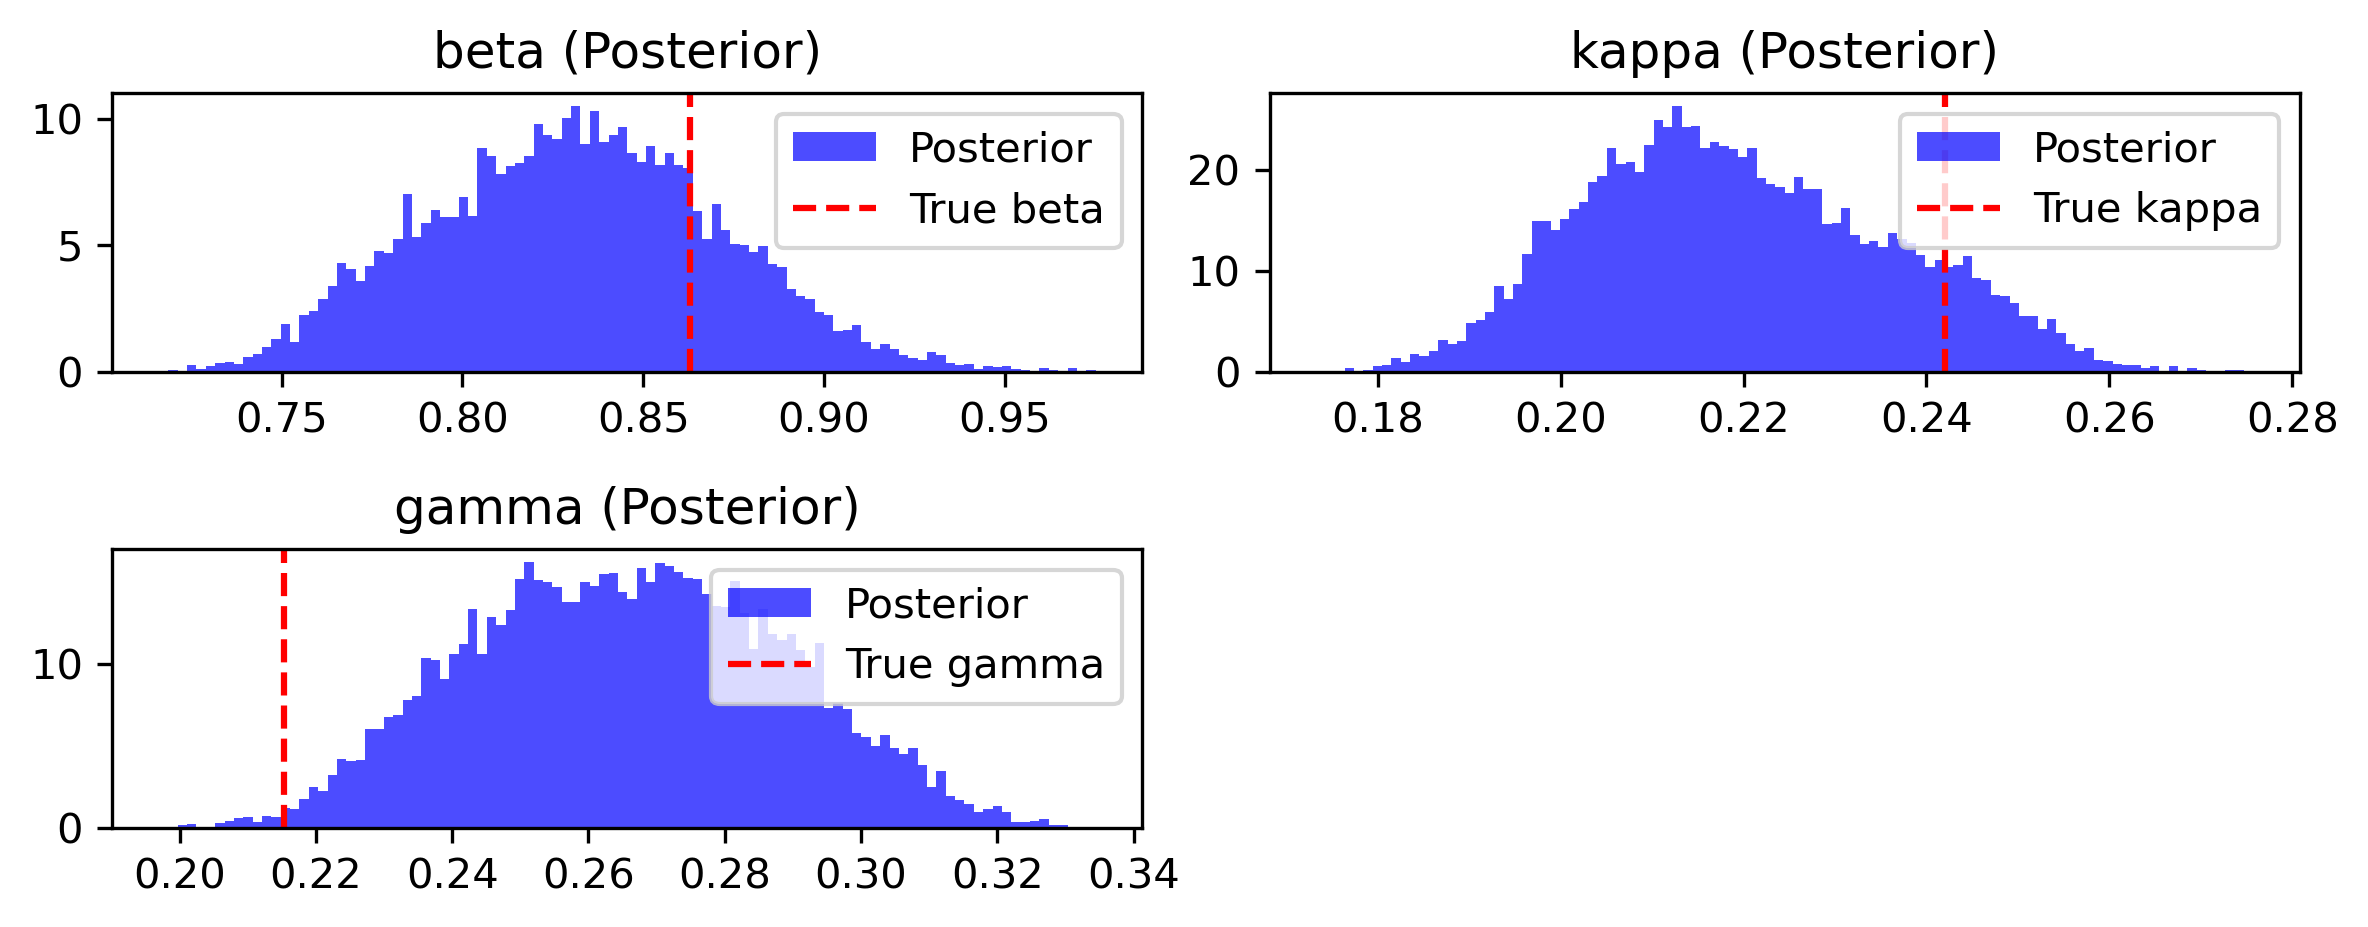

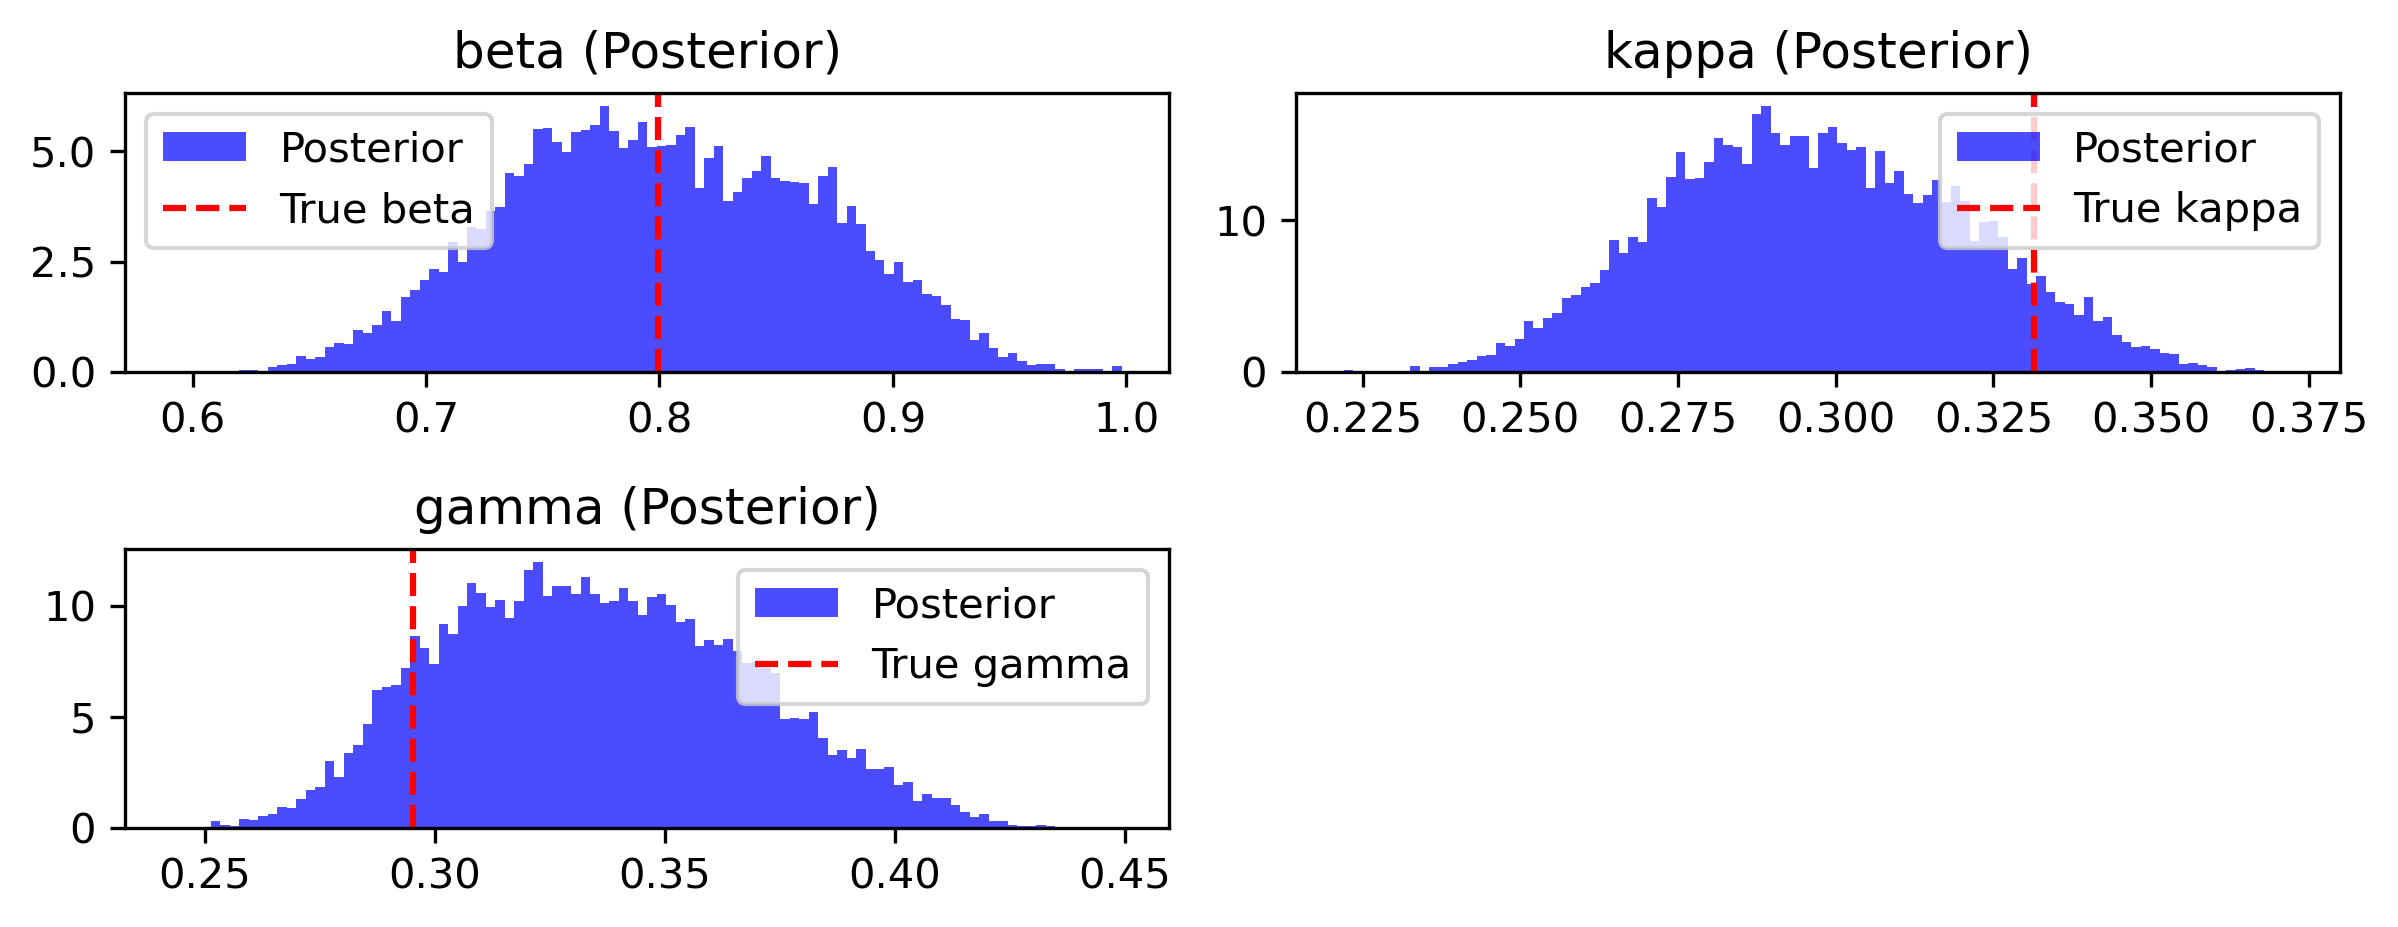

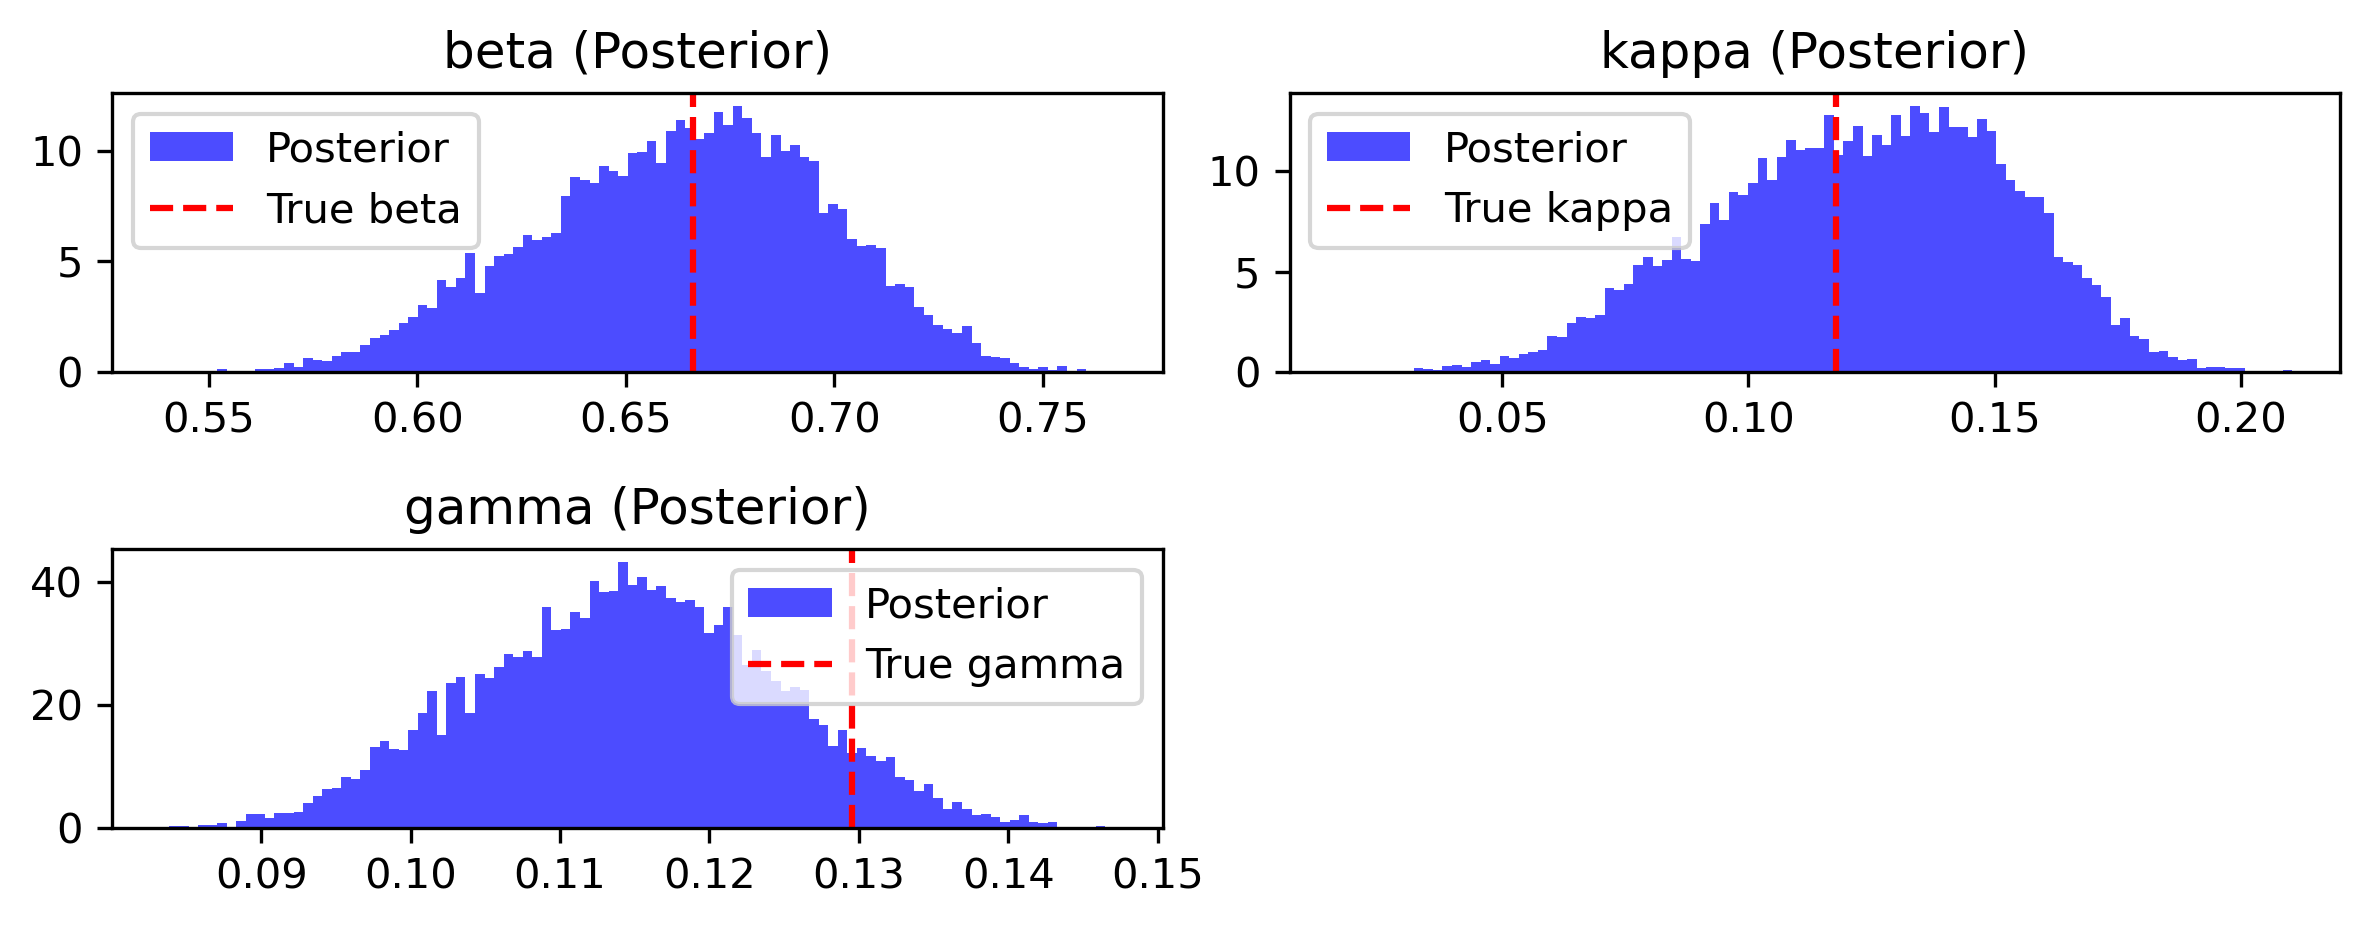

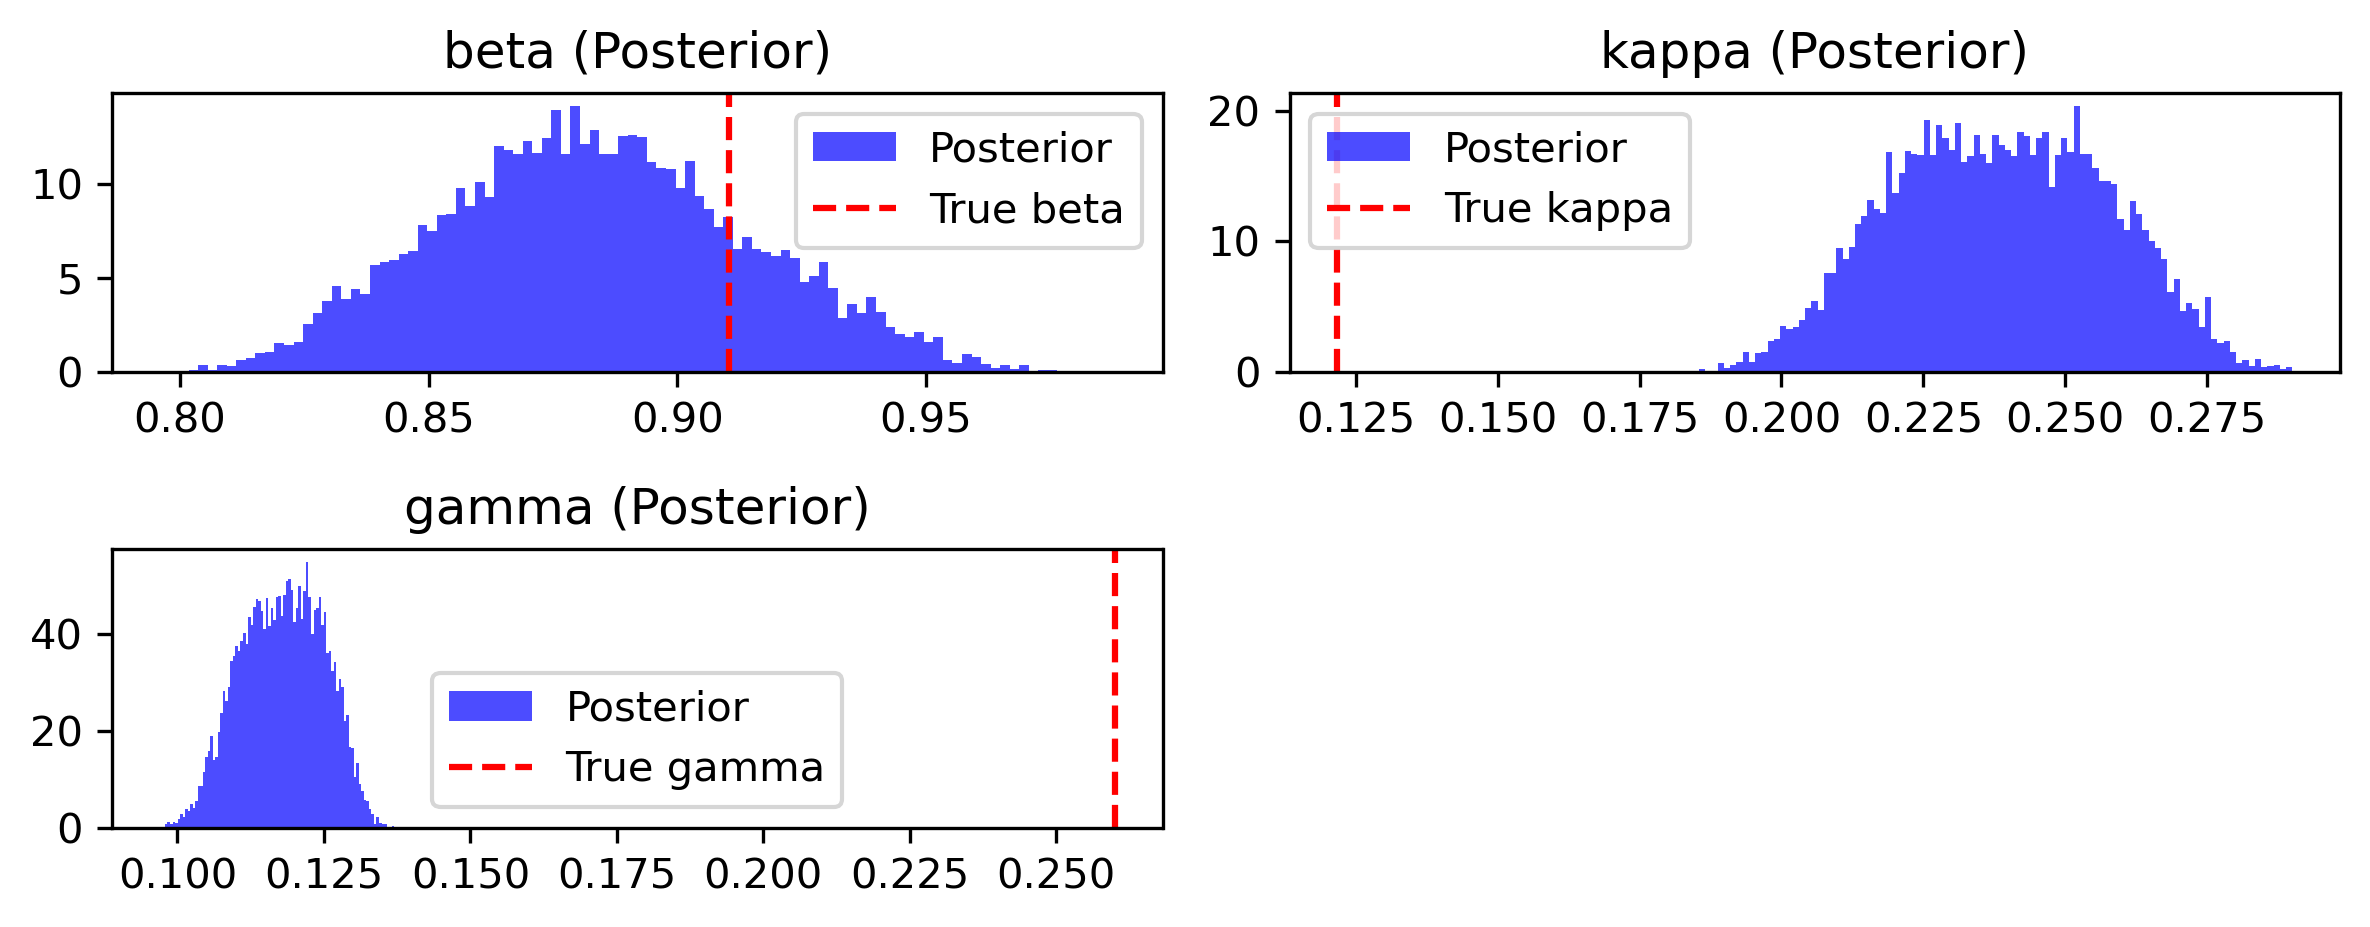

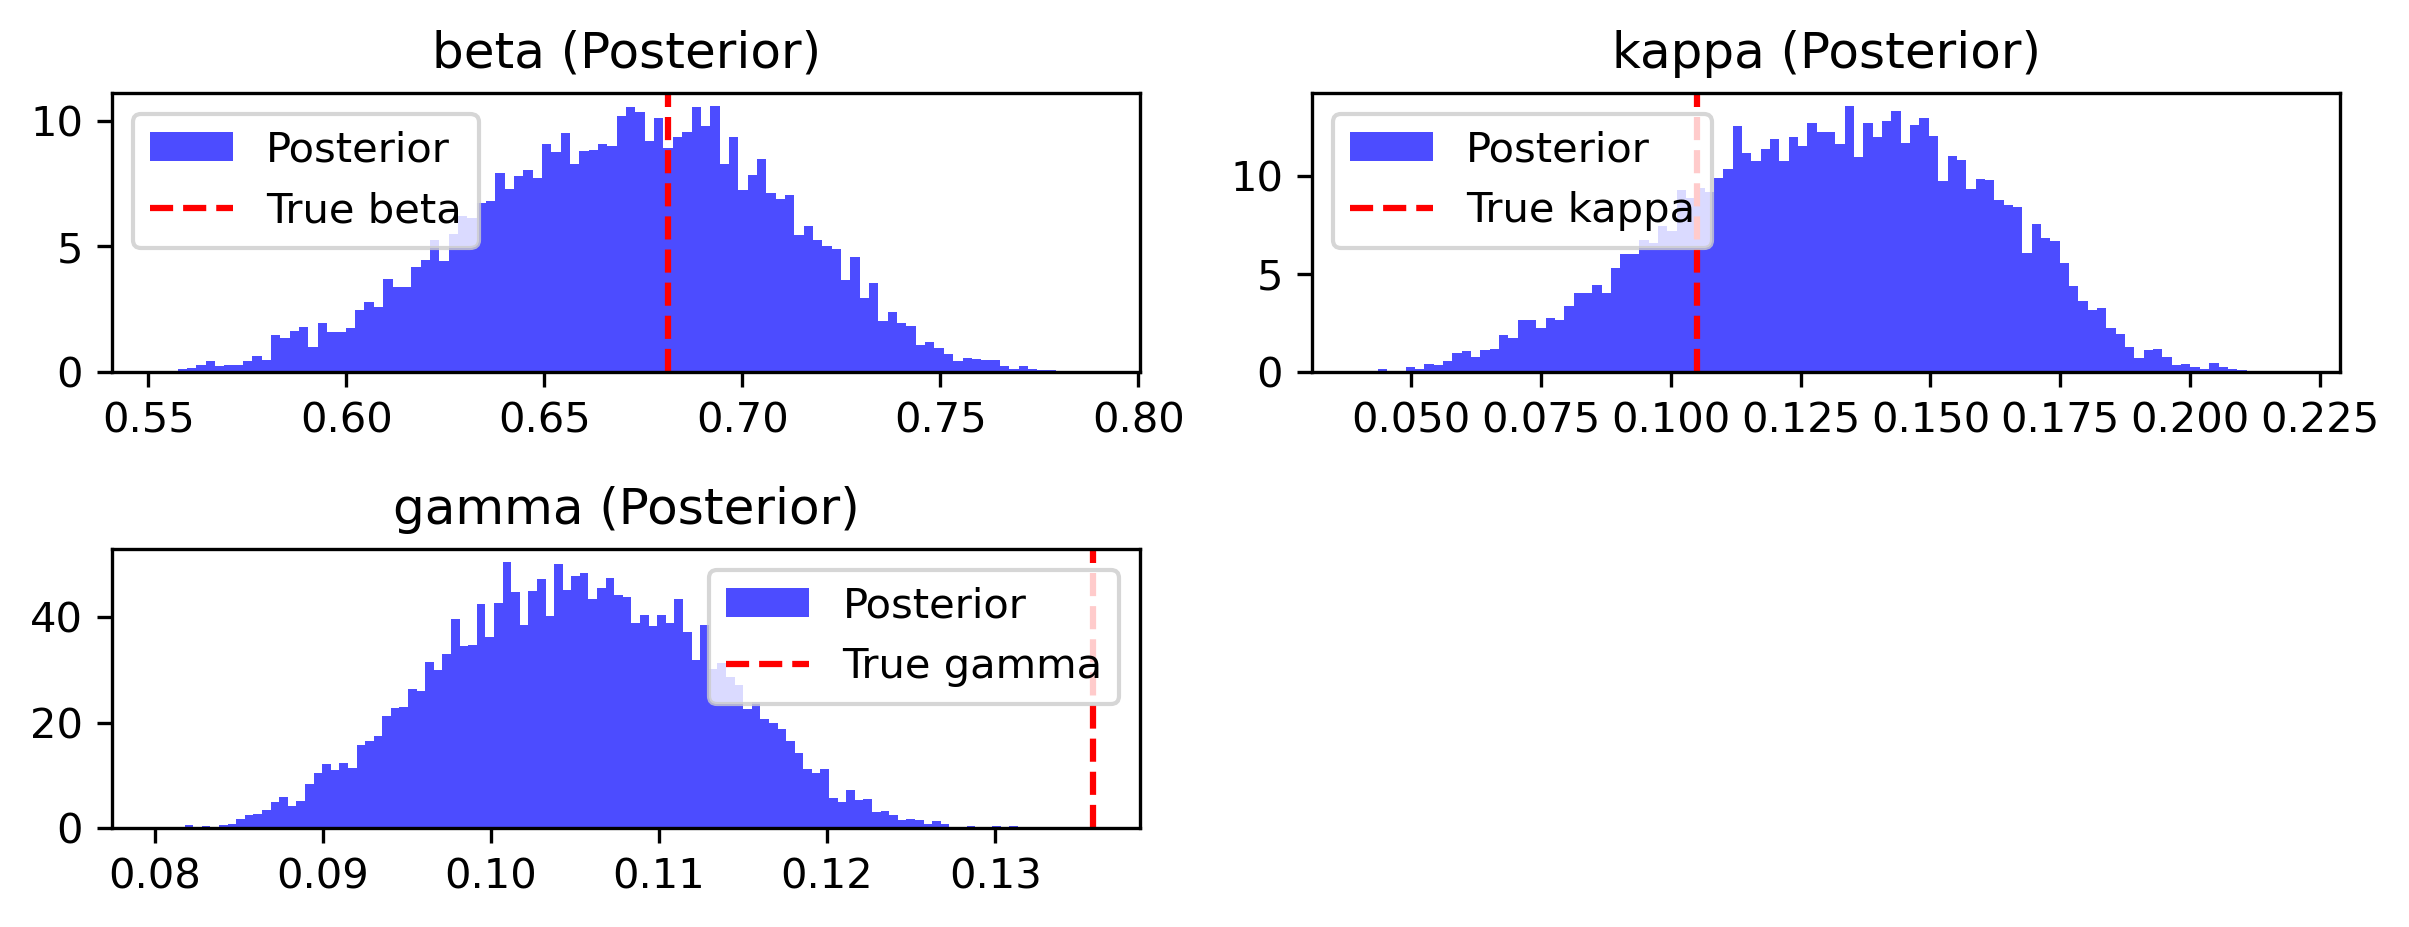

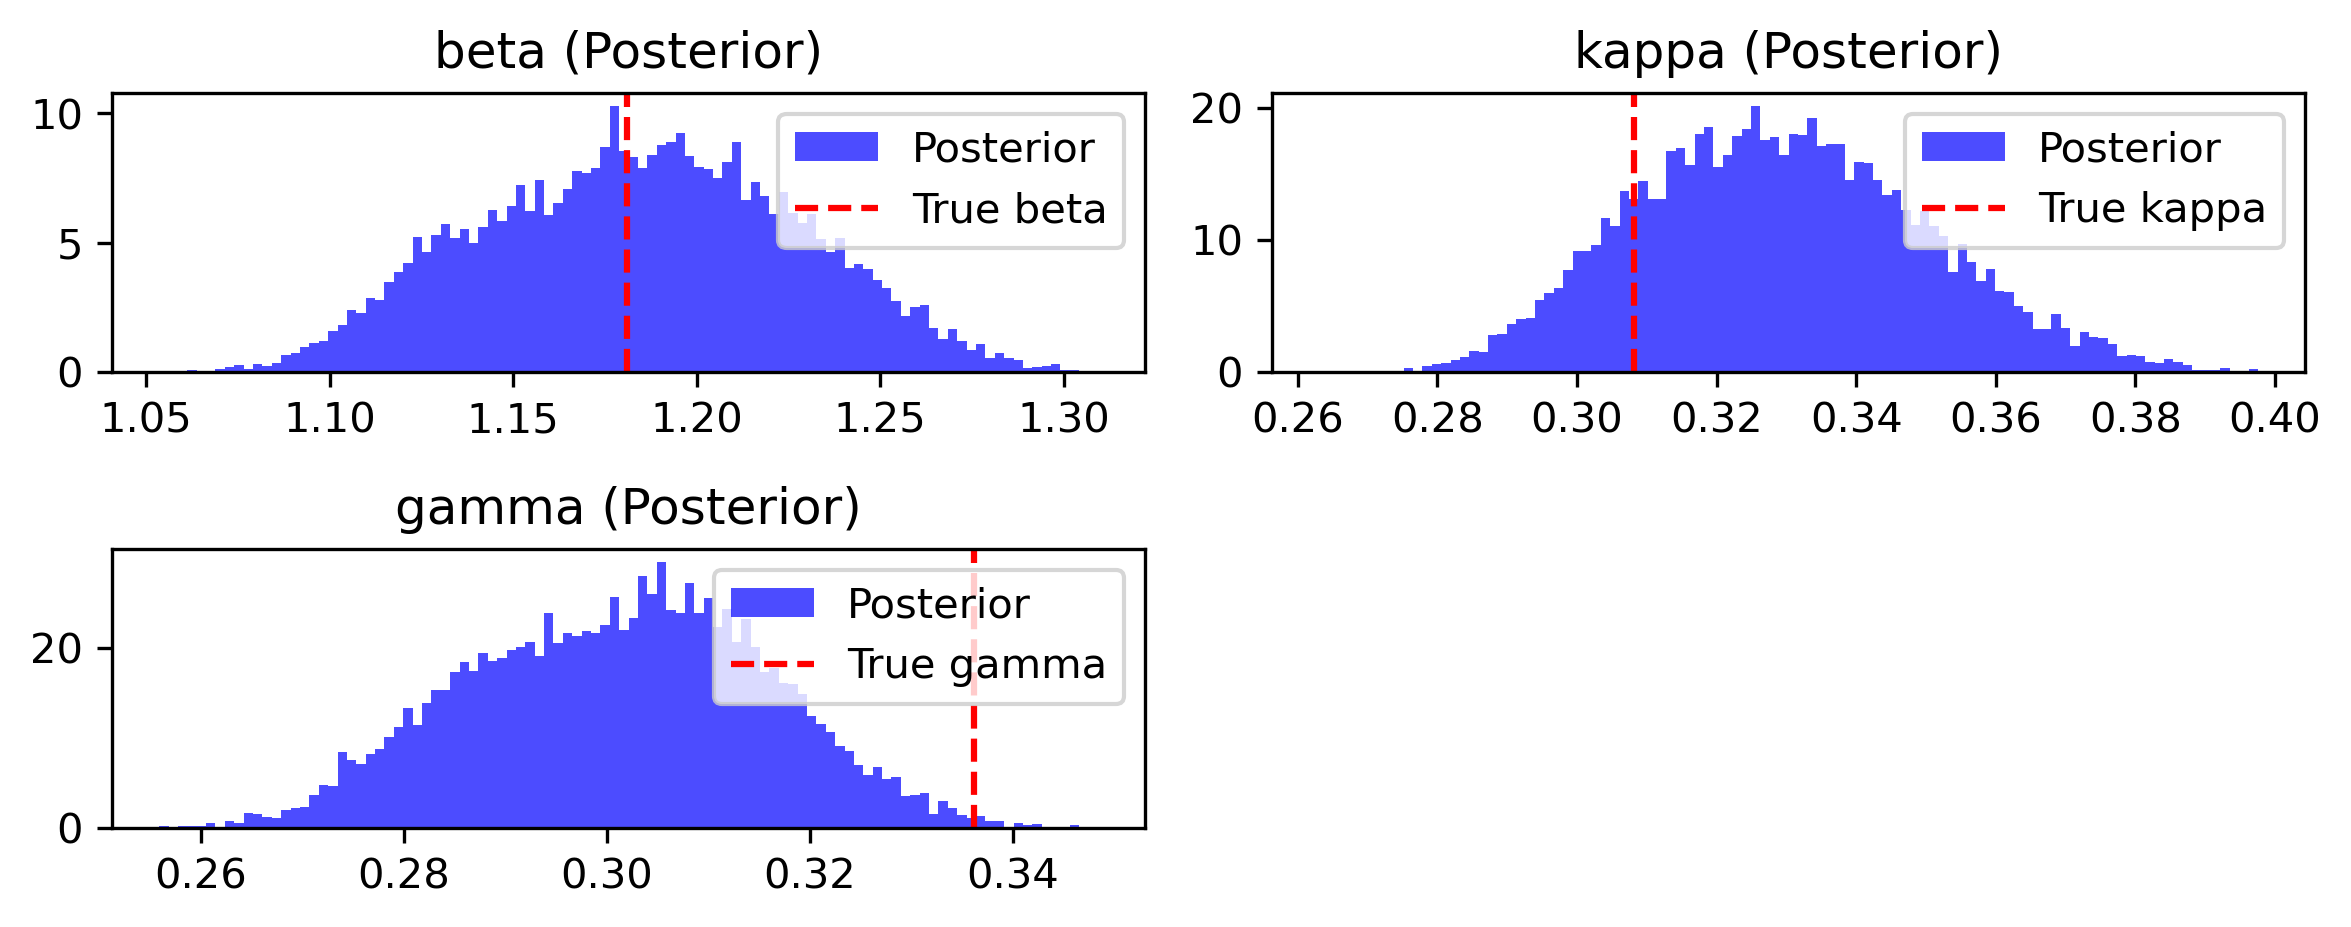

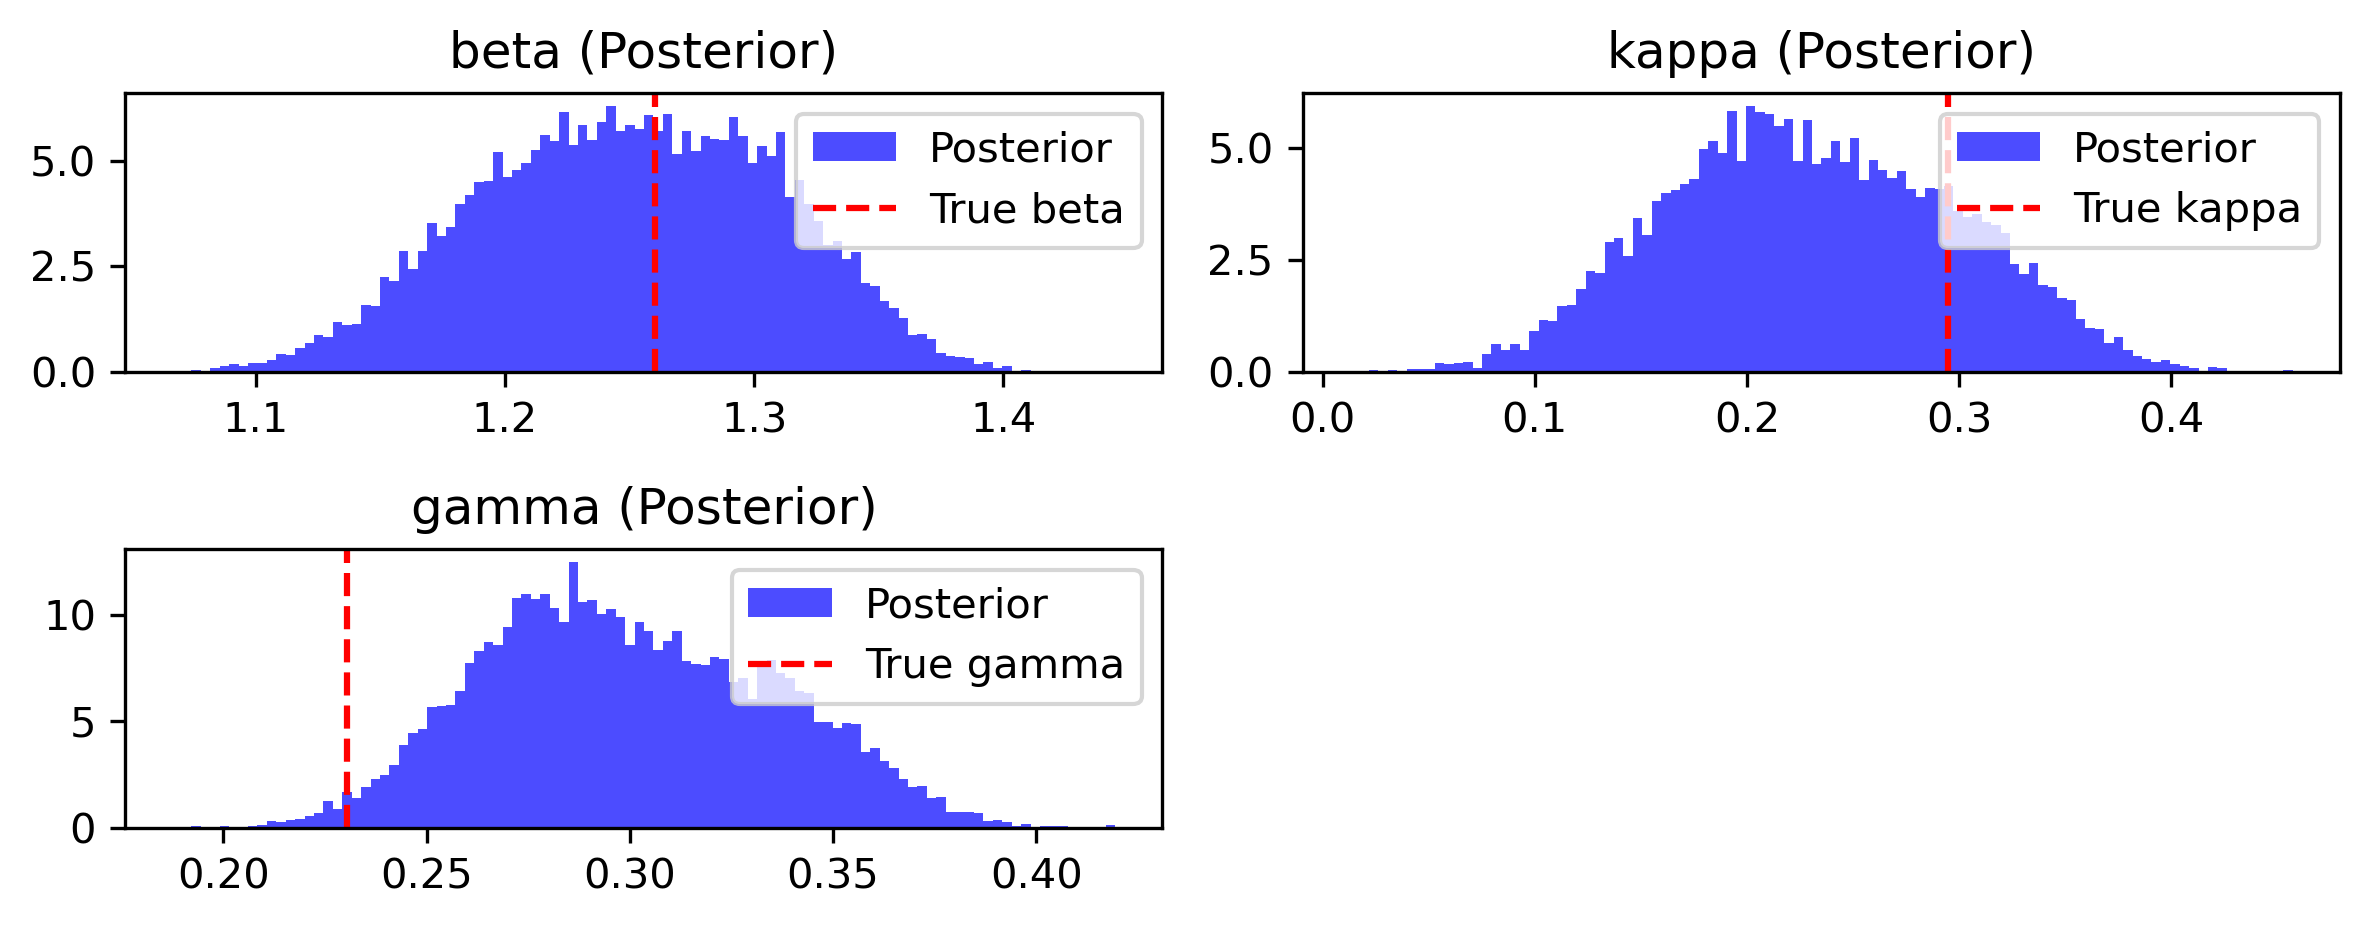

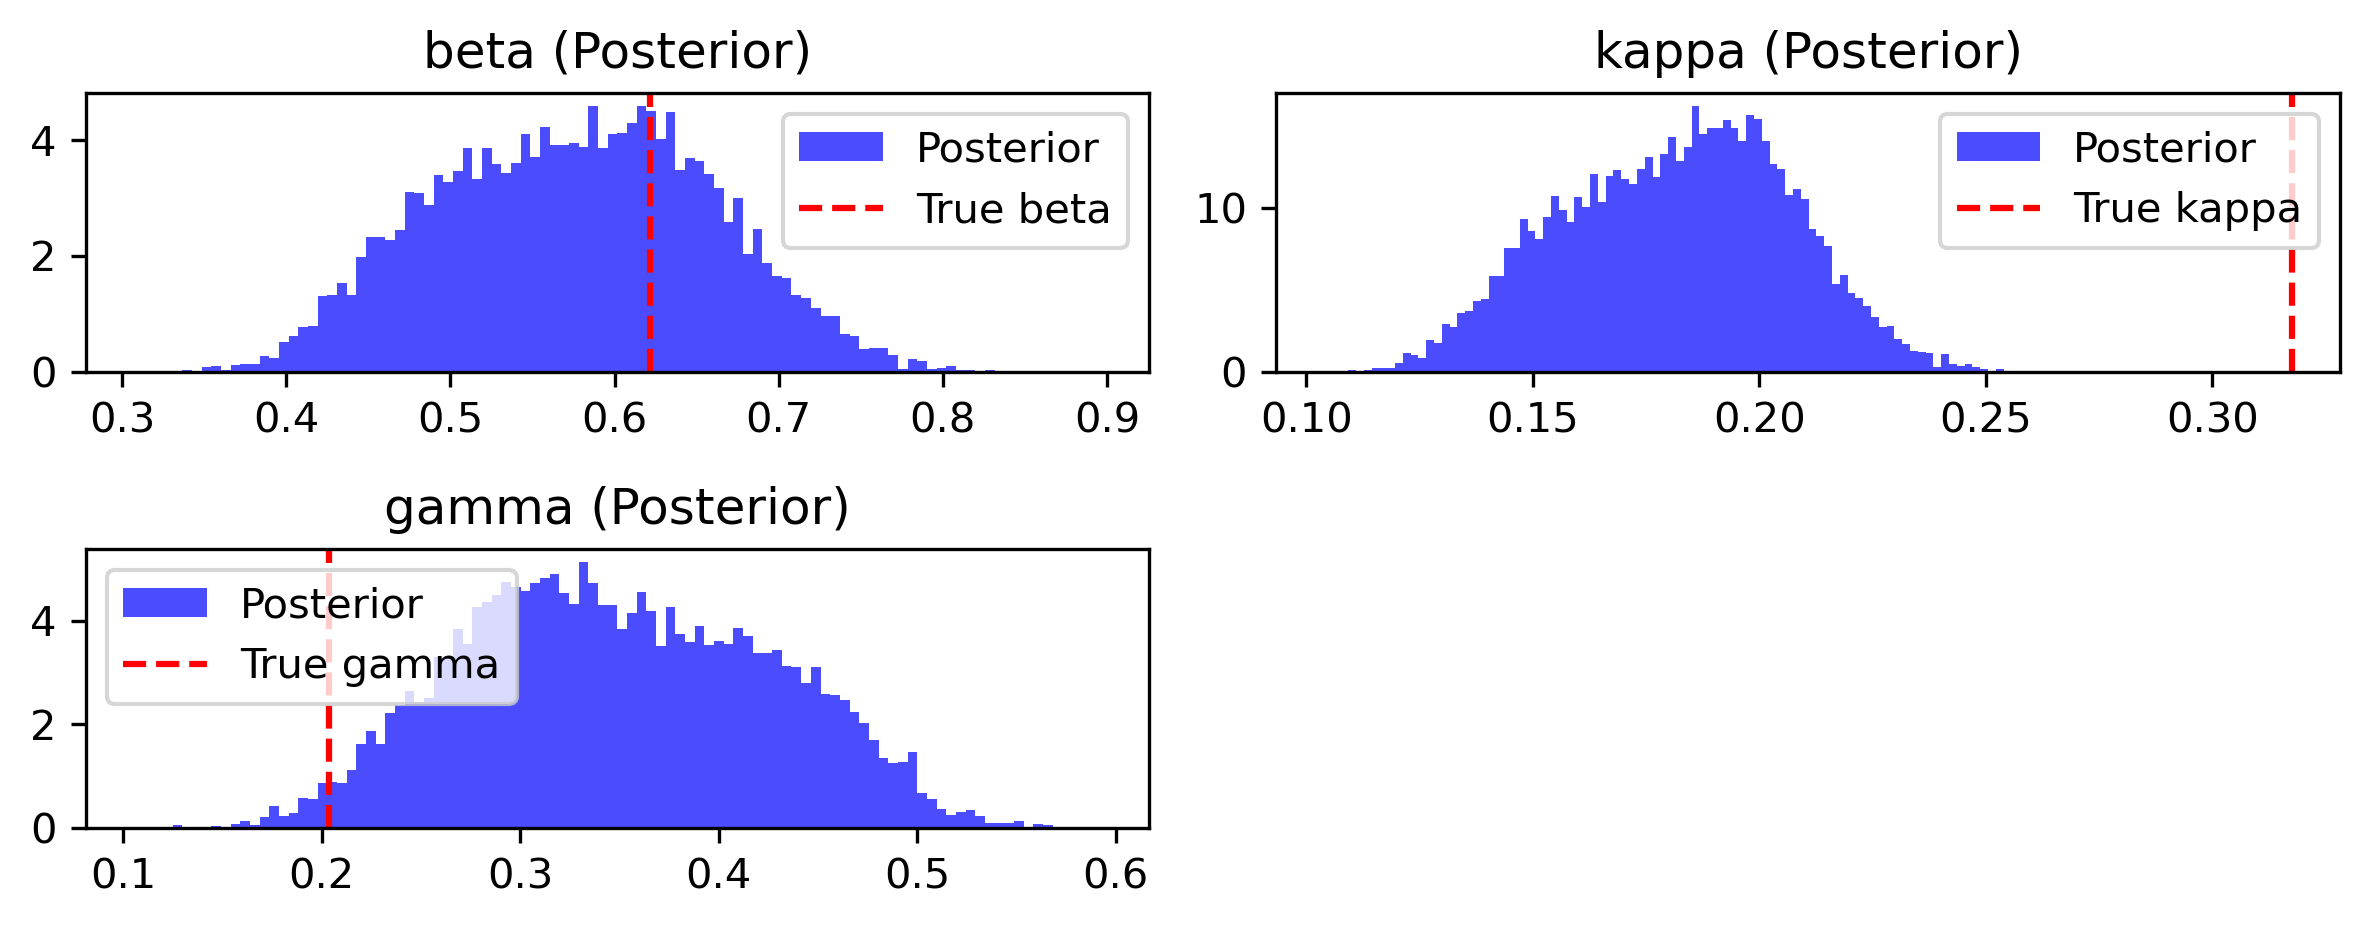

In [15]:
for k in range(10):
    samples = results_10k[k]
    true_values = true_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [16]:
results_100k = []

for i in range(10):
    start_time = time.time()
    abc_samples_100k = engine.run_abc(
        obs_data=true_dataset[i]['poisson'],
        prior=pyabc_prior,
        simulator_func=simulator,
        num_simulations=100000,
        population_size=1000,
        num_samples=10000
    )
    end_time = time.time()
    results_100k.append(abc_samples_100k)
    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-02-05 12:33:48>
ABC INFO: Calibration sample t = -1.


[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.21549880e+04.
ABC INFO: Accepted: 1000 / 4709 = 2.1236e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.58959134e+03.
ABC INFO: Accepted: 1000 / 4868 = 2.0542e-01, ESS: 9.2735e+02.
ABC INFO: t: 2, eps: 1.60889582e+03.
ABC INFO: Accepted: 1000 / 7633 = 1.3101e-01, ESS: 8.7620e+02.
ABC INFO: t: 3, eps: 8.21011015e+02.
ABC INFO: Accepted: 1000 / 10997 = 9.0934e-02, ESS: 5.4629e+02.
ABC INFO: t: 4, eps: 5.37649047e+02.
ABC INFO: Accepted: 1000 / 12264 = 8.1539e-02, ESS: 8.3588e+02.
ABC INFO: t: 5, eps: 4.32087447e+02.
ABC INFO: Accepted: 1000 / 16391 = 6.1009e-02, ESS: 7.8509e+02.
ABC INFO: t: 6, eps: 3.78315959e+02.
ABC INFO: Accepted: 1000 / 34496 = 2.8989e-02, ESS: 4.3766e+02.
ABC INFO: t: 7, eps: 3.44455274e+02.
ABC INFO: Accepted: 1000 / 121088 = 8.2585e-03, ESS: 4.2962e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:43.120749, end_time=2026-02-05 12:34:31>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC

[0] Done in 43.16 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.36894149e+04.
ABC INFO: Accepted: 1000 / 4587 = 2.1801e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.59368196e+03.
ABC INFO: Accepted: 1000 / 4773 = 2.0951e-01, ESS: 8.9965e+02.
ABC INFO: t: 2, eps: 1.50542580e+03.
ABC INFO: Accepted: 1000 / 5915 = 1.6906e-01, ESS: 9.0834e+02.
ABC INFO: t: 3, eps: 9.10059398e+02.
ABC INFO: Accepted: 1000 / 8917 = 1.1215e-01, ESS: 8.6124e+02.
ABC INFO: t: 4, eps: 6.45061516e+02.
ABC INFO: Accepted: 1000 / 12148 = 8.2318e-02, ESS: 9.1727e+02.
ABC INFO: t: 5, eps: 5.23860236e+02.
ABC INFO: Accepted: 1000 / 8542 = 1.1707e-01, ESS: 8.9289e+02.
ABC INFO: t: 6, eps: 4.53795554e+02.
ABC INFO: Accepted: 1000 / 11021 = 9.0736e-02, ESS: 7.1374e+02.
ABC INFO: t: 7, eps: 4.06699780e+02.
ABC INFO: Accepted: 1000 / 28307 = 3.5327e-02, ESS: 2.9508e+02.
ABC INFO: t: 8, eps: 3.77603909e+02.
ABC INFO: Accepted: 1000 / 73373 = 1.3629e-02, ESS: 6.3183e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:38.

[1] Done in 38.09 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.47068067e+04.
ABC INFO: Accepted: 1000 / 4354 = 2.2967e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.78812579e+03.
ABC INFO: Accepted: 1000 / 5220 = 1.9157e-01, ESS: 9.1397e+02.
ABC INFO: t: 2, eps: 1.63351165e+03.
ABC INFO: Accepted: 1000 / 5503 = 1.8172e-01, ESS: 8.8796e+02.
ABC INFO: t: 3, eps: 8.76162616e+02.
ABC INFO: Accepted: 1000 / 9464 = 1.0566e-01, ESS: 8.6141e+02.
ABC INFO: t: 4, eps: 6.09925829e+02.
ABC INFO: Accepted: 1000 / 11567 = 8.6453e-02, ESS: 8.6465e+02.
ABC INFO: t: 5, eps: 4.94453756e+02.
ABC INFO: Accepted: 1000 / 13854 = 7.2181e-02, ESS: 7.9119e+02.
ABC INFO: t: 6, eps: 4.33482246e+02.
ABC INFO: Accepted: 1000 / 18676 = 5.3545e-02, ESS: 7.1230e+02.
ABC INFO: t: 7, eps: 3.95325322e+02.
ABC INFO: Accepted: 1000 / 32817 = 3.0472e-02, ESS: 7.2241e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:29.818716, end_time=2026-02-05 12:35:39>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.H

[2] Done in 29.86 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.28059803e+04.
ABC INFO: Accepted: 1000 / 5027 = 1.9893e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.28904960e+03.
ABC INFO: Accepted: 1000 / 4734 = 2.1124e-01, ESS: 9.3029e+02.
ABC INFO: t: 2, eps: 1.34690246e+03.
ABC INFO: Accepted: 1000 / 7781 = 1.2852e-01, ESS: 9.2064e+02.
ABC INFO: t: 3, eps: 8.21283695e+02.
ABC INFO: Accepted: 1000 / 9726 = 1.0282e-01, ESS: 8.7283e+02.
ABC INFO: t: 4, eps: 5.82828205e+02.
ABC INFO: Accepted: 1000 / 11227 = 8.9071e-02, ESS: 8.6354e+02.
ABC INFO: t: 5, eps: 4.84973551e+02.
ABC INFO: Accepted: 1000 / 13798 = 7.2474e-02, ESS: 7.4665e+02.
ABC INFO: t: 6, eps: 4.34342580e+02.
ABC INFO: Accepted: 1000 / 31357 = 3.1891e-02, ESS: 6.4420e+02.
ABC INFO: t: 7, eps: 3.96832014e+02.
ABC INFO: Accepted: 1000 / 97229 = 1.0285e-02, ESS: 5.0580e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:40.068094, end_time=2026-02-05 12:36:19>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.H

[3] Done in 40.11 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.31555594e+04.
ABC INFO: Accepted: 1000 / 4583 = 2.1820e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 4.12813985e+03.
ABC INFO: Accepted: 1000 / 5441 = 1.8379e-01, ESS: 9.3586e+02.
ABC INFO: t: 2, eps: 1.81963068e+03.
ABC INFO: Accepted: 1000 / 8406 = 1.1896e-01, ESS: 8.7025e+02.
ABC INFO: t: 3, eps: 1.05720934e+03.
ABC INFO: Accepted: 1000 / 15126 = 6.6111e-02, ESS: 8.6824e+02.
ABC INFO: t: 4, eps: 7.09680063e+02.
ABC INFO: Accepted: 1000 / 19869 = 5.0330e-02, ESS: 9.1675e+02.
ABC INFO: t: 5, eps: 5.33247652e+02.
ABC INFO: Accepted: 1000 / 6035 = 1.6570e-01, ESS: 9.0900e+02.
ABC INFO: t: 6, eps: 4.53776971e+02.
ABC INFO: Accepted: 1000 / 7541 = 1.3261e-01, ESS: 8.9314e+02.
ABC INFO: t: 7, eps: 4.10971081e+02.
ABC INFO: Accepted: 1000 / 15833 = 6.3159e-02, ESS: 6.6133e+02.
ABC INFO: t: 8, eps: 3.82020524e+02.
ABC INFO: Accepted: 1000 / 45535 = 2.1961e-02, ESS: 3.8517e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:32.

[4] Done in 32.85 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.20001132e+04.
ABC INFO: Accepted: 1000 / 4953 = 2.0190e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.63934120e+03.
ABC INFO: Accepted: 1000 / 5246 = 1.9062e-01, ESS: 9.3936e+02.
ABC INFO: t: 2, eps: 1.51294281e+03.
ABC INFO: Accepted: 1000 / 9282 = 1.0774e-01, ESS: 8.2246e+02.
ABC INFO: t: 3, eps: 8.91152066e+02.
ABC INFO: Accepted: 1000 / 18192 = 5.4969e-02, ESS: 8.5304e+02.
ABC INFO: t: 4, eps: 6.00278834e+02.
ABC INFO: Accepted: 1000 / 7736 = 1.2927e-01, ESS: 9.6664e+02.
ABC INFO: t: 5, eps: 4.77406413e+02.
ABC INFO: Accepted: 1000 / 6087 = 1.6428e-01, ESS: 9.3064e+02.
ABC INFO: t: 6, eps: 4.15039435e+02.
ABC INFO: Accepted: 1000 / 7129 = 1.4027e-01, ESS: 8.0296e+02.
ABC INFO: t: 7, eps: 3.77478669e+02.
ABC INFO: Accepted: 1000 / 15117 = 6.6151e-02, ESS: 7.2521e+02.
ABC INFO: t: 8, eps: 3.50333117e+02.
ABC INFO: Accepted: 1000 / 40617 = 2.4620e-02, ESS: 5.6979e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:31.9

[5] Done in 32.01 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.23110139e+04.
ABC INFO: Accepted: 1000 / 4720 = 2.1186e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.95054940e+03.
ABC INFO: Accepted: 1000 / 5214 = 1.9179e-01, ESS: 9.1651e+02.
ABC INFO: t: 2, eps: 1.80295691e+03.
ABC INFO: Accepted: 1000 / 8830 = 1.1325e-01, ESS: 8.6725e+02.
ABC INFO: t: 3, eps: 1.05561771e+03.
ABC INFO: Accepted: 1000 / 18210 = 5.4915e-02, ESS: 9.0332e+02.
ABC INFO: t: 4, eps: 7.07757492e+02.
ABC INFO: Accepted: 1000 / 22095 = 4.5259e-02, ESS: 9.2726e+02.
ABC INFO: t: 5, eps: 5.28505699e+02.
ABC INFO: Accepted: 1000 / 5665 = 1.7652e-01, ESS: 9.5209e+02.
ABC INFO: t: 6, eps: 4.46168651e+02.
ABC INFO: Accepted: 1000 / 6257 = 1.5982e-01, ESS: 8.8365e+02.
ABC INFO: t: 7, eps: 4.02759463e+02.
ABC INFO: Accepted: 1000 / 13457 = 7.4311e-02, ESS: 6.6149e+02.
ABC INFO: t: 8, eps: 3.72710530e+02.
ABC INFO: Accepted: 1000 / 39174 = 2.5527e-02, ESS: 6.9902e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:32.

[6] Done in 32.46 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.38718558e+04.
ABC INFO: Accepted: 1000 / 5456 = 1.8328e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.01892443e+03.
ABC INFO: Accepted: 1000 / 5133 = 1.9482e-01, ESS: 9.0755e+02.
ABC INFO: t: 2, eps: 1.25690130e+03.
ABC INFO: Accepted: 1000 / 5022 = 1.9912e-01, ESS: 9.2453e+02.
ABC INFO: t: 3, eps: 7.79319717e+02.
ABC INFO: Accepted: 1000 / 6832 = 1.4637e-01, ESS: 8.7090e+02.
ABC INFO: t: 4, eps: 5.81133991e+02.
ABC INFO: Accepted: 1000 / 9254 = 1.0806e-01, ESS: 8.6129e+02.
ABC INFO: t: 5, eps: 4.87269340e+02.
ABC INFO: Accepted: 1000 / 9219 = 1.0847e-01, ESS: 8.4241e+02.
ABC INFO: t: 6, eps: 4.25592228e+02.
ABC INFO: Accepted: 1000 / 15528 = 6.4400e-02, ESS: 4.6364e+02.
ABC INFO: t: 7, eps: 3.81775300e+02.
ABC INFO: Accepted: 1000 / 51922 = 1.9260e-02, ESS: 4.3152e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:31.128590, end_time=2026-02-05 12:38:27>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.His

[7] Done in 31.17 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.79879275e+04.
ABC INFO: Accepted: 1000 / 4855 = 2.0597e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 4.22570215e+03.
ABC INFO: Accepted: 1000 / 5063 = 1.9751e-01, ESS: 9.4053e+02.
ABC INFO: t: 2, eps: 1.44256632e+03.
ABC INFO: Accepted: 1000 / 4959 = 2.0165e-01, ESS: 9.3315e+02.
ABC INFO: t: 3, eps: 7.86191472e+02.
ABC INFO: Accepted: 1000 / 5339 = 1.8730e-01, ESS: 9.2434e+02.
ABC INFO: t: 4, eps: 5.65527874e+02.
ABC INFO: Accepted: 1000 / 6754 = 1.4806e-01, ESS: 9.3735e+02.
ABC INFO: t: 5, eps: 4.56170716e+02.
ABC INFO: Accepted: 1000 / 7423 = 1.3472e-01, ESS: 8.8333e+02.
ABC INFO: t: 6, eps: 3.93806994e+02.
ABC INFO: Accepted: 1000 / 15335 = 6.5210e-02, ESS: 7.5126e+02.
ABC INFO: t: 7, eps: 3.51048104e+02.
ABC INFO: Accepted: 1000 / 46827 = 2.1355e-02, ESS: 5.0376e+02.
ABC INFO: t: 8, eps: 3.17937866e+02.
ABC INFO: Accepted: 1000 / 162287 = 6.1619e-03, ESS: 4.2011e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:53.

[8] Done in 53.83 seconds
[*] Running SMC-ABC...


ABC INFO: t: 0, eps: 1.35272844e+04.
ABC INFO: Accepted: 1000 / 4691 = 2.1317e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.51971302e+03.
ABC INFO: Accepted: 1000 / 5377 = 1.8598e-01, ESS: 9.1205e+02.
ABC INFO: t: 2, eps: 1.67146483e+03.
ABC INFO: Accepted: 1000 / 7230 = 1.3831e-01, ESS: 8.9089e+02.
ABC INFO: t: 3, eps: 9.90691671e+02.
ABC INFO: Accepted: 1000 / 10182 = 9.8213e-02, ESS: 8.6312e+02.
ABC INFO: t: 4, eps: 6.63646943e+02.
ABC INFO: Accepted: 1000 / 11045 = 9.0539e-02, ESS: 8.3391e+02.
ABC INFO: t: 5, eps: 5.07702077e+02.
ABC INFO: Accepted: 1000 / 15383 = 6.5007e-02, ESS: 7.9637e+02.
ABC INFO: t: 6, eps: 4.47848992e+02.
ABC INFO: Accepted: 1000 / 25345 = 3.9456e-02, ESS: 7.2419e+02.
ABC INFO: t: 7, eps: 4.10138855e+02.
ABC INFO: Accepted: 1000 / 62590 = 1.5977e-02, ESS: 3.3278e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:34.270972, end_time=2026-02-05 12:39:55>


[9] Done in 34.31 seconds


In [17]:
with open("./results/Model1/ABC/M1_100k_posterior_samples.pkl", "wb") as f:
    pickle.dump(results_100k, f)

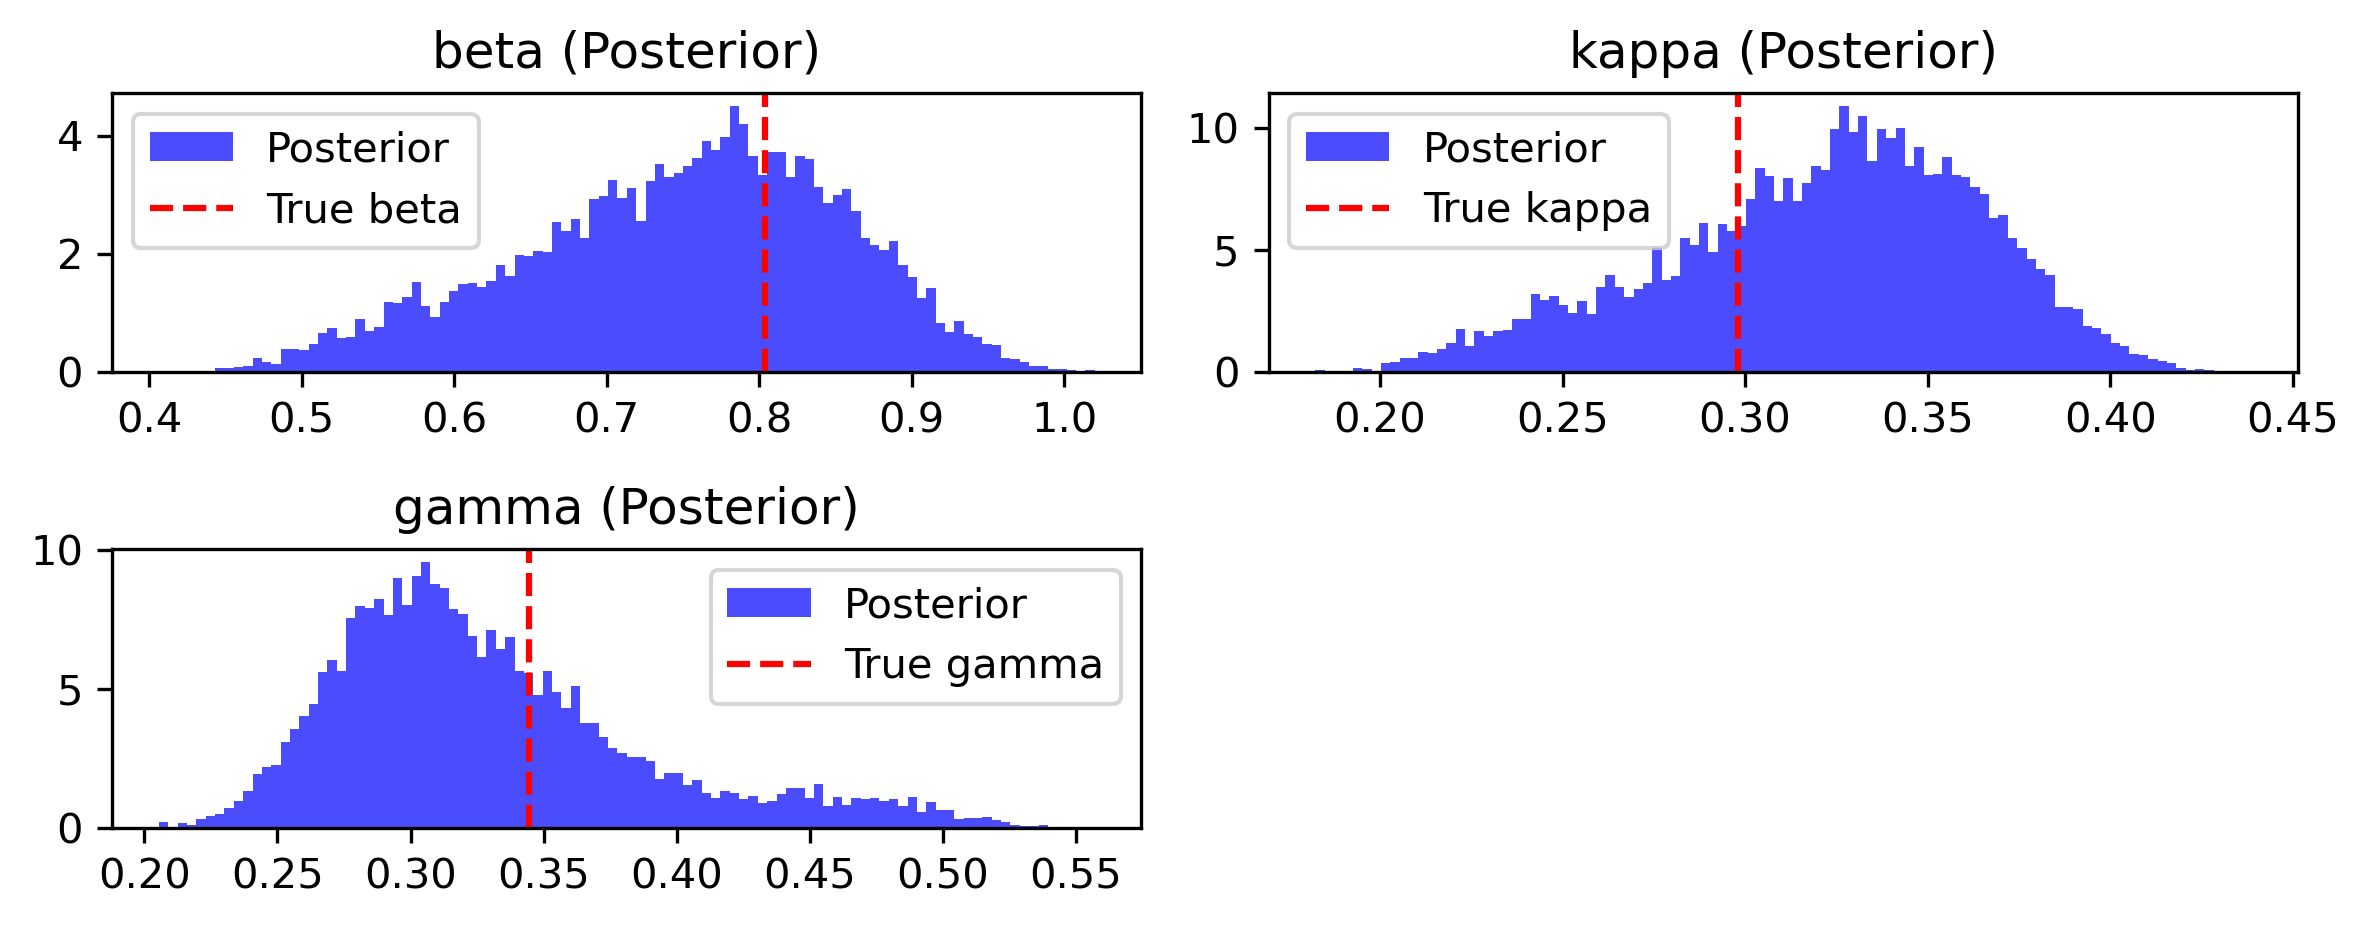

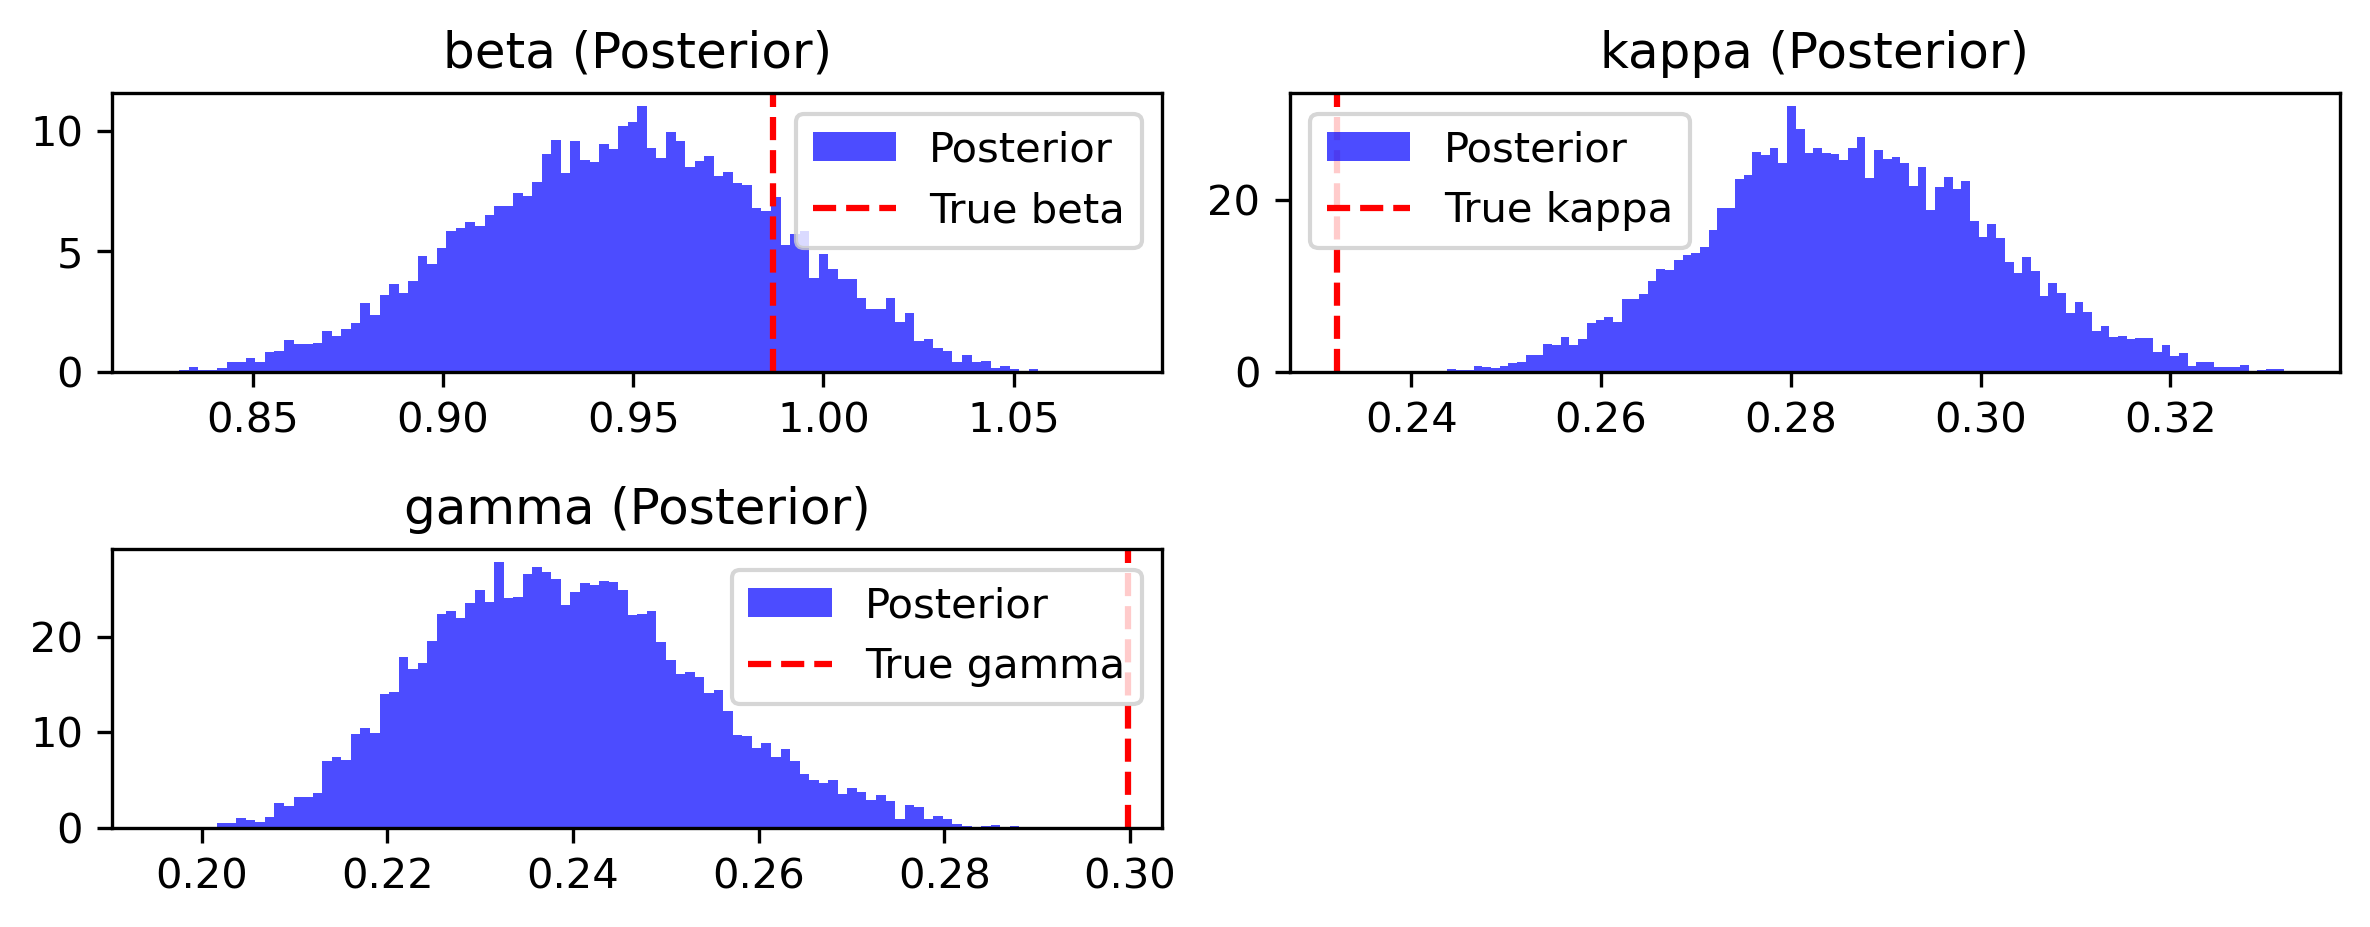

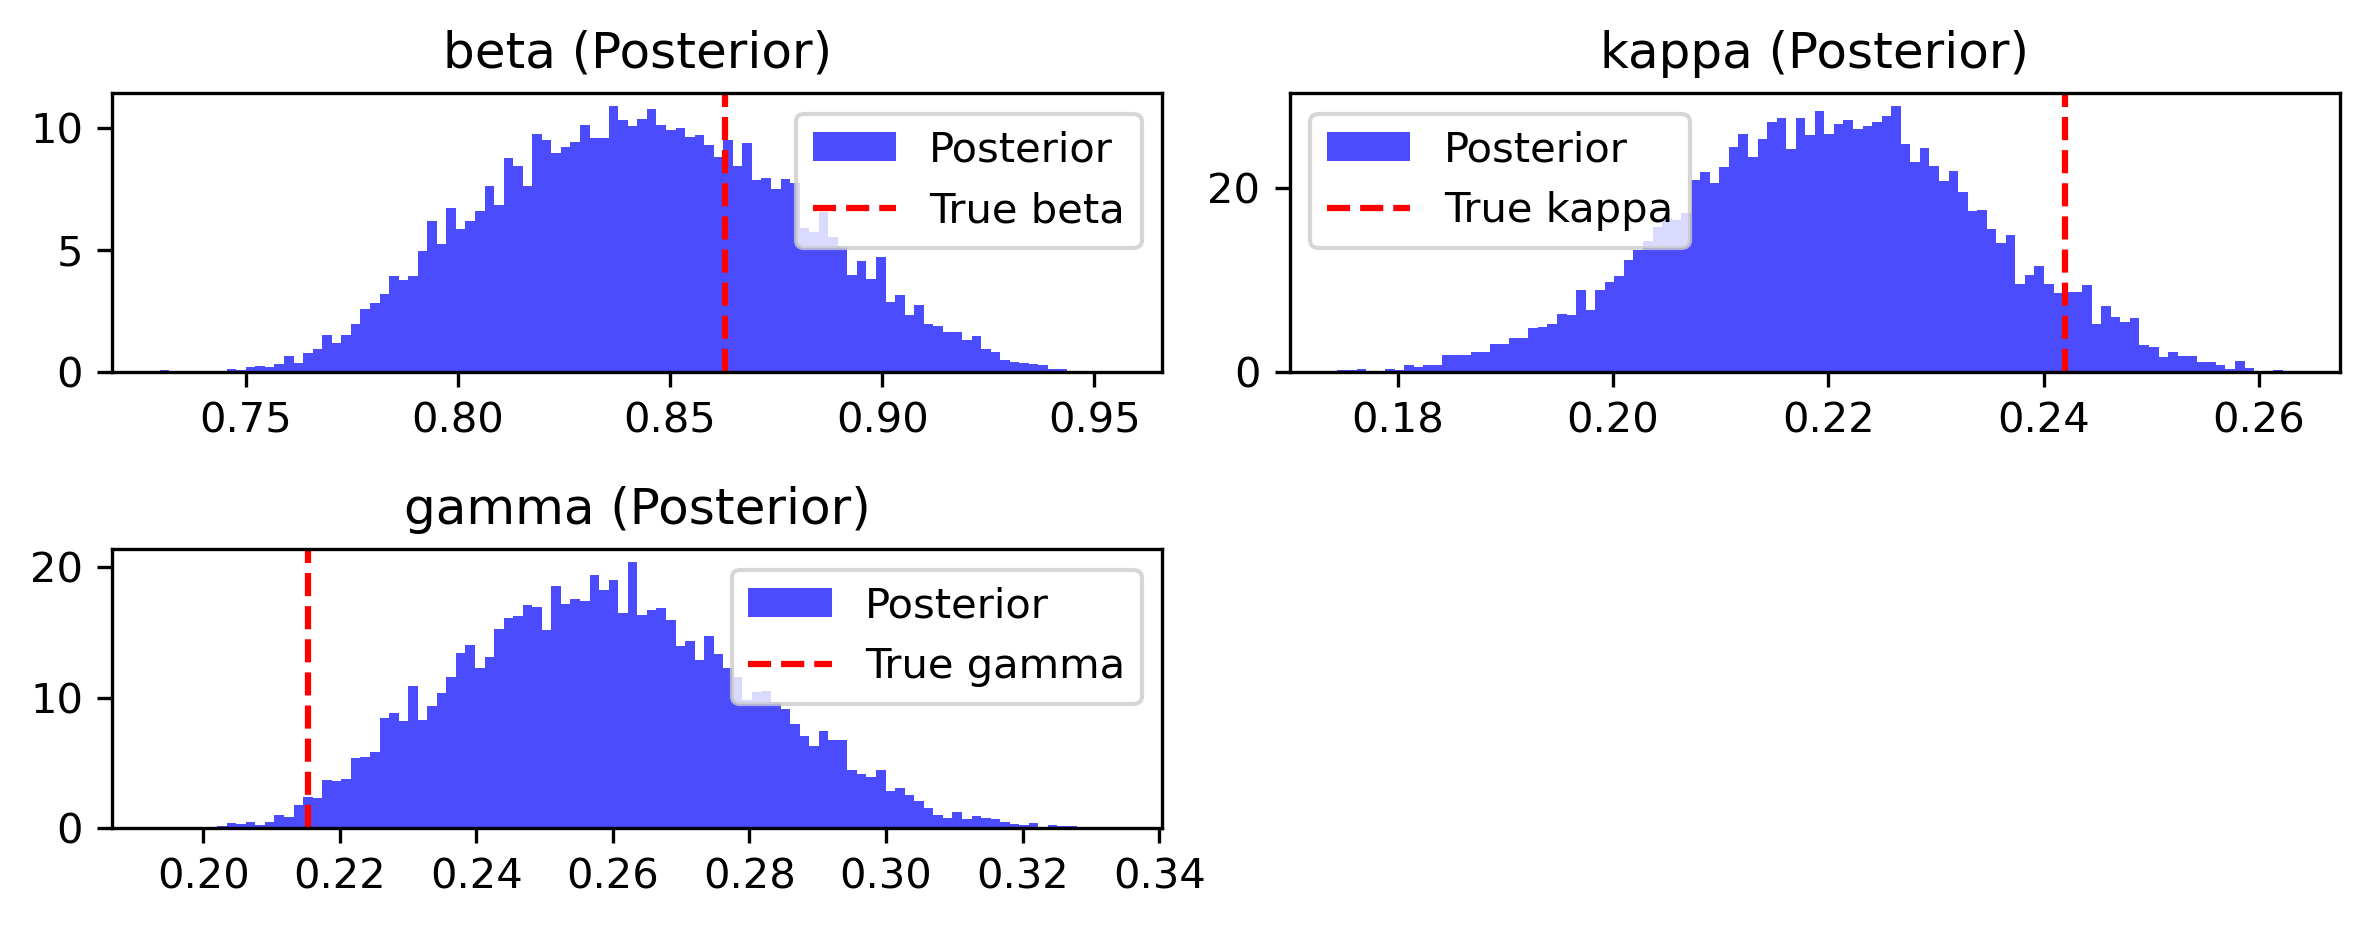

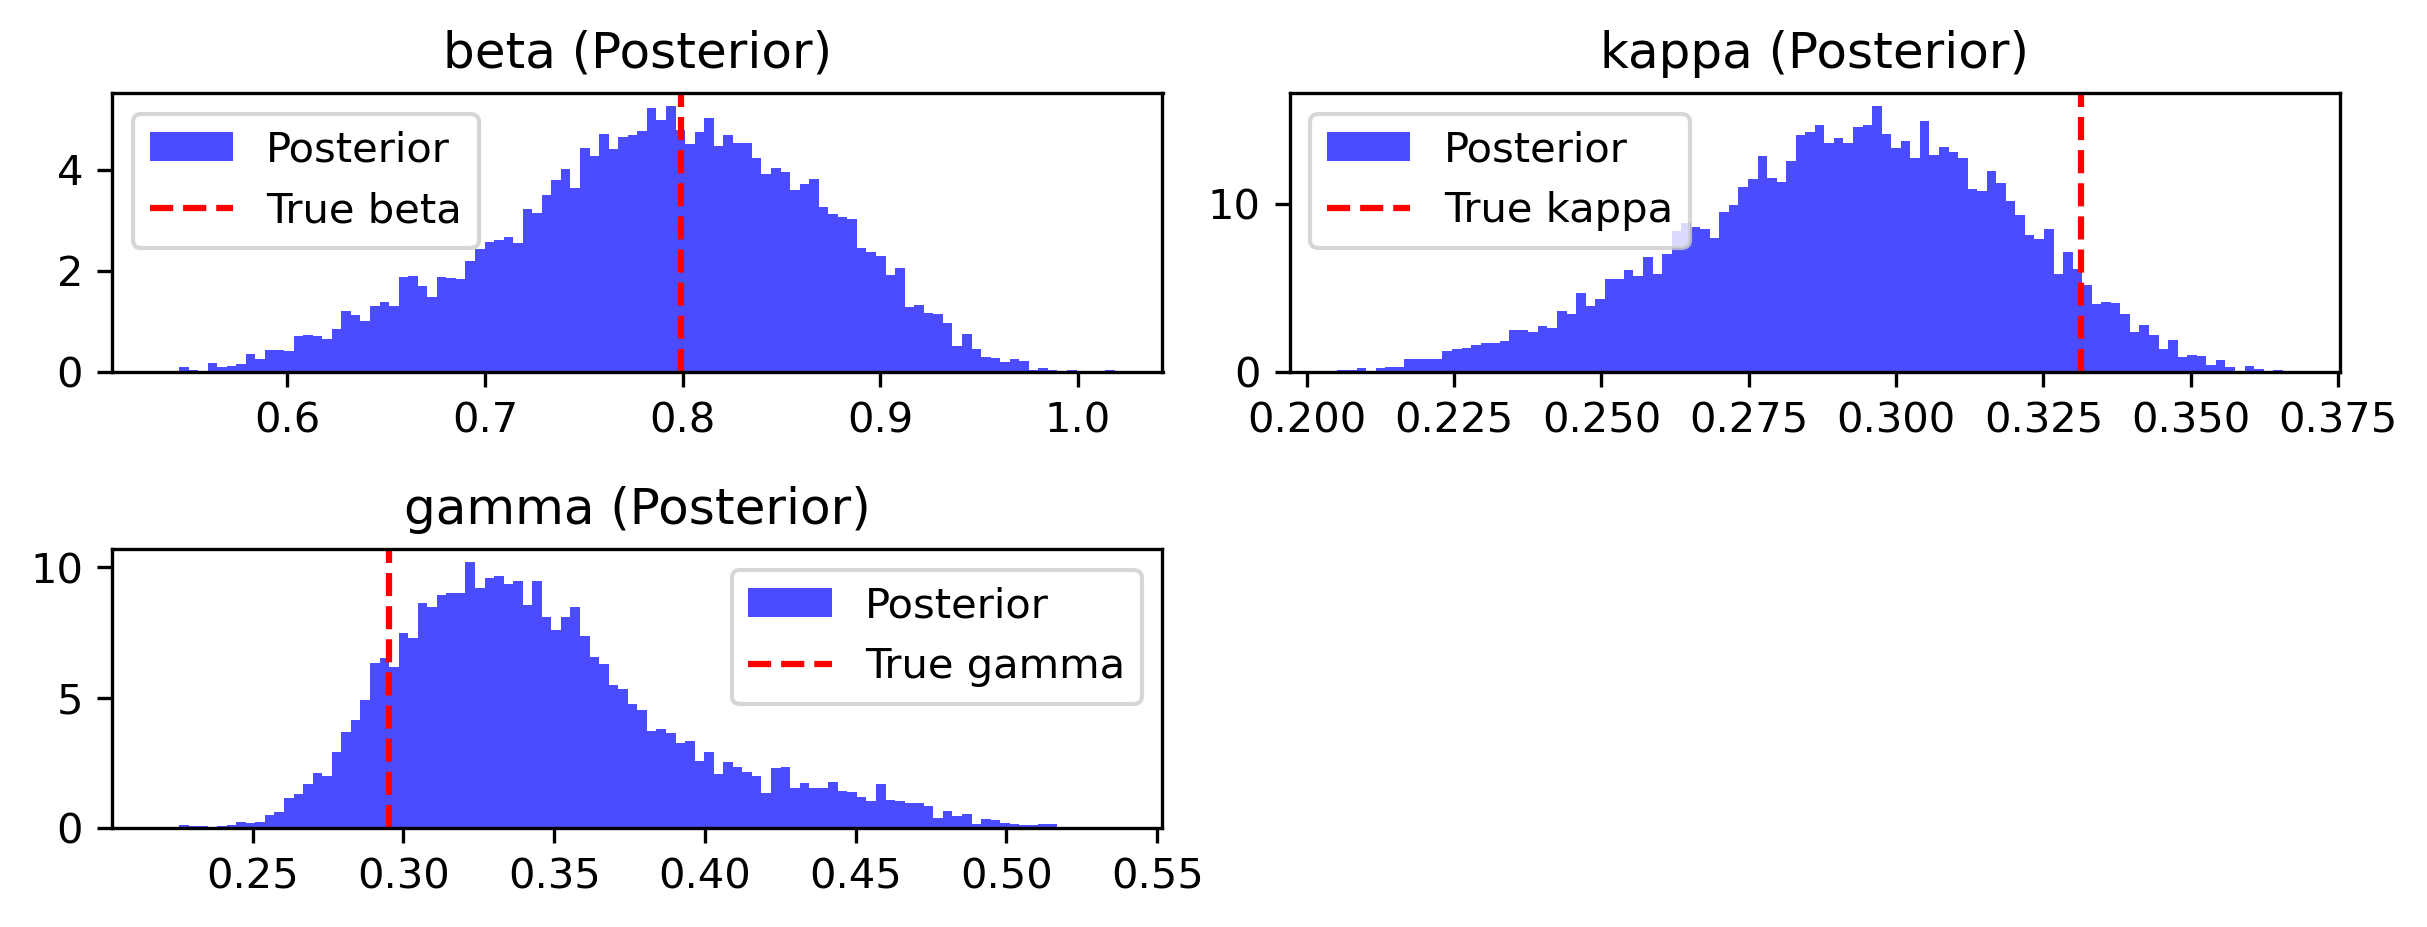

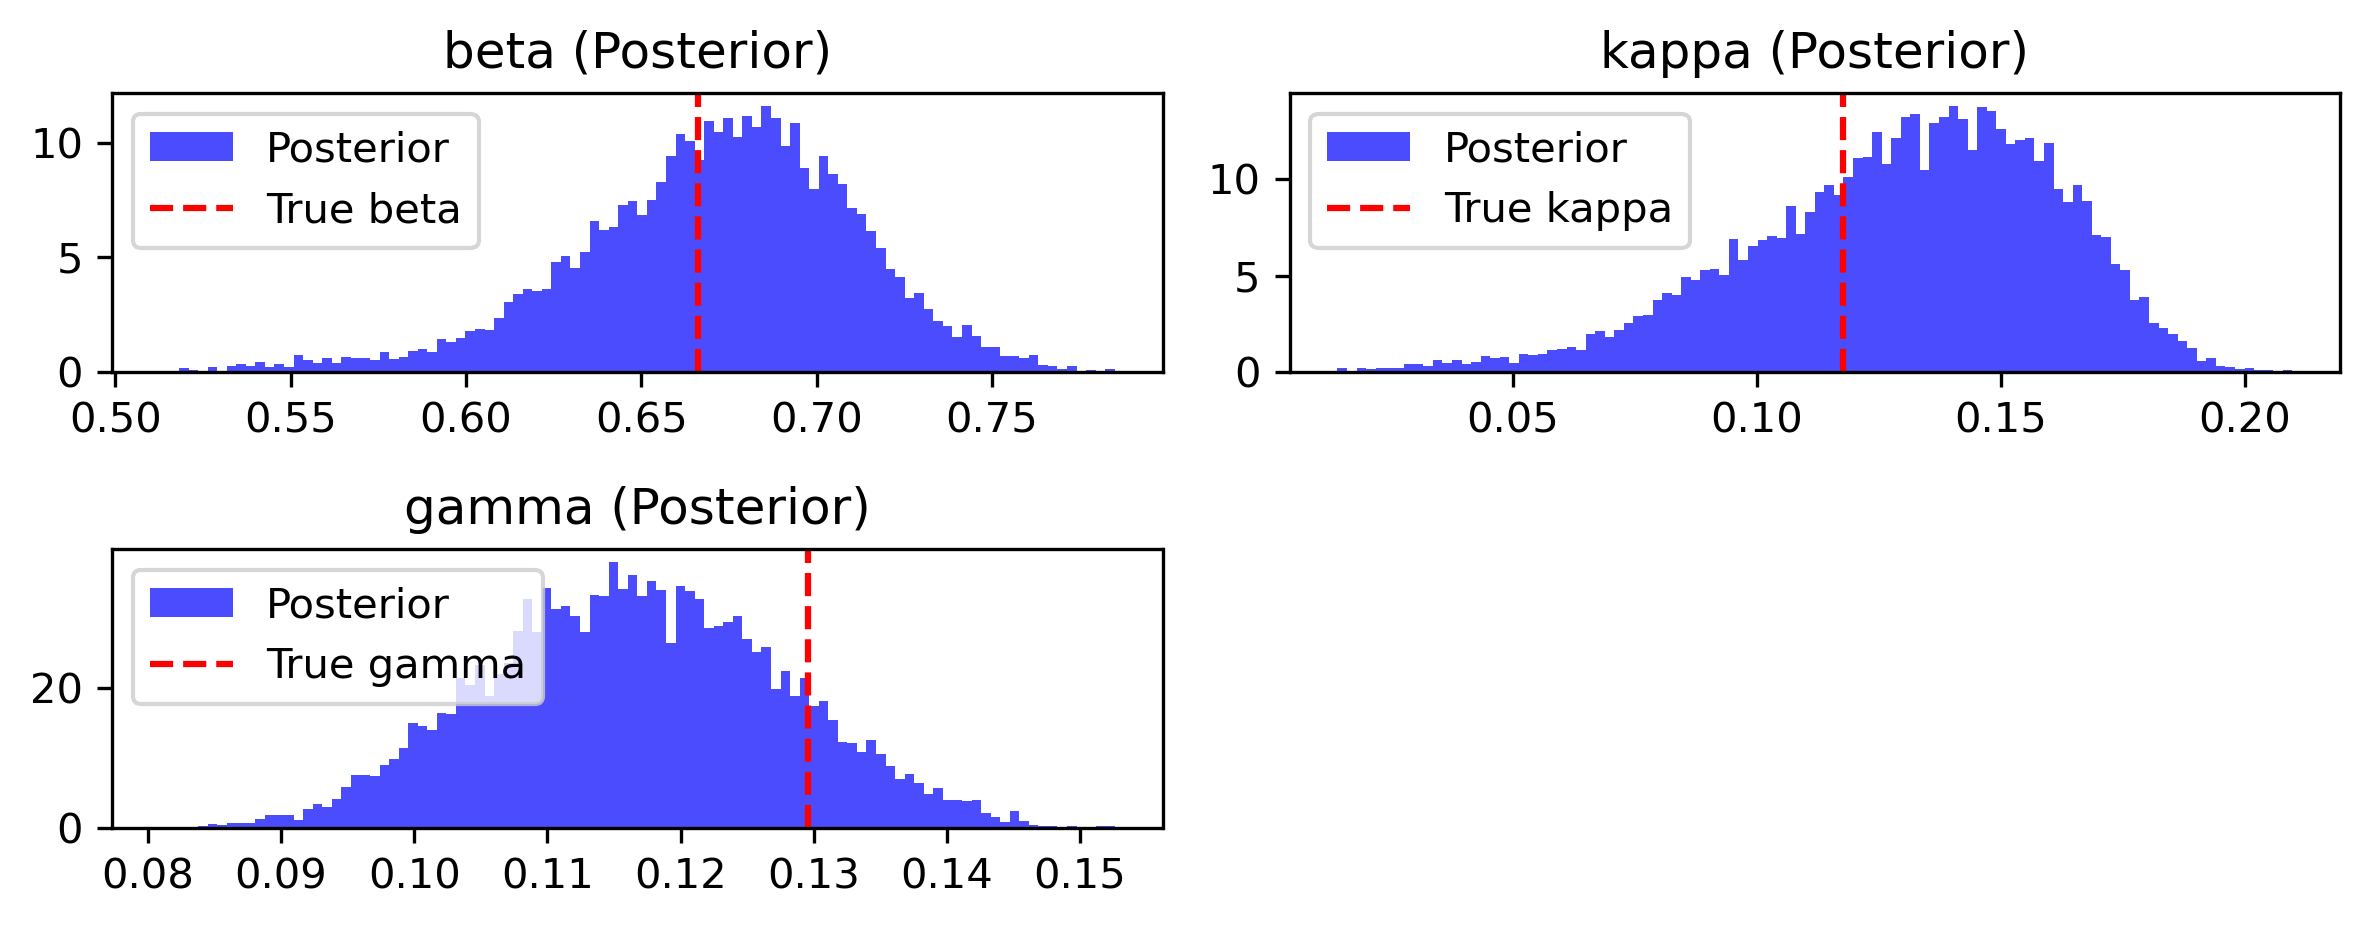

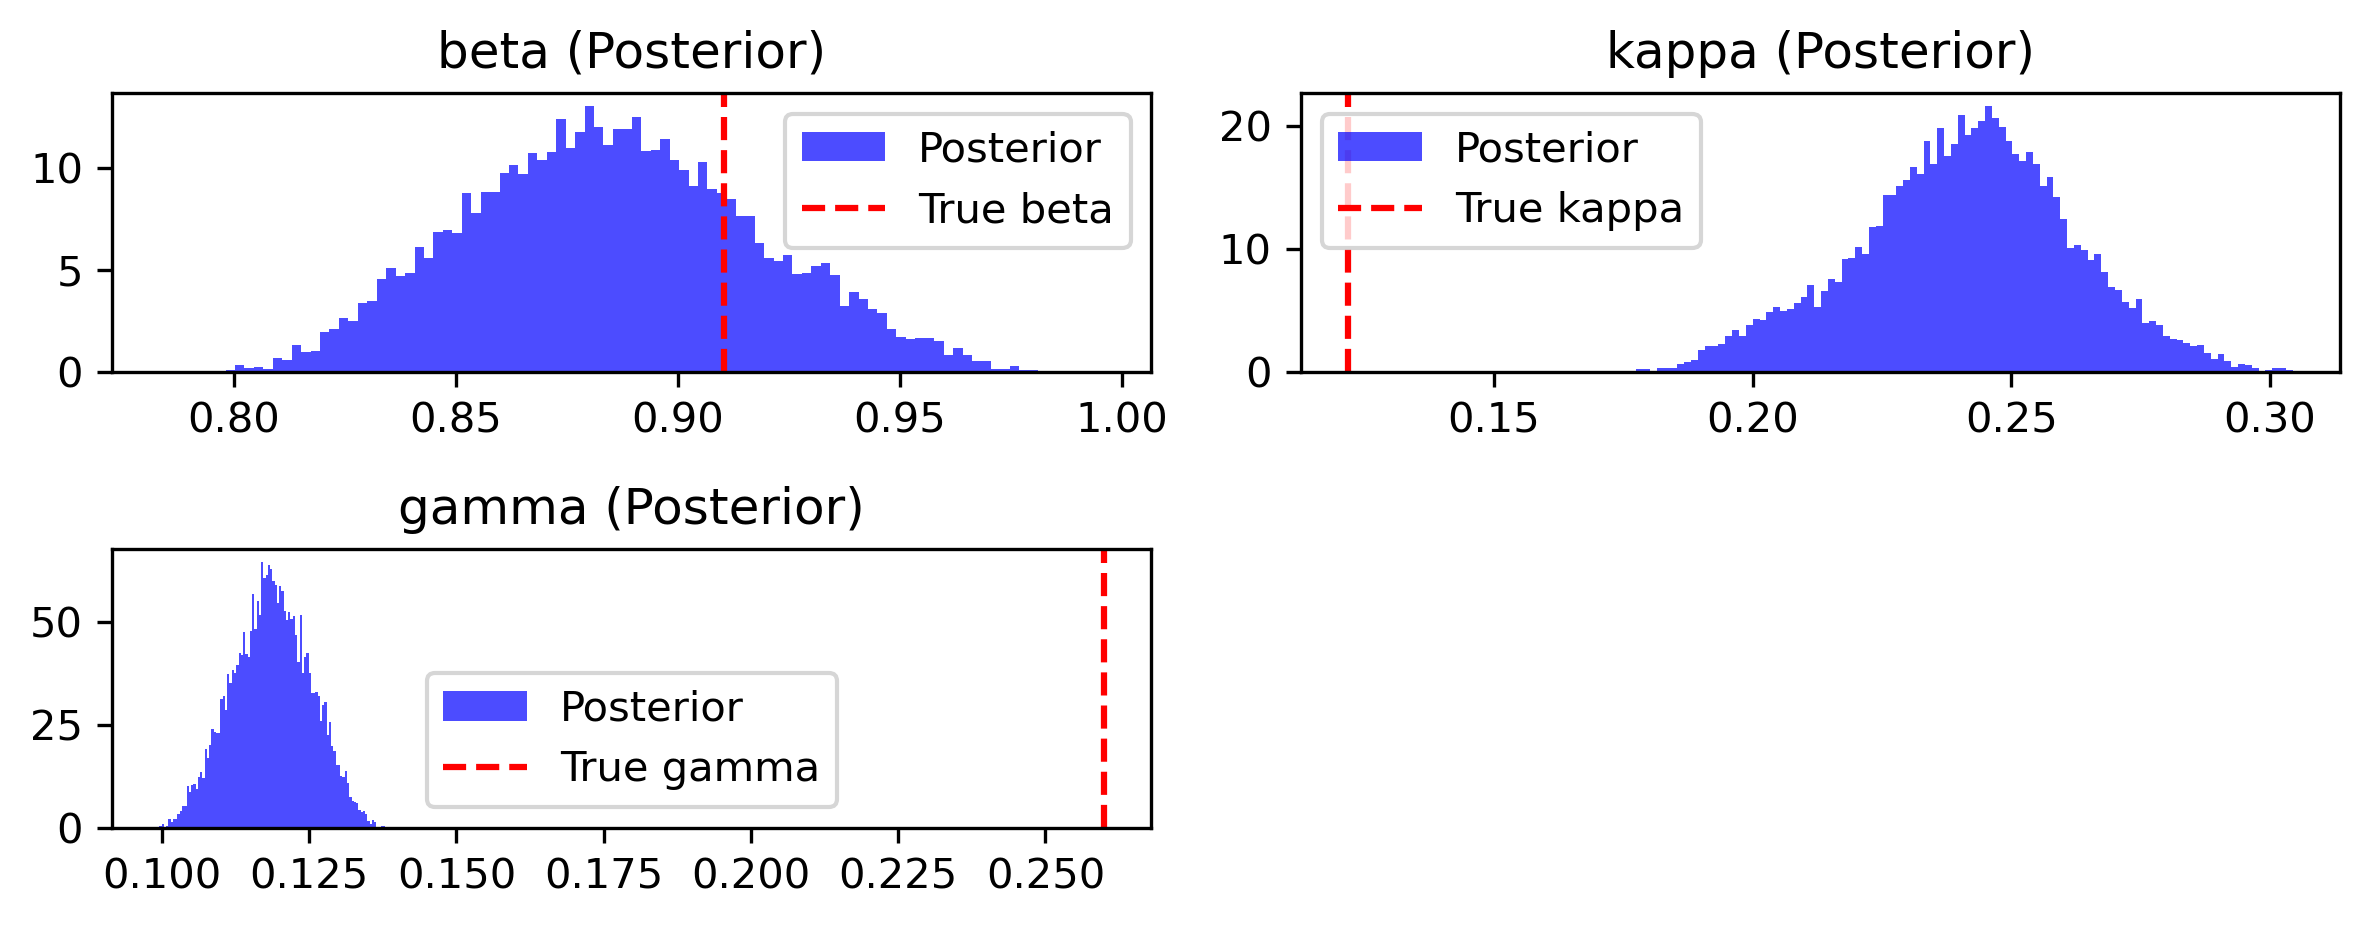

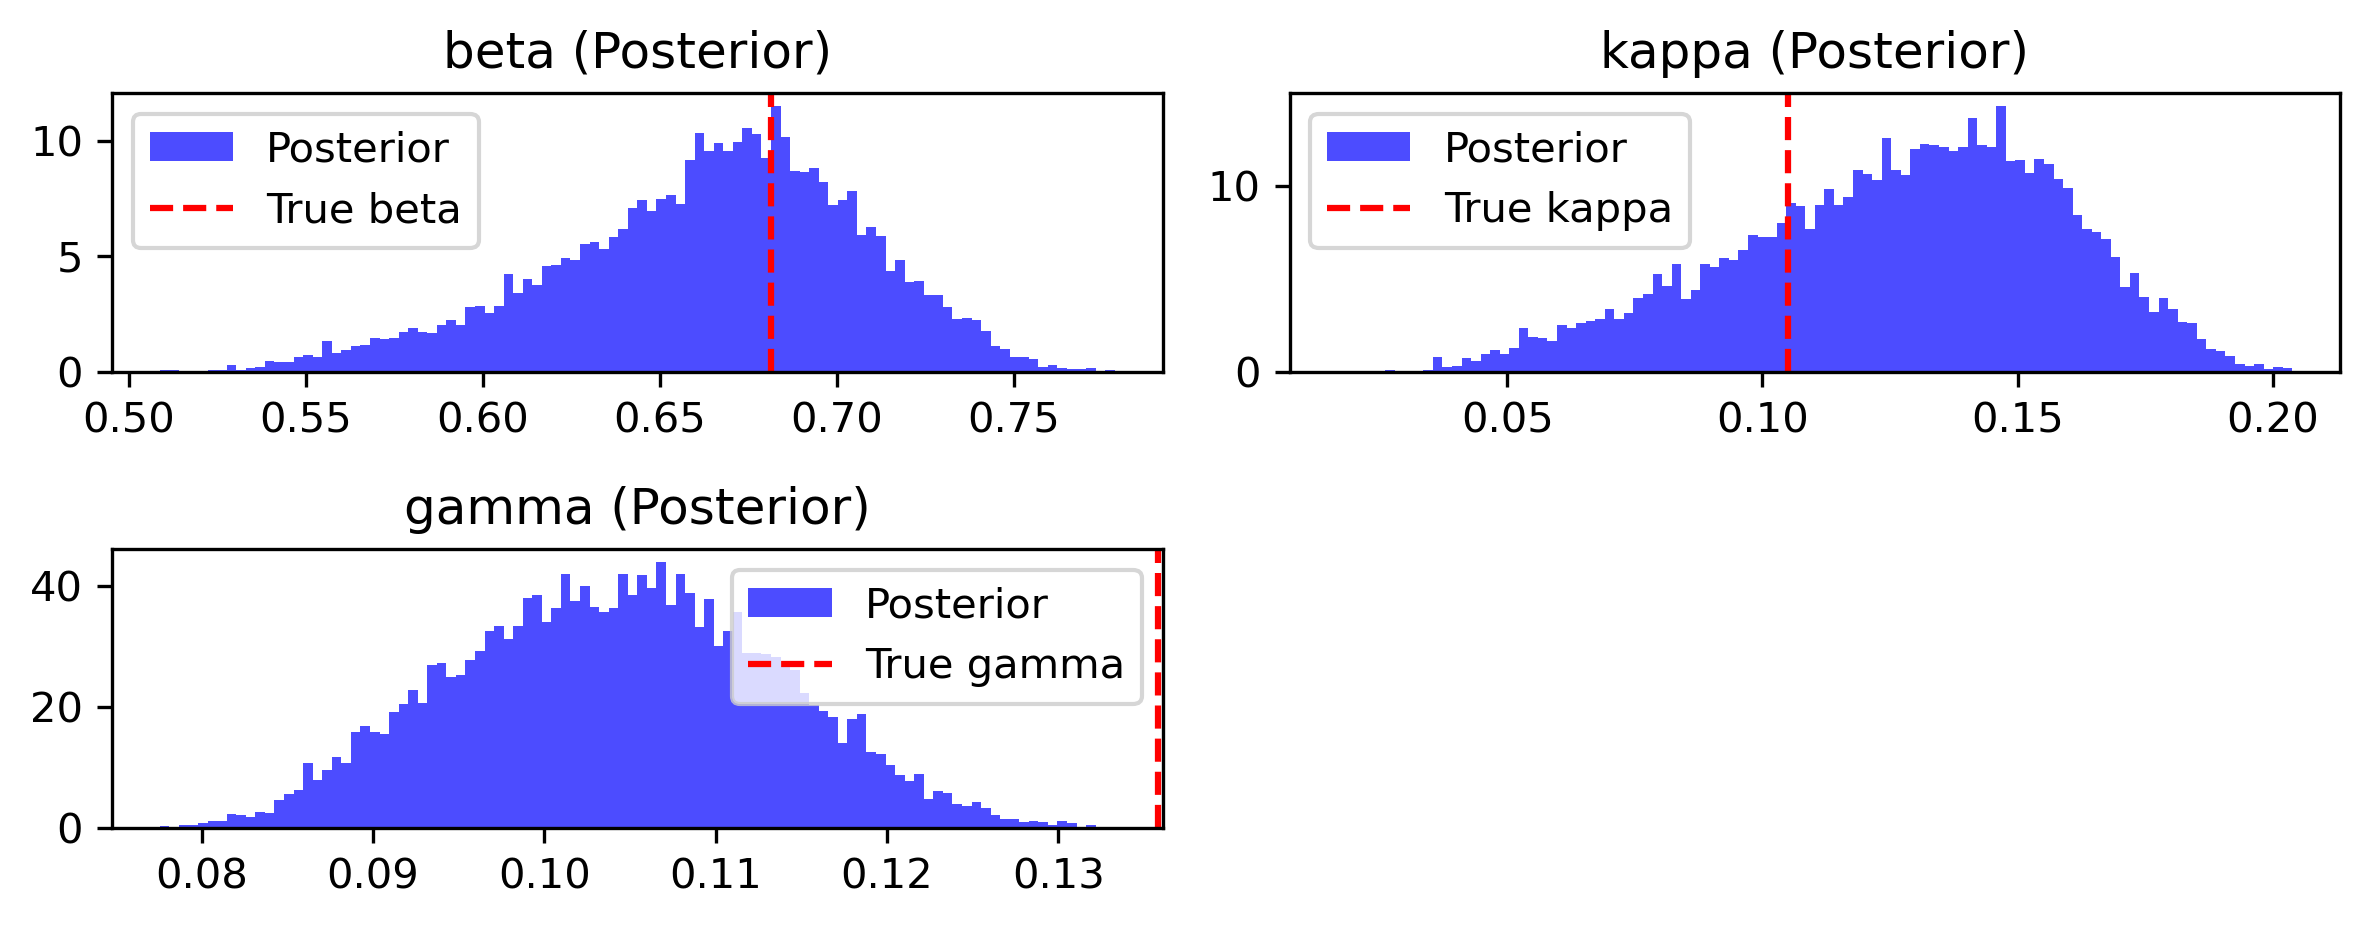

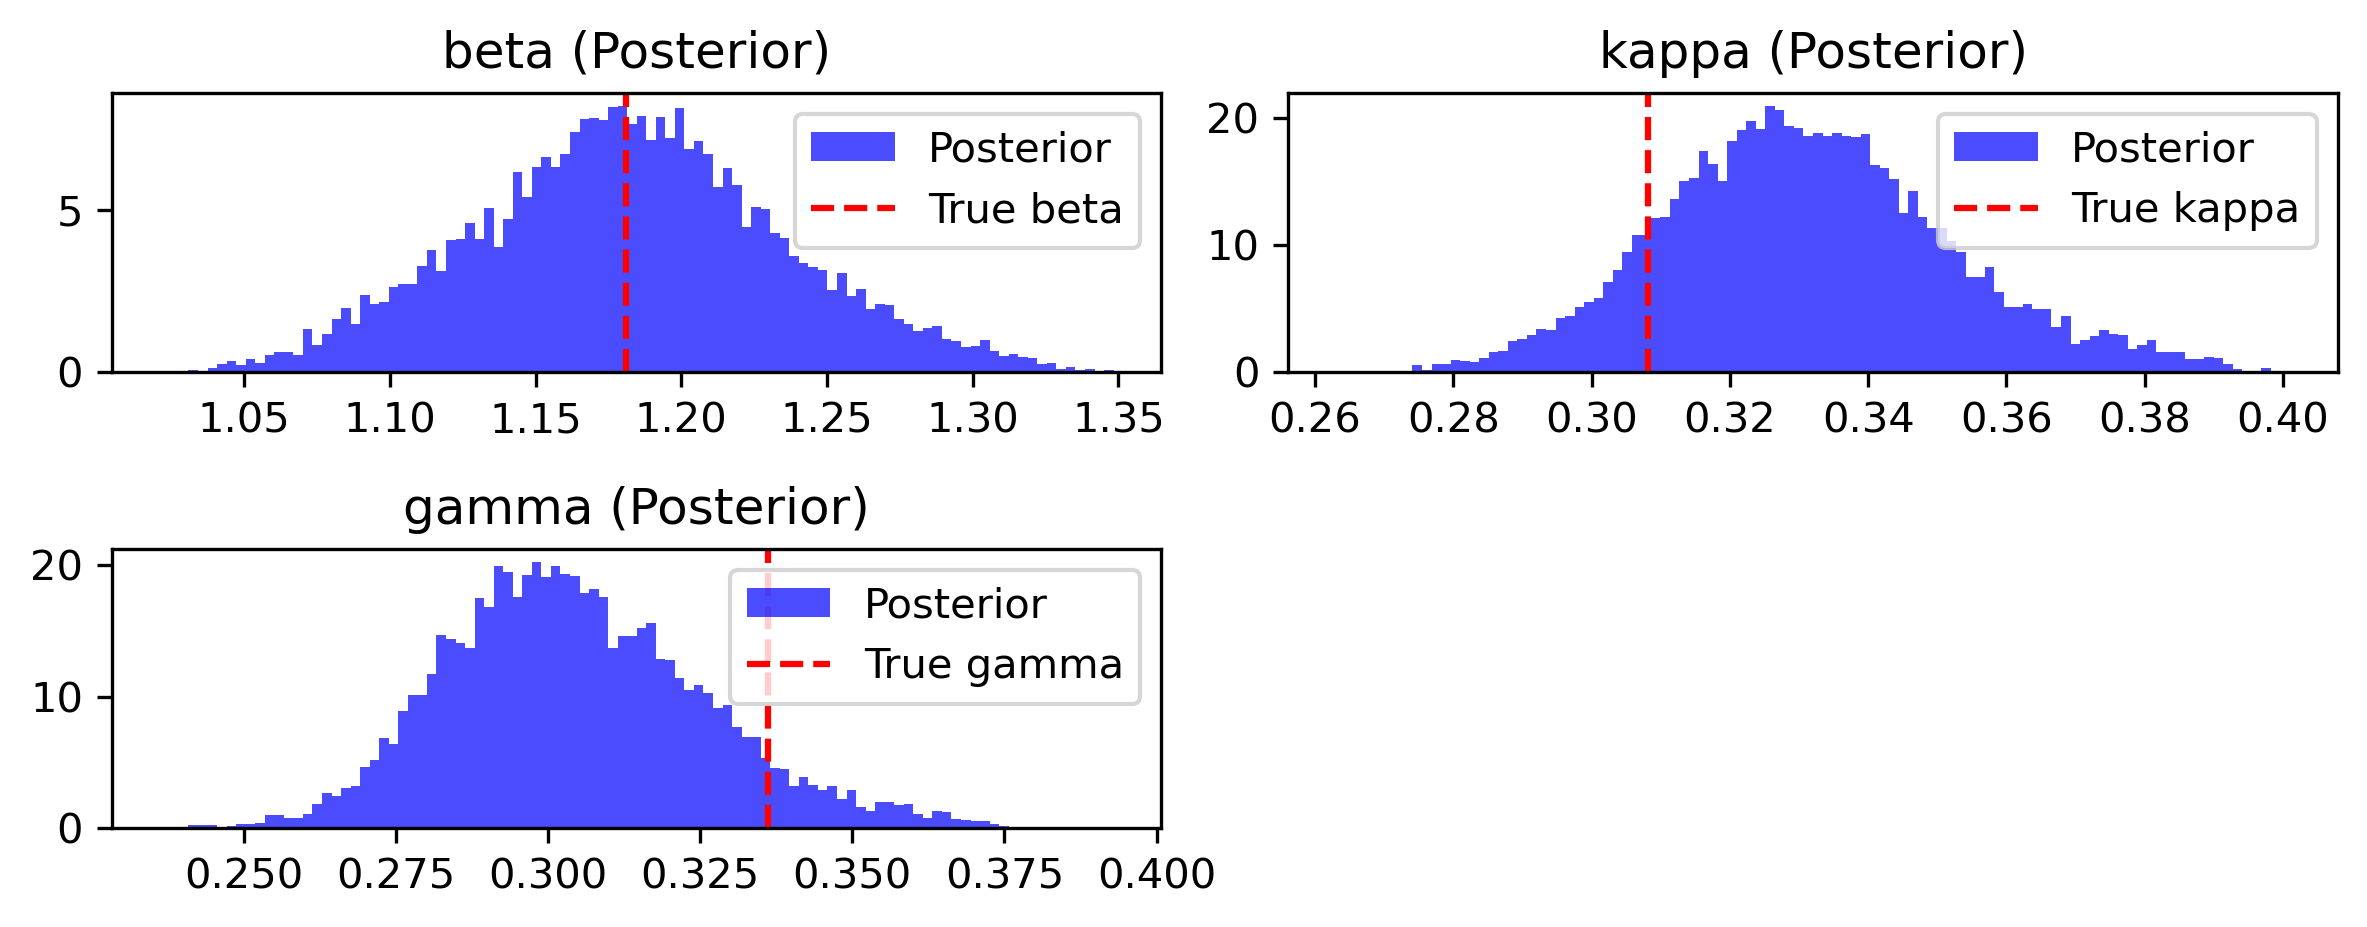

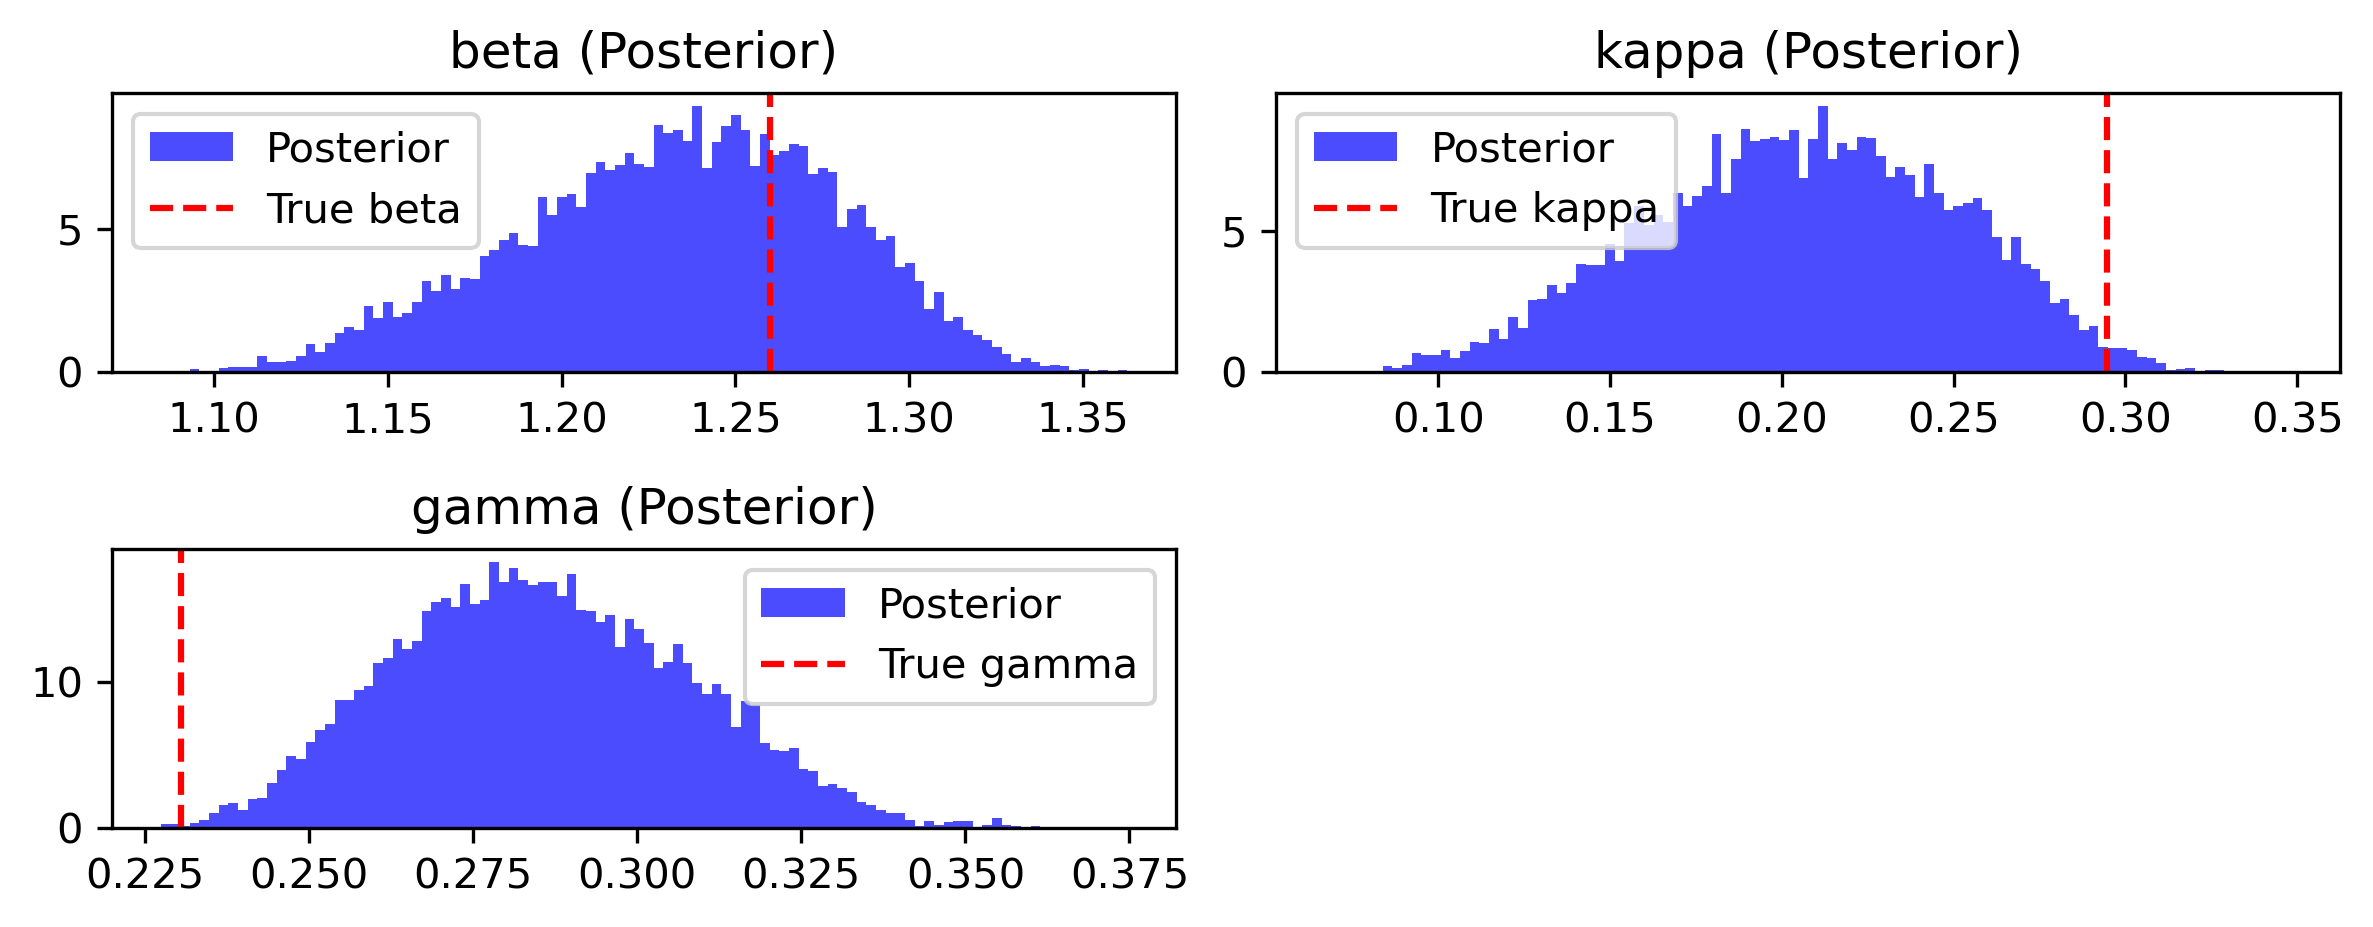

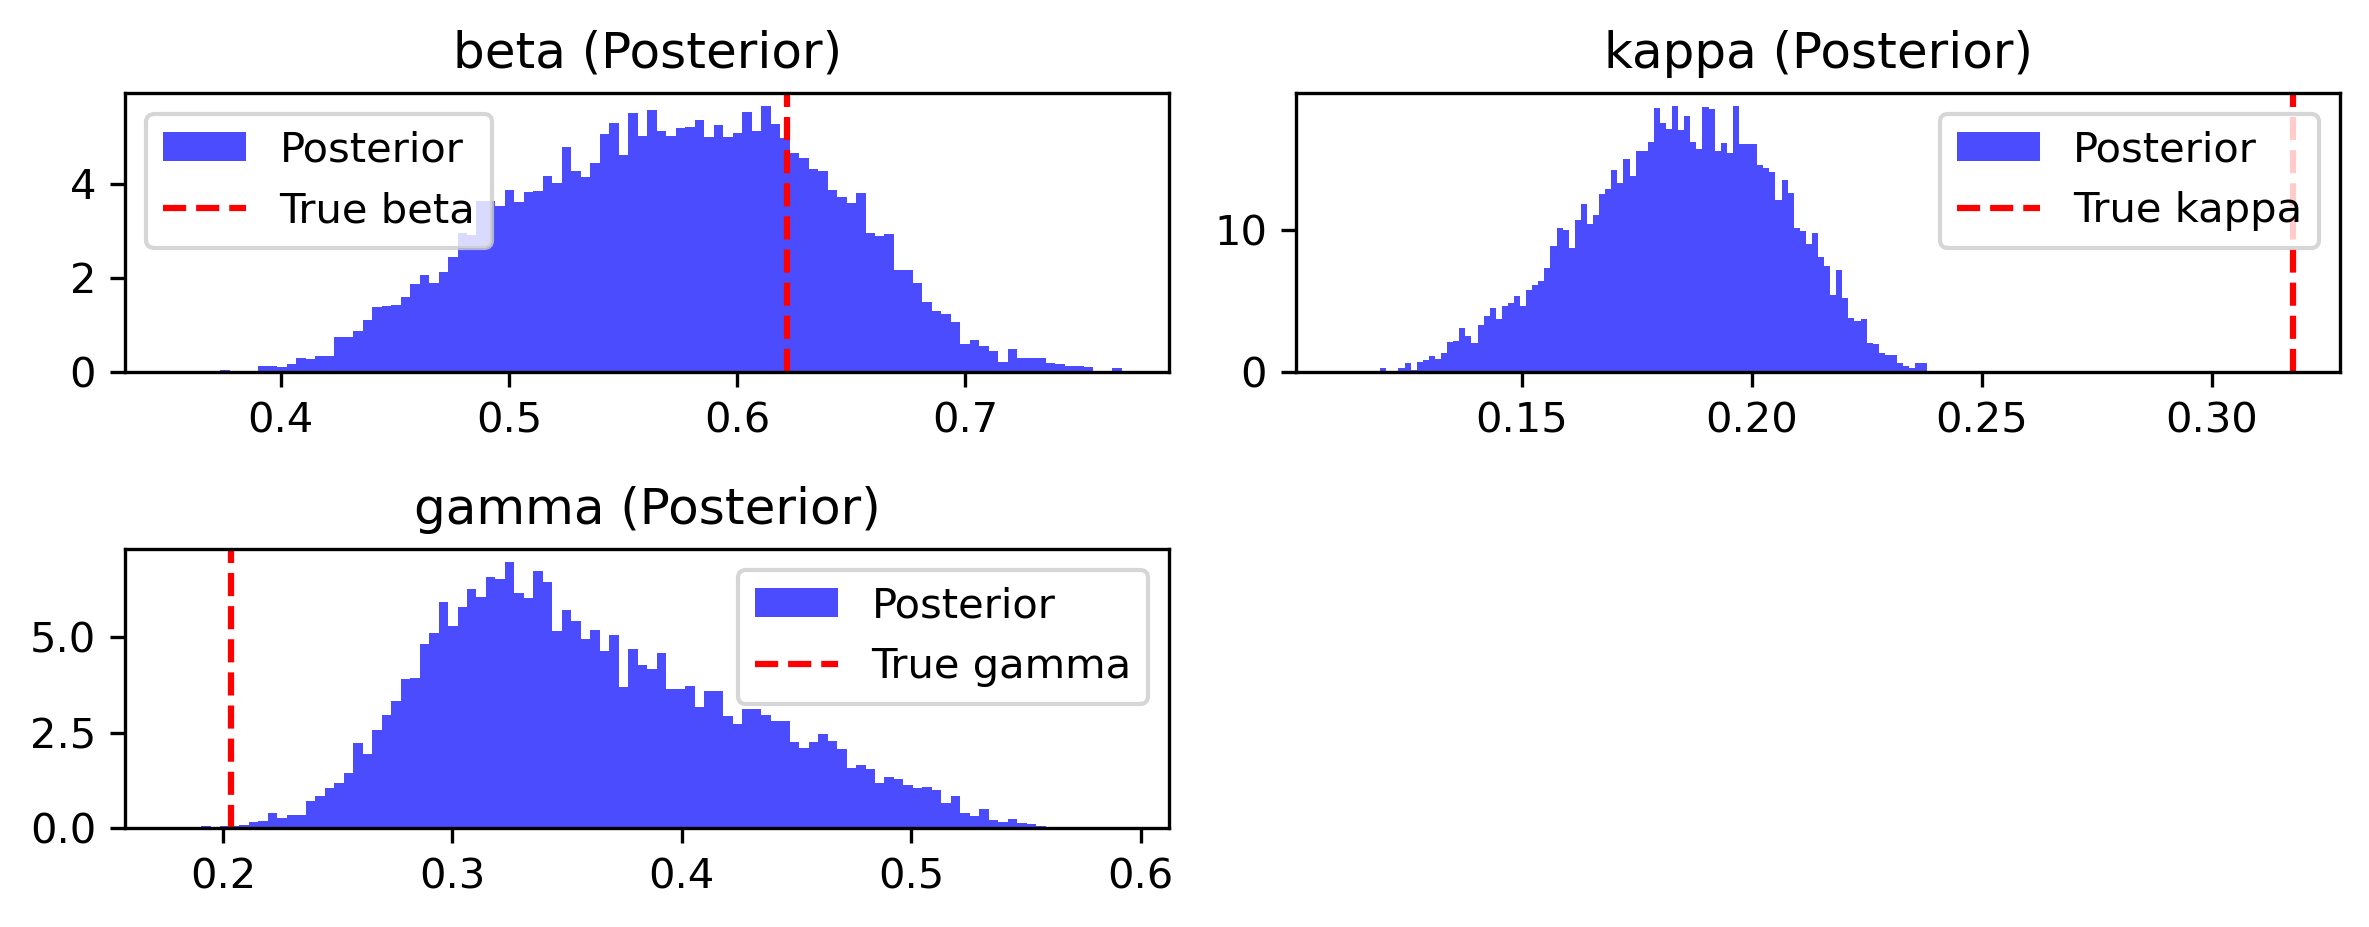

In [18]:
for k in range(10):
    samples = results_100k[k]
    true_values = true_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()